# Regression Popularity

## Goals

1. **Data Analysis**: Analyse variables (predictors + target) individually, and target in relation with predictors, and assert hypothesis about target prediction
2. **Data Preparation**: Prepare data for model by transforming quantitative and categorical data
3. **Models & Result Analysis**: Train and test the model, and interpret it

## Goals

This part summarize the work and conclusion drawn from each part.

### Data Analysis
* Lots of tracks are almost unknown (close to 0) but most of them have very low to low popularity, decreasing lineary starting from 40 and exponentially starting from 60
* Most influential variables seems to be :
    * `duration_ms`: Positive
    * `danceability`: Positive
    * `energy`: Positive
    * `loudness`: Positive
    * `speechiness`: Negative
    * `acousticness`: Negative
    * `instrumentalness`: Negative
    * `liveness`: Negative
    * `tempo`: Positive
    * `explicit`: Positive
    * `time_signature`: Positive

### Data Preparation
* Categorical variables including more than 2 possible values are one-hot encoded
* Quantitative variables are standardized in the train and test set independently

### Models & Result Analysis

### Setup

In [1]:
# Librairies
## Matrix & table processing
import numpy as np
import pandas as pd

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Models
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Neural network models
from keras.layers import Input, Dense, Embedding, Concatenate, Flatten, Lambda
from keras.models import Model

# Model interpratibility
from sklearn.tree import plot_tree
import shap

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Utils
import itertools
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import slice
import ast

### Data Analysis

#### Goals
   * Get the data and caracterize variables
   * Analyse each variables individualy and in relation with target
   * Make hypothesis about target prediction

#### Dictionary

| Name | Description | Unit | Type | Value range | Notes |
| --- | --- | --- | --- | --- | --- | 
| `id` | Identifier | | Id | |
| `name` | Track name |  | Text| | 
| `popularity` | Popularity indicator | | Q |\[0,100\] |
| `duration_ms` | Track duration | ms | Q | \[0,Inf\] |
| `explicit` | Explicit nature of track |  | C | {0,1} |
| `artists` | Artists list | | list(Text) | |
| `id_artists` | Artists' ids list | | list(Id) | |
| `release_date` | Track realease date | | Date | \[1921-2020\] |
| `danceability` | Danceability indicator | | Q | \[0,1\] |
| `energy` | Energy indicator | | Q | \[0,1\] |
| `key` | Main musical key in track |  | C | {0,1,...,11} | Dependant of `mode` |
| `loudness` | Loudness indicator | dB | Q | \[-60,0\] |
| `mode` | Track musical mode | minor/major | Q | {0,1} |
| `speechiness` | Speechiness indicator | | Q | \[0,1\] |
| `acousticness` | Acousticness indicator | | Q | \[0,1\] |
| `instrumentalness` | Instrumentalness indicator | | Q | \[0,1\] |
| `liveness` | Liveness indicator | | Q | \[0,1\] |
| `valence` | Valence indicator | | Q | \[0,1\] |
| `tempo` | Tempo indicator | BPM | Q | \[0,220\] |
| `time_signature` | Tracks' muscial time signature | pulses-per-bar (PPB) | Q | (C, \{0,...,5\} |

In [2]:
# Read & print Spotify tracks table
tracks = pd.read_csv("tracks.csv")
tracks

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['Uli']   
1                0        98200         0              ['Fernando Pessoa']   
2                0       181640         0              ['Ignacio Corsini']   
3                0       176907         0              ['Ignacio Corsini']   
4                0       163080         0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50       258267         0                      ['阿YueYue']   
586668          72       153293         0                   ['ROLE MODEL']   
586669          70       187601         0                      ['FINNEAS']   
586670          58       142003         0  ['Gentle Bones', 'Clara Benin']   
586671          38       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.645  0.4450    0   -13.338     1       0.4510         0.674   
1              0.695  0.2630    0   -22.136     1       0.9570         0.797   
2              0.434  0.1770    1   -21.180     1       0.0512         0.994   
3              0.321  0.0946    7   -27.961     1       0.0504         0.995   
4              0.402  0.1580    3   -16.900     0       0.0390         0.989   
...              ...     ...  ...       ...   ...          ...           ...   
586667         0.560  0.5180    0    -7.471     0       0.0292         0.785   
586668         0.765  0.6630    0    -5.223     1       0.0652         0.141   
586669         0.535  0.3140    7   -12.823     0       0.0408         0.895   
586670         0.696  0.6150   10    -6.212     1       0.0345         0.206   
586671         0.686  0.7230    6    -7.067     1       0.0363         0.105   

        instrumentalness  liveness  valence    tempo  time_signature  
0               0.744000    0.1510   0.1270  104.851               3  
1               0.000000    0.1480   0.6550  102.009               1  
2               0.021800    0.2120   0.4570  130.418               5  
3               0.918000    0.1040   0.3970  169.980               3  
4               0.130000    0.311

In [3]:
# Caracterize data
target = ["popularity"]                                            # Target variable
to_drop = ["id", "name", "artists", "id_artists"]                  # Variables to drop
to_bool = ["key", "time_signature"]                                # Variables to encode in one-hot format
categorical = ["explicit", "mode"] + to_bool                       # Categorical variables
quantitative = ["duration_ms", "danceability", "energy",           # Quantitative columns
                "loudness", "speechiness", "acousticness", 
                "instrumentalness", "liveness",
                "valence", "tempo", "year", "month", "day"]
date = ["release_date"]

In [4]:
# Get & print raw data
raw_data = tracks.drop(to_drop, axis=1)
raw_data["release_date"] = pd.to_datetime(raw_data["release_date"])
raw_data["year"] = raw_data["release_date"].dt.year.values
raw_data["month"] = raw_data["release_date"].dt.month.values
raw_data["day"] = raw_data["release_date"].dt.day.values
raw_data = raw_data.drop("release_date", axis=1)
ref_data = raw_data
raw_data

popularity  duration_ms  explicit  danceability  energy  key  \
0                6       126903         0         0.645  0.4450    0   
1                0        98200         0         0.695  0.2630    0   
2                0       181640         0         0.434  0.1770    1   
3                0       176907         0         0.321  0.0946    7   
4                0       163080         0         0.402  0.1580    3   
...            ...          ...       ...           ...     ...  ...   
586667          50       258267         0         0.560  0.5180    0   
586668          72       153293         0         0.765  0.6630    0   
586669          70       187601         0         0.535  0.3140    7   
586670          58       142003         0         0.696  0.6150   10   
586671          38       214360         0         0.686  0.7230    6   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0        -13.338     1       0.4510         0.674          0.744000    0.1510   
1        -22.136     1       0.9570         0.797          0.000000    0.1480   
2        -21.180     1       0.0512         0.994          0.021800    0.2120   
3        -27.961     1       0.0504         0.995          0.918000    0.1040   
4        -16.900     0       0.0390         0.989          0.130000    0.3110   
...          ...   ...          ...           ...               ...       ...   
586667    -7.471     0       0.0292         0.785          0.000000    0.0648   
586668    -5.223     1       0.0652         0.141          0.000297    0.0924   
586669   -12.823     0       0.0408         0.895          0.000150    0.0874   
586670    -6.212     1       0.0345         0.206          0.000003    0.3050   
586671    -7.067     1       0.0363         0.105          0.000000    0.2640   

        valence    tempo  time_signature  year  month  day  
0        0.1270  104.851               3  1922      2   22  
1        0.6550  102.009               1  1922      6    1  
2        0.4570  130.418               5  1922      3   21  
3        0.3970  169.980               3  1922      3   21  
4        0.1960  103.220               4  1922      1    1  
...         ...      ...             ...   ...    ...  ...  
586667   0.2110  131.896               4  2020      9   26  
586668   0.6860  150.091               4  2020     10   21  
586669   0.0663  145.095               4  2020      9    2  
586670   0.4380   90.029               4  2021      3    5  
586671   0.9750  112.204               4  2015      7    1  

[586672 rows x 18 columns]

#### Target Analysis (`popularity`)

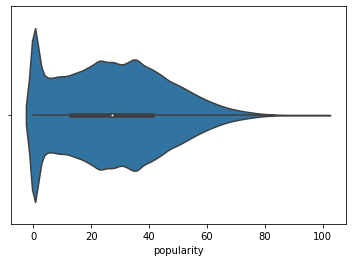

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

In [5]:
# Distribution analysis
sns.violinplot(data=raw_data, x="popularity")
plt.show()
raw_data["popularity"].describe()

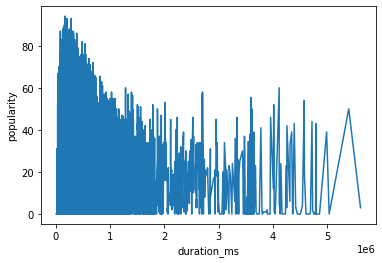

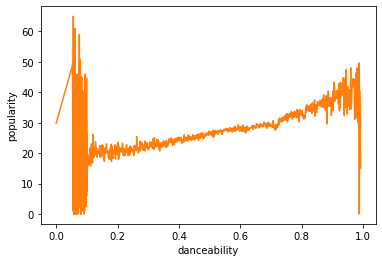

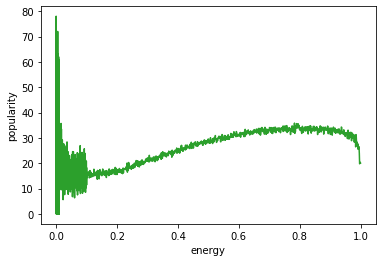

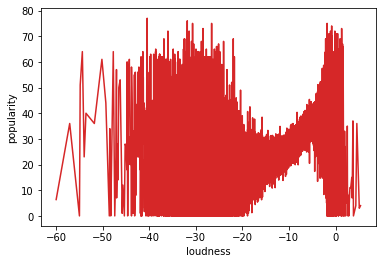

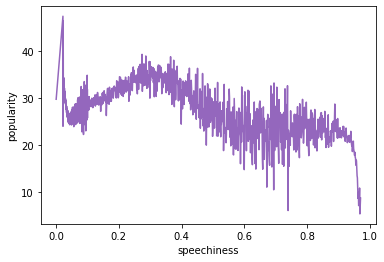

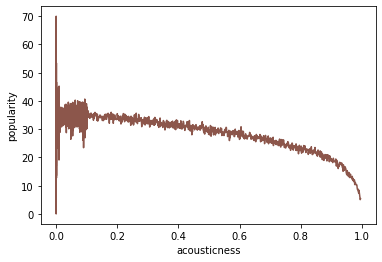

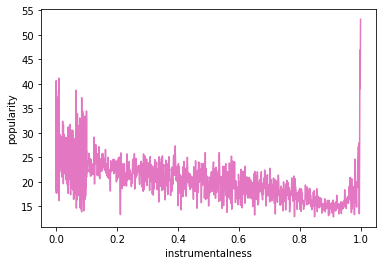

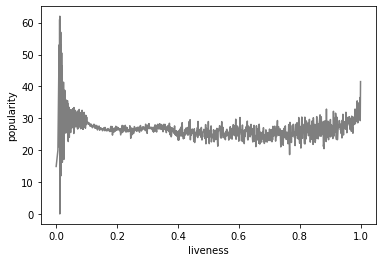

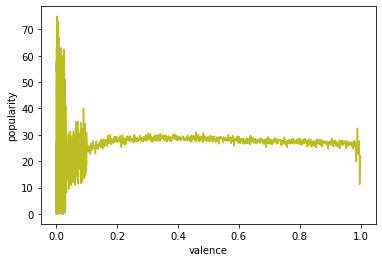

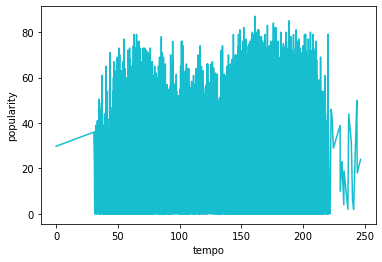

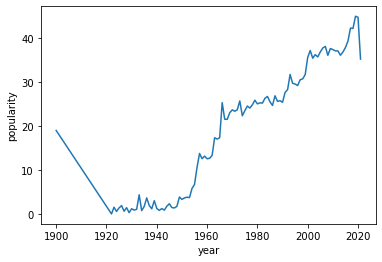

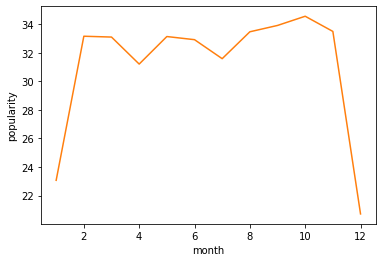

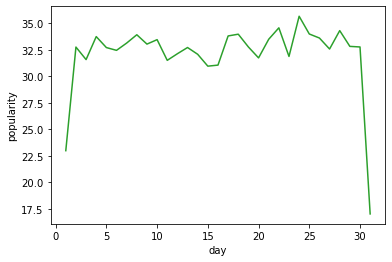

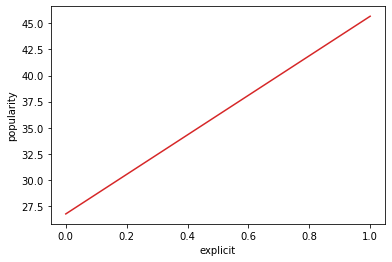

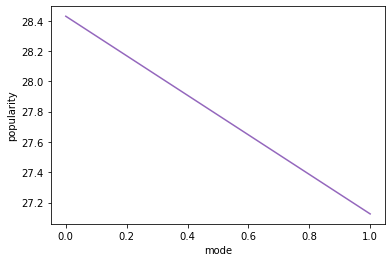

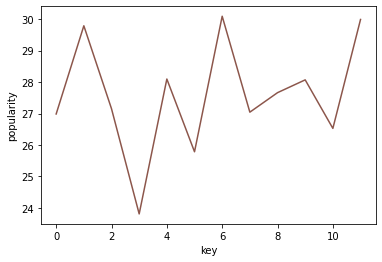

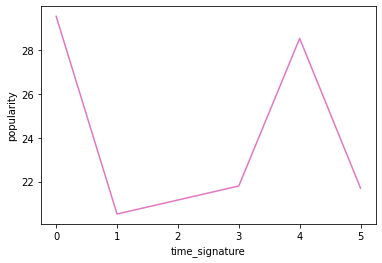

In [6]:
# Quantitative relation analysis
palette = itertools.cycle(sns.color_palette())
lineplot_df = raw_data#.round(decimals=2)
acc_df = pd.DataFrame()
for q in quantitative + categorical:
    acc = lineplot_df.groupby(q)["popularity"].mean()
    acc_df= pd.concat([acc_df, acc.describe().rename("popularity|" + str(q))], axis=1)
    sns.lineplot(x=acc.index, y=acc, ci=None, color=next(palette))
    plt.show()

In [7]:
acc_df.transpose().sort_values(["std", "mean"], ascending=False)

count       mean        std        min  \
popularity|duration_ms       123122.0  27.187143  17.400311   0.000000   
popularity|year                 101.0  19.335462  14.179274   0.054422   
popularity|explicit               2.0  36.209530  13.399527  26.734633   
popularity|tempo             122706.0  25.868030  11.995829   0.000000   
popularity|loudness           29196.0  23.687828  11.958680   0.000000   
popularity|energy              2571.0  23.255737  11.944982   0.000000   
popularity|danceability        1285.0  25.621642   9.124893   0.000000   
popularity|acousticness        5217.0  29.735032   8.264768   0.000000   
popularity|valence             1805.0  26.242138   8.053890   0.000000   
popularity|instrumentalness    5402.0  26.287654   4.631389  12.809756   
popularity|speechiness         1655.0  27.285276   4.529831   5.280000   
popularity|month                 12.0  31.187745   4.462845  20.716570   
popularity|time_signature         5.0  24.419469   4.259562  20.521956   
popularity|liveness            1782.0  28.039310   3.796392   0.000000   
popularity|day                   31.0  32.097941   3.486853  17.007202   
popularity|key                   12.0  27.584131   1.832186  23.807569   
popularity|mode                   2.0  27.777129   0.922086  27.125116   

                                   25%        50%        75%        max  
popularity|duration_ms       15.000000  27.000000  38.000000  94.000000  
popularity|year               3.349072  23.471014  30.502551  44.920551  
popularity|explicit          31.472081  36.209530  40.946978  45.684426  
popularity|tempo             18.333333  25.833333  33.333333  87.000000  
popularity|loudness          16.210526  23.250000  31.396875  77.000000  
popularity|energy            15.460925  20.306859  31.580962  78.000000  
popularity|danceability      21.084444  25.887127  30.994612  65.000000  
popularity|acousticness      26.071429  31.422680  34.693548  70.000000  
popularity|valence           22.347826  26.903090  28.356725  75.000000  
popularity|instrumentalness  23.579665  27.037857  29.498377  53.181818  
popularity|speechiness       25.280438  27.178794  30.052025  47.500000  
popularity|month             31.485644  33.110882  33.467906  34.549479  
popularity|time_signature    21.702895  21.799513  28.532919  29.540059  
popularity|liveness          26.039605  27.764998  29.750810  62.000000  
popularity|day               31.969623  32.760114  33.673296  35.661915  
popularity|key               26.871244  27.407965  28.520692  30.094244  
popularity|mode              27.451122  27.777129  28.103135  28.429142

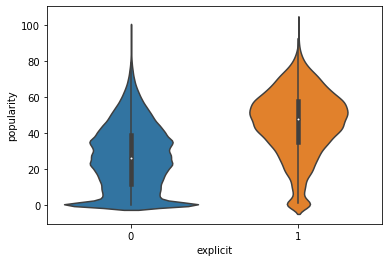

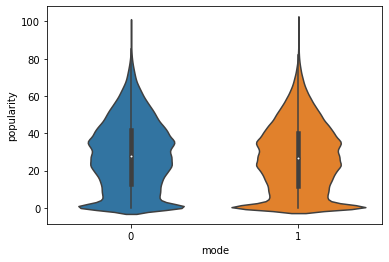

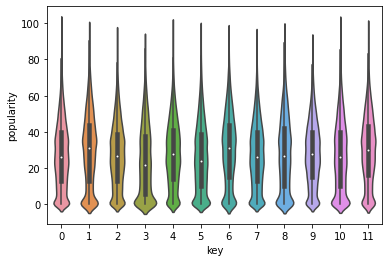

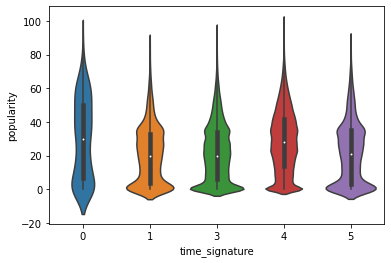

In [8]:
# Categorical relation analysis
for c in categorical:
    sns.violinplot(x=c, y="popularity", data=tracks)
    plt.show()

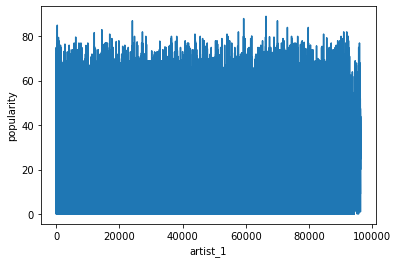

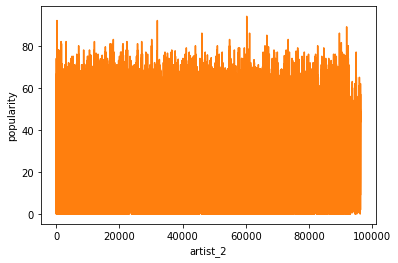

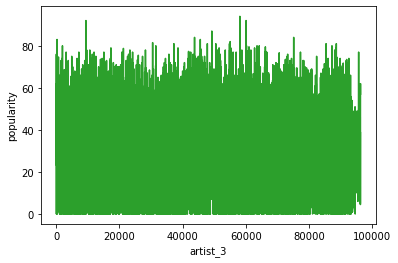

In [11]:
artist_df = tracks.copy()
artist_df["artists"] = artist_df["artists"].apply(lambda x: ast.literal_eval(x))
artists_encoder = LabelEncoder()
artists_bin = artists_encoder.fit_transform(artist_df["artists"].explode())
artists_map = dict(zip(artists_encoder.classes_.tolist(), range(1, len(artists_encoder.classes_) + 1)))
artists_map[None] = 0
max_artist_cols = int(artist_df["artists"].apply(lambda x: len(x)).describe(percentiles=[.25, .50, .75, .95])["95%"])
artist_df = (pd.DataFrame(artist_df["artists"].values.tolist())
                  .iloc[:, 0:max_artist_cols]
                  .rename(columns=lambda x: "artist_{}".format(x+1))
                 )
artist_df = pd.DataFrame([artist_df[am_col].map(artists_map) for am_col in artist_df.columns]).transpose().fillna(0)
palette = itertools.cycle(sns.color_palette())
for col in artist_df.columns:
    sns.lineplot(x=artist_df[col], y=raw_data["popularity"], ci=None, color=next(palette))
    plt.show()

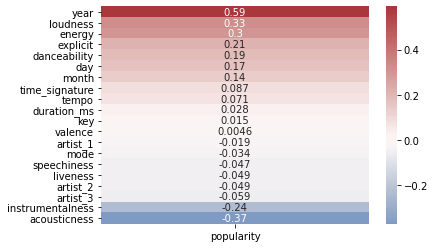

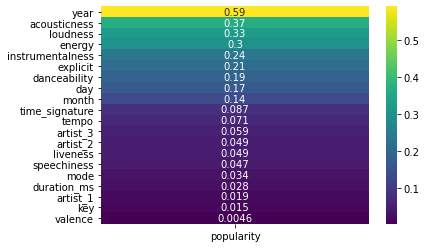

In [12]:
corr = pd.concat([raw_data, artist_df], axis=1).corr()["popularity"]
corr = corr.loc[corr.index != "popularity"]
sns.heatmap(corr.sort_values(ascending=False).to_frame(), annot=True, cmap="vlag", center=0)
plt.show()
sns.heatmap(np.abs(corr).sort_values(ascending=False).to_frame(), annot=True, cmap="viridis")
plt.show()

##### Conclusion

* `popularity` seems to be a non-linear phenomenon 
* Lots of quantitatives features seems to follow some trends fully or at some extentt (`danceability`, `energy`, `loudness`, `speechines`, `acousticness`, `instrumentalness`, `year`, `tempo`), which means that thoses variables could be learn quite easily by the model
* Some are very noisy at some extant(`duration_ms`, `loudness`, `tempo`), which are going to be difficut to interpret for the model
* Categorical value like `explicit` and `time_signature` also have an interesting relation with the target
* As `artists` should be considered like a categorical value, we can understand the linear plot as an histogram, which means that artits will play a great role in the prediction
* The 10 most importantc variables seems to be, in to : `artists`, `year`, `duration_ms`, `explicit`, `loudness`, `tempo`, `energy`, `acousticness`, `danceability`, `speechiness`

### Data preparation (General)

The data preparation include :
* One-hot encoding multinomial features
* Normalize quantitave features (except the target)
* Train, test, X and Y split

`artists` aren't used in this first part, as even though they hold a great importance in the prediction, the feature is a non-ordinal categorical feature with close to 30000 unique values, which would be computationally impossible to store in a dense matrix (600,000*100,000 = 600,000,000,000 number of elements)

In [13]:
# Categorical variables one-hot-encoding
names = [to_bool_col + str(value) for to_bool_col in to_bool                    
                                 for value in raw_data[to_bool_col].unique()]
raw_data[names] = OneHotEncoder(sparse=False).fit_transform(raw_data[to_bool]).astype("int32")
raw_data = raw_data.drop(to_bool, axis=1)

In [14]:
# Train & test splitting
train, test = train_test_split(raw_data, test_size=0.01, random_state=42)

In [15]:
# Qualitiative variables standardizing
scaled_train = train.copy()
train_scaler = MinMaxScaler()
scaled_train[quantitative] = train_scaler.fit_transform(train[quantitative])

scaled_test = test.copy()
test_scaler = MinMaxScaler()
scaled_test[quantitative] = test_scaler.fit_transform(test[quantitative])

In [16]:
# Target & predictors split
X_train = scaled_train.loc[:, set(scaled_train.columns) - set(target)]
X_test = scaled_test.loc[:, set(scaled_test.columns) - set(target)]
Y_train = scaled_train[target[0]]
Y_test = scaled_test[target[0]]

In [17]:
X_train

key2  duration_ms  valence  key7  key11  time_signature5  key0  \
455704     0     0.009311    0.315     0      0                0     0   
39471      0     0.025305    0.927     0      0                0     0   
77920      0     0.017075    0.274     0      0                0     0   
38135      1     0.024771    0.488     0      0                0     0   
414328     0     0.042493    0.451     0      0                0     0   
...      ...          ...      ...   ...    ...              ...   ...   
110268     0     0.043225    0.481     0      0                0     0   
259178     0     0.027354    0.627     0      1                0     0   
365838     0     0.032905    0.593     0      0                0     0   
131932     0     0.054052    0.211     0      0                0     0   
121958     0     0.034281    0.132     0      1                0     0   

        danceability  time_signature4       day  ...      year  \
455704      0.432896                1  0.566667  ...  0.950413   
39471       0.656912                1  0.000000  ...  0.537190   
77920       0.440969                1  0.000000  ...  0.859504   
38135       0.465187                1  0.000000  ...  0.528926   
414328      0.563068                1  0.300000  ...  0.900826   
...              ...              ...       ...  ...       ...   
110268      0.751766                1  0.333333  ...  0.834711   
259178      0.452069                1  0.000000  ...  0.677686   
365838      0.796165                1  0.866667  ...  0.768595   
131932      0.634712                1  0.100000  ...  0.950413   
121958      0.512614                1  0.000000  ...  0.330579   

        time_signature0  mode  key3  instrumentalness  key4  key1  key8  \
455704                0     1     0          0.734000     0     1     0   
39471                 0     1     0          0.000000     0     1     0   
77920                 0     1     0          0.818000     0     0     0   
38135                 0     1     0          0.895000     0     0     0   
414328                0     1     0          0.000000     0     0     1   
...                 ...   ...   ...               ...   ...   ...   ...   
110268                0     0     0          0.000000     0     0     0   
259178                0     1     0          0.000000     0     0     0   
365838                0     1     0          0.000005     0     0     1   
131932                0     1     0          0.000000     0     1     0   
121958                0     1     0          0.925000     0     0     0   

        liveness  time_signature3  
455704    0.4160                0  
39471     0.0971                0  
77920     0.0738                0  
38135     0.0837                0  
414328    0.2540                0  
...          ...              ...  
110268    0.0975                0  
259178    0.0506                0  
365838    0.1120                0  
131932    0.1510                0  
121958    0.1420                0  

[580805 rows x 32 columns]

In [18]:
Y_train

455704     1
39471     25
77920      5
38135     29
414328    32
          ..
110268    44
259178    10
365838    33
131932    64
121958     0
Name: popularity, Length: 580805, dtype: int64

### Models & Result Analysis

This part include:
* Model training
* Model evaluation
* Model interpretability

#### Linear regression with ridge regularization

Multivariate linear model with L2 regularization of parameters

In [19]:
# Train linear regression with ridge regularization
lm = RidgeCV().fit(X_train, Y_train)                         # Fit a model according to train set

In [20]:
lm_Y_pred = lm.predict(X_train)                                          # Generate predictions for train set
print("========|Train metrics|========")                                 # Calculate evaluation metrics
print("Variance explained:", explained_variance_score(Y_train, lm_Y_pred))
print("Mean squared error:", mean_squared_error(Y_train, lm_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_train, lm_Y_pred))

========|Train metrics|========
Variance explained: 0.3766238584292292
Mean squared error: 210.43289602596477
Mean absolute error: 11.18918157232409


In [21]:
# Evaluate model on test set
lm_Y_pred = lm.predict(X_test)                                           # Fit a model according to test set
print("========|Test metrics|========")                                  # Generate predictions for test set
print("Variance explained:", explained_variance_score(Y_test, lm_Y_pred))   # Calculate evaluation metrics
print("Mean squared error:", mean_squared_error(Y_test, lm_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, lm_Y_pred))

========|Test metrics|========
Variance explained: 0.36788996148049247
Mean squared error: 217.06054503871582
Mean absolute error: 11.241841634929541


In [22]:
# Print coefficients
coef = dict(zip(X_train.columns, lm.coef_))
coef = {k: v for k, v in sorted(coef.items(), reverse=True, key=lambda item: item[1])}
print("========|Regression coefficients|========") # Print regression coefficients
for c_name, c_val in coef.items():
    print(c_name + ":", c_val)                     # Print coefficients
print("=========|Regression intercept|========")    # Print regression intercept
print(target[0] + ":", lm.intercept_)              # Print intercept

========|Regression coefficients|========
year: 48.525749089749155
loudness: 13.69292973280244
explicit: 7.427895371191406
time_signature3: 4.399857239293642
danceability: 3.102056491143813
duration_ms: 2.5802939564470986
day: 1.226203020775074
mode: 0.6791371961466091
key1: 0.5712347354391483
key2: 0.5364791031530203
key6: 0.4207218312168628
key4: 0.06289136285275276
key9: 0.011428240207266072
key10: 0.004645700061075786
key5: -0.07947928360090373
key3: -0.0941253029050122
key8: -0.18810624352830985
key0: -0.338067233620194
key7: -0.39821928758564695
key11: -0.5094036216595157
tempo: -0.791477416352734
month: -0.8013538730487539
time_signature4: -0.8360379346630111
speechiness: -1.0089396151825483
time_signature1: -1.0988065974146224
time_signature0: -1.1333012898464503
time_signature5: -1.3317114173647155
valence: -1.6543224471166411
liveness: -3.017562616287492
energy: -3.886045546955984
acousticness: -4.1694667429797505
instrumentalness: -6.555308449759757
=========|Regression inte

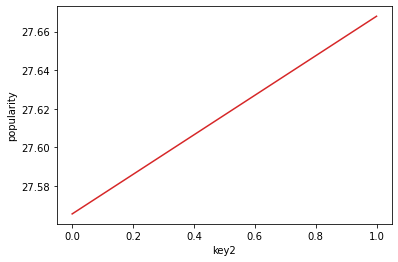

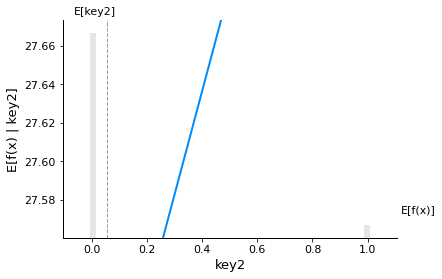

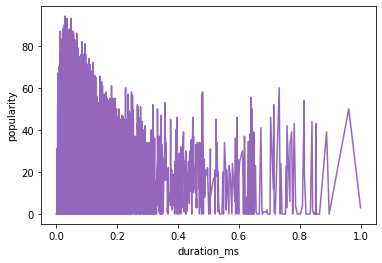

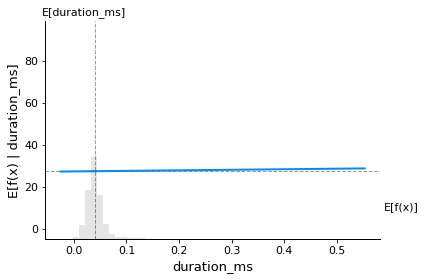

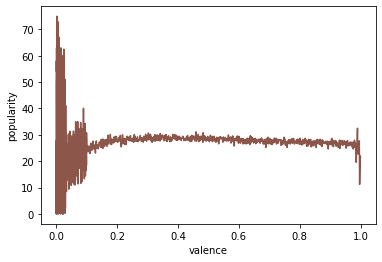

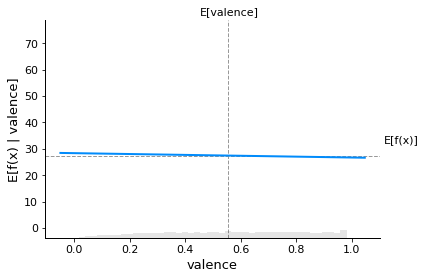

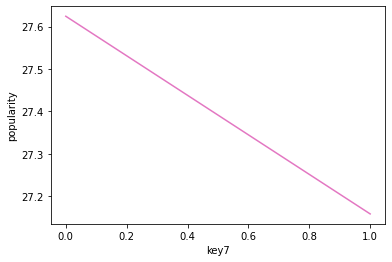

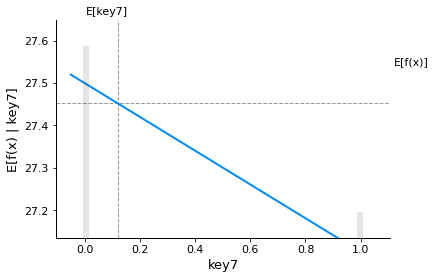

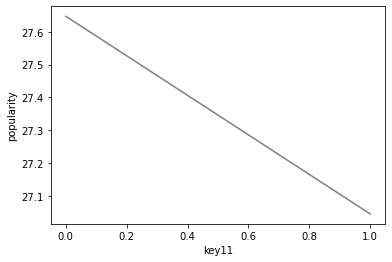

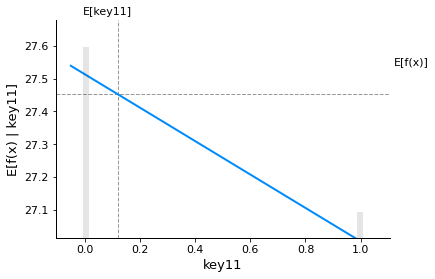

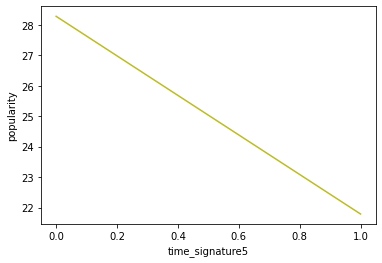

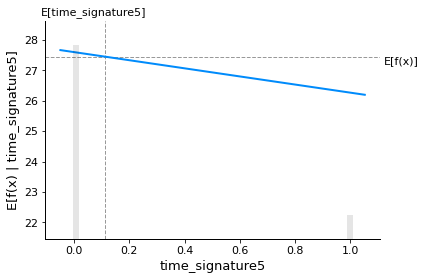

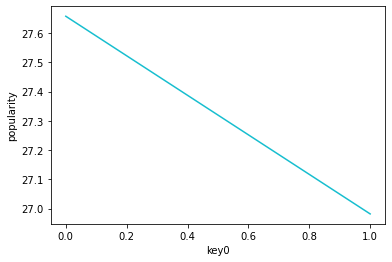

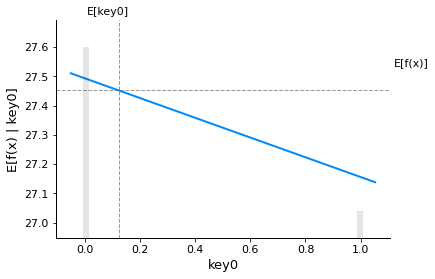

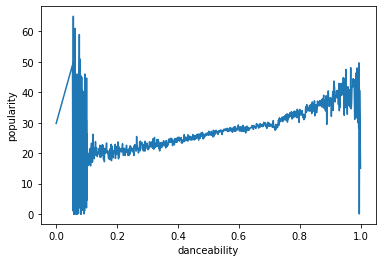

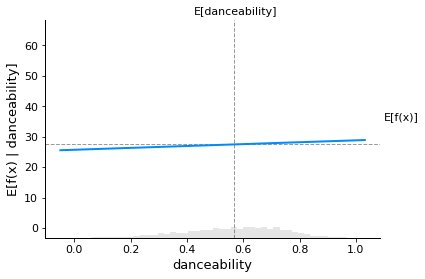

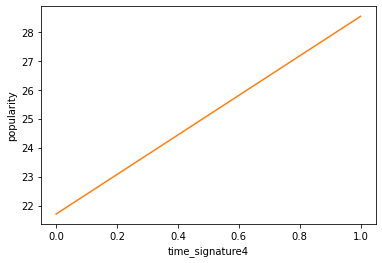

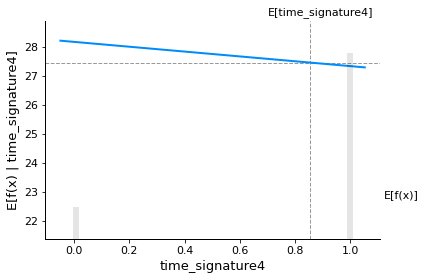

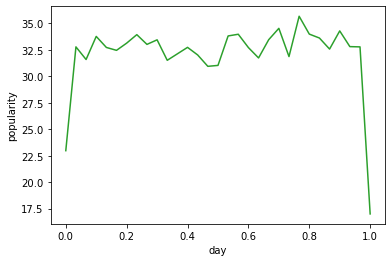

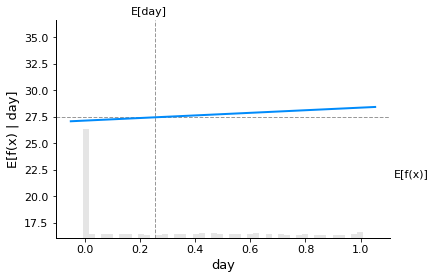

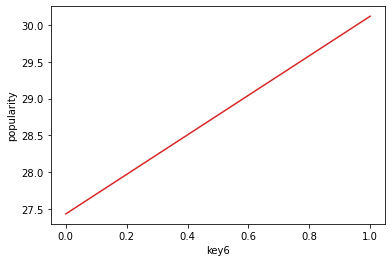

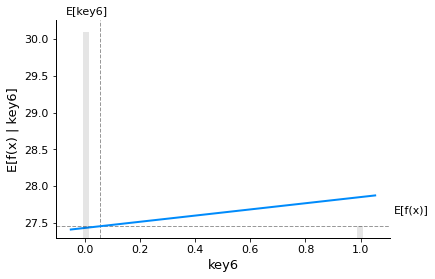

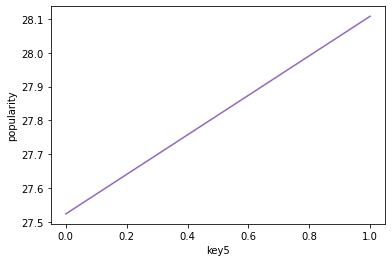

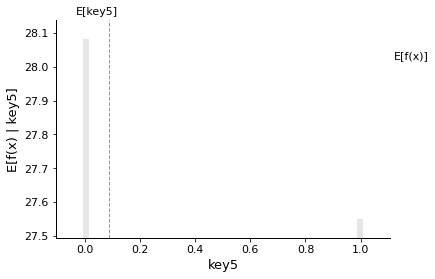

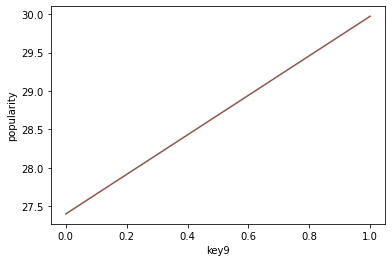

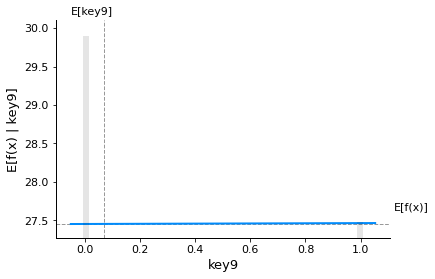

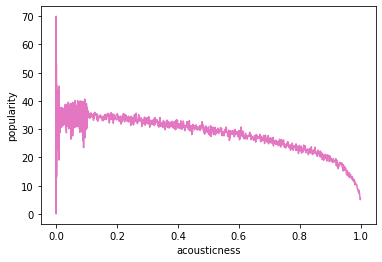

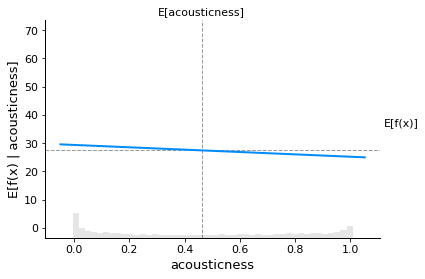

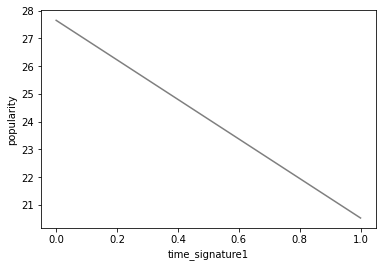

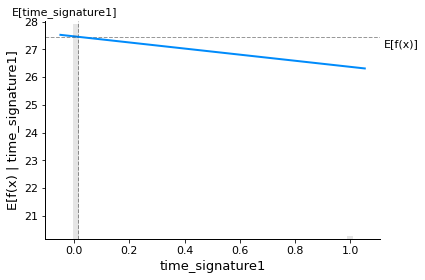

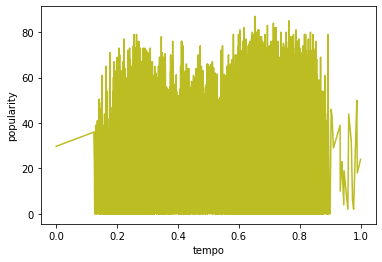

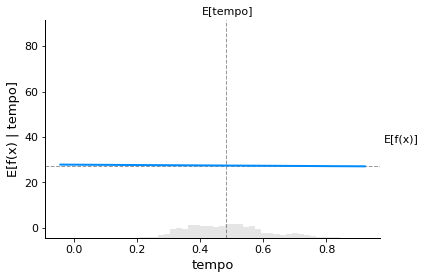

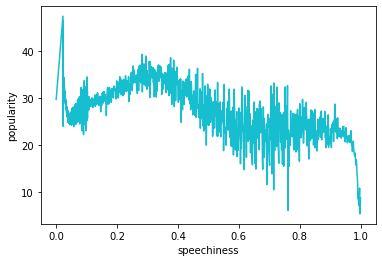

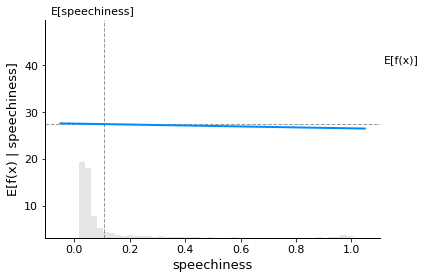

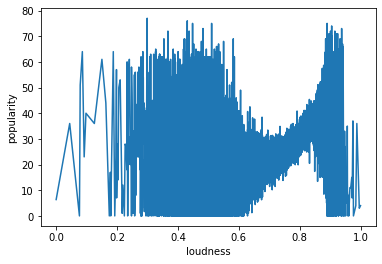

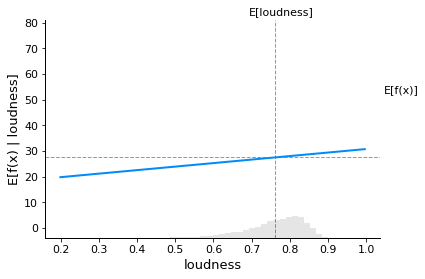

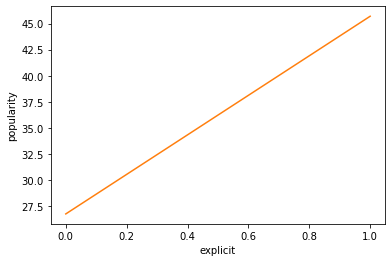

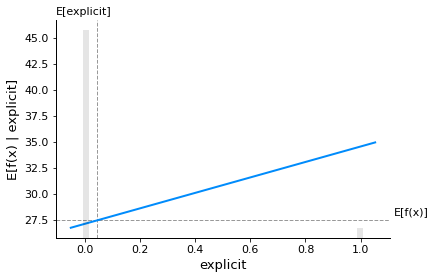

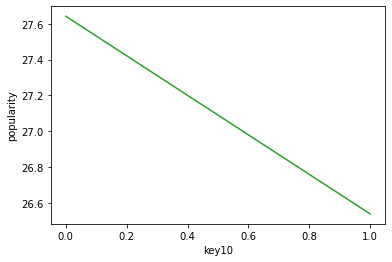

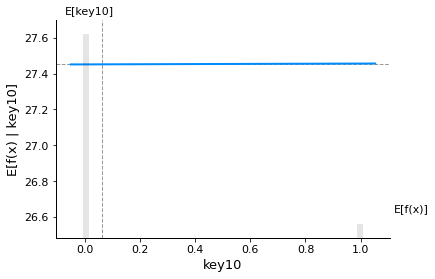

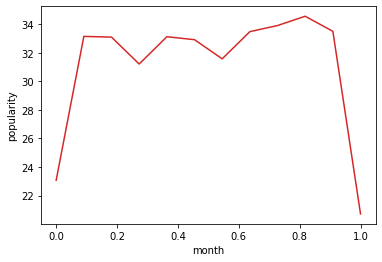

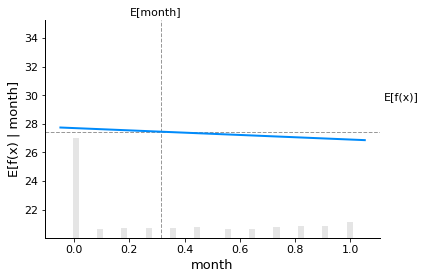

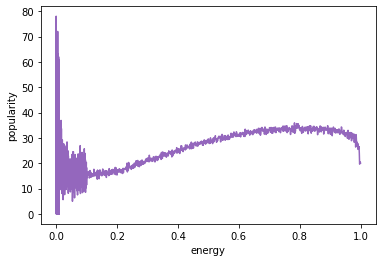

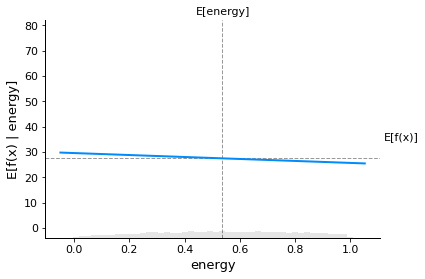

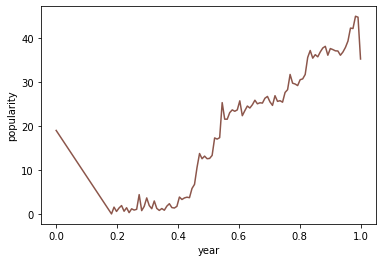

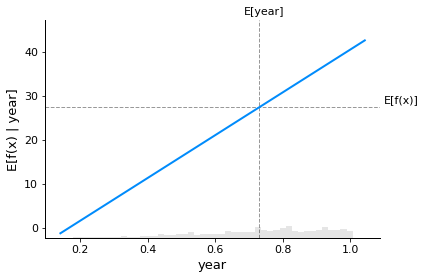

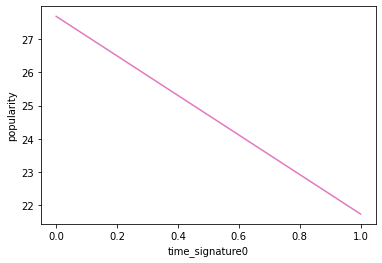

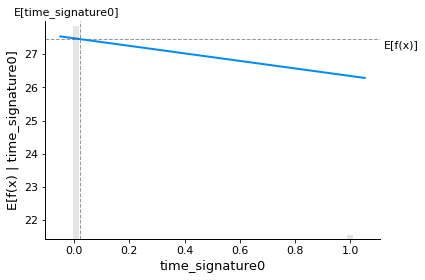

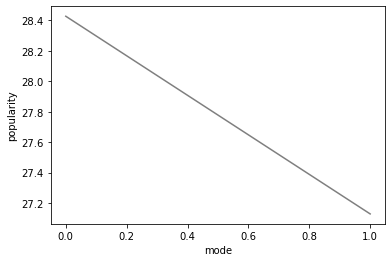

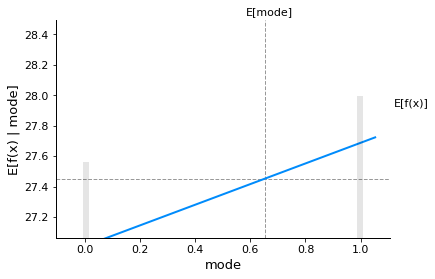

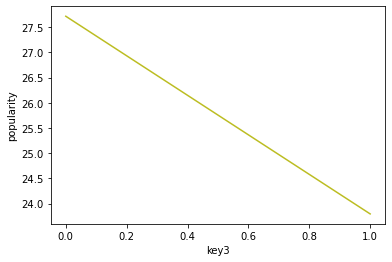

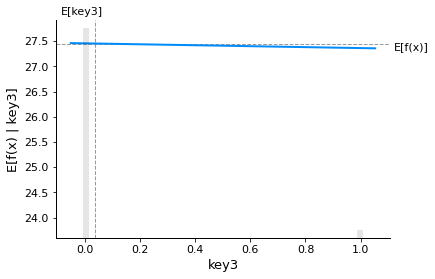

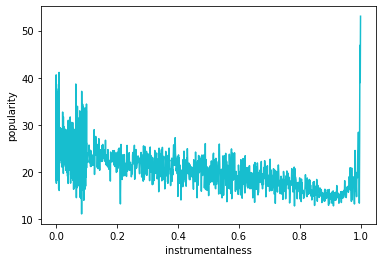

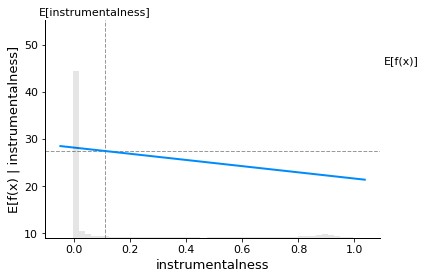

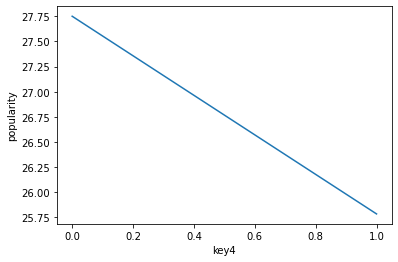

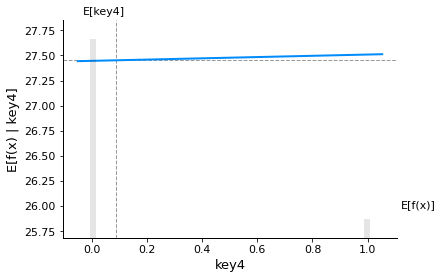

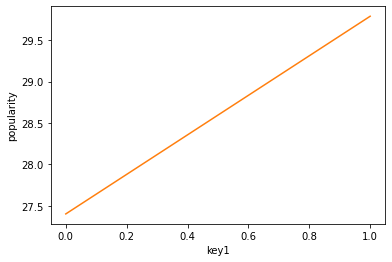

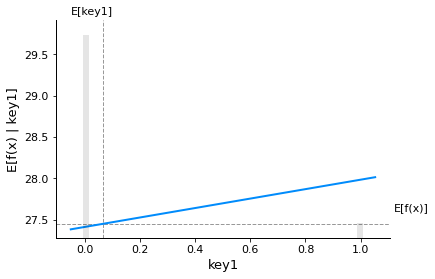

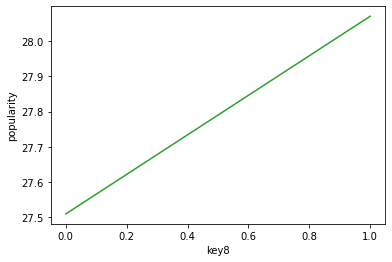

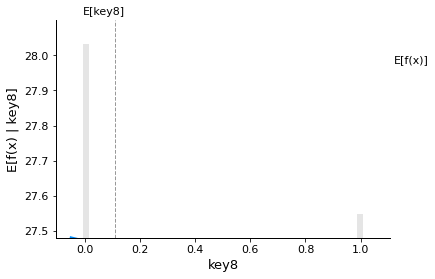

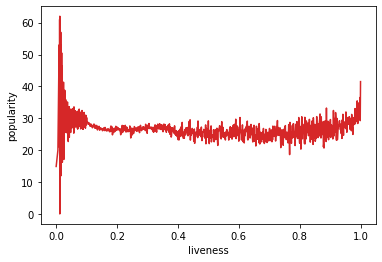

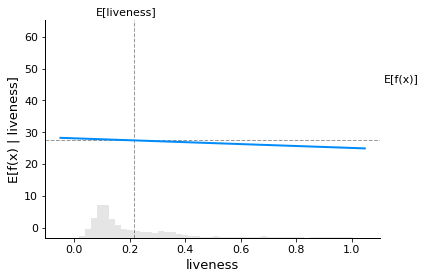

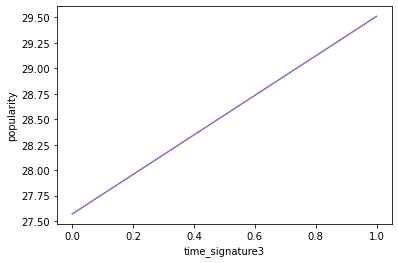

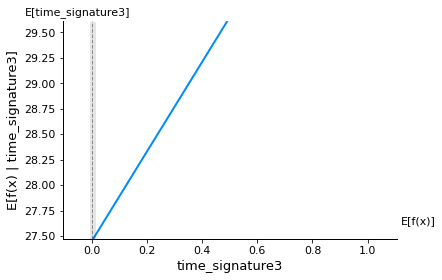

In [24]:
lm_explainer = shap.LinearExplainer(lm, X_train)
lm_shap_values = lm_explainer(X_sample)

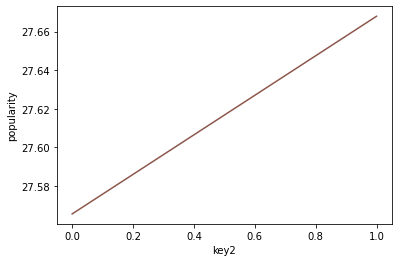

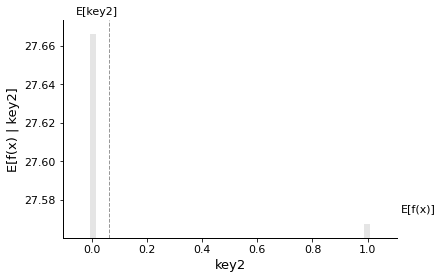

Permutation explainer:  44%|████▍     | 257/581 [09:37<12:22,  2.29s/it]


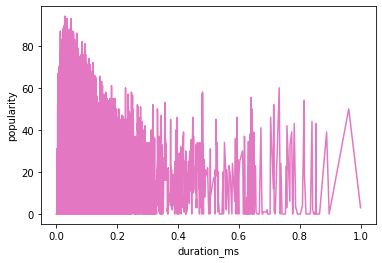

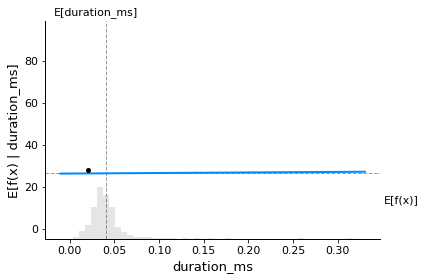

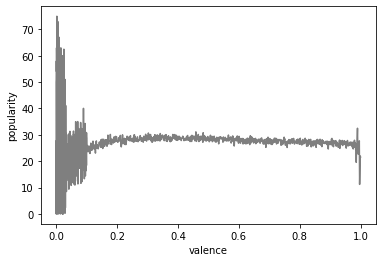

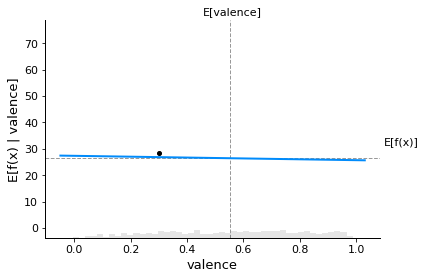

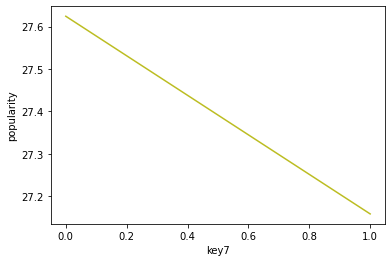

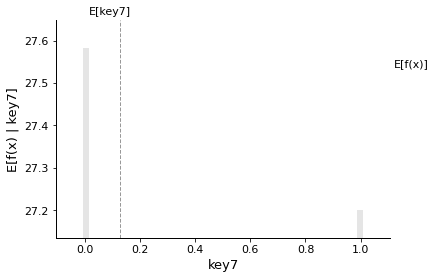

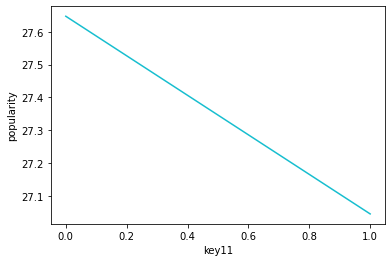

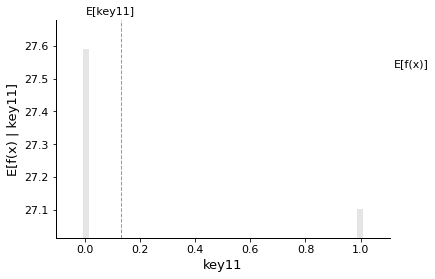

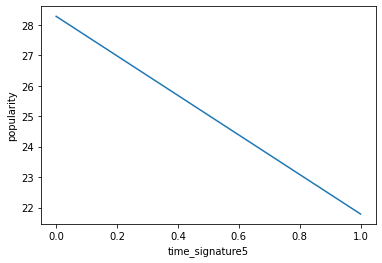

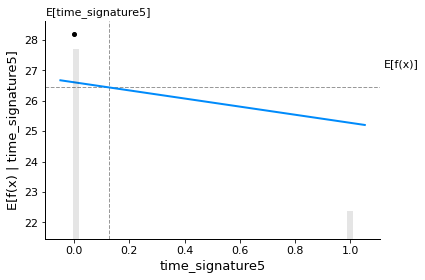

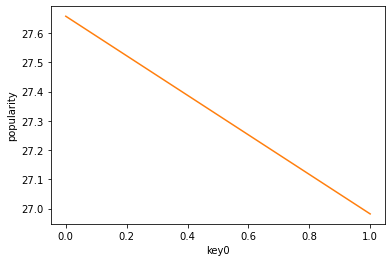

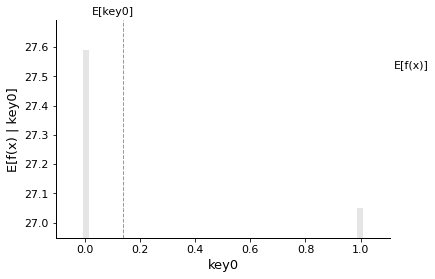

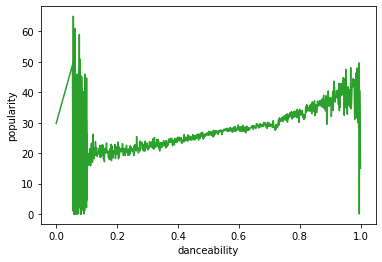

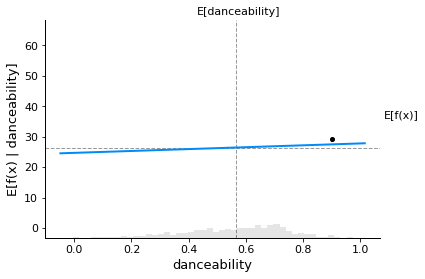

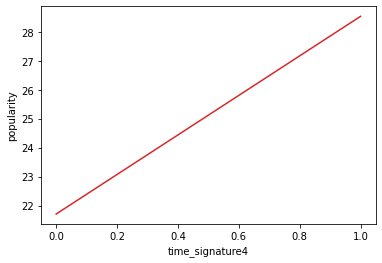

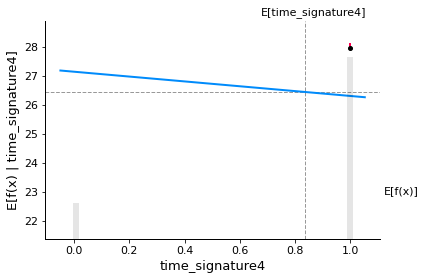

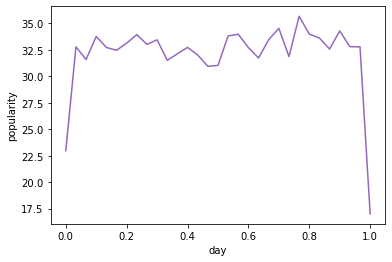

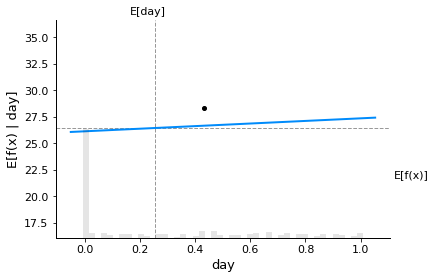

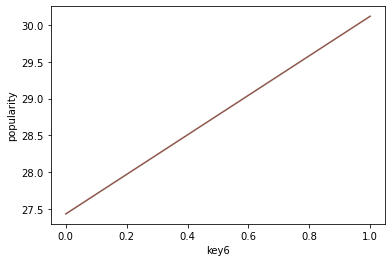

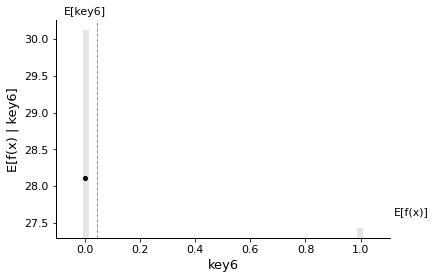

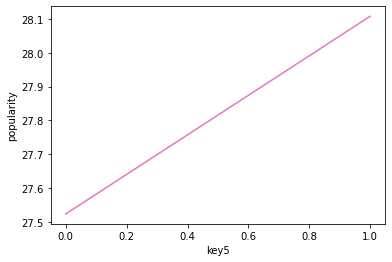

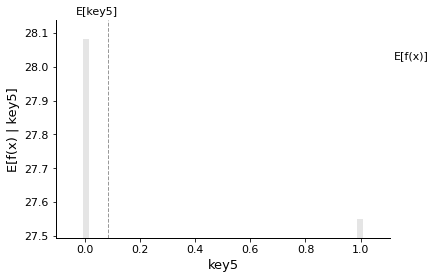

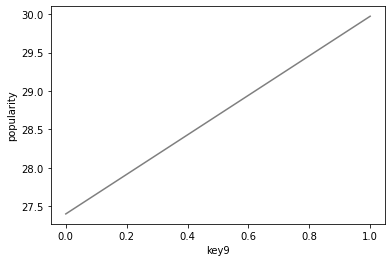

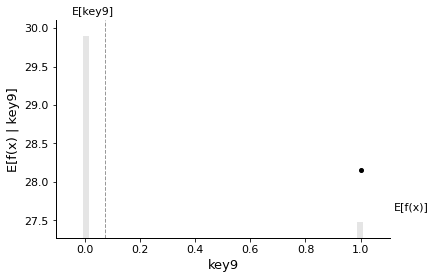

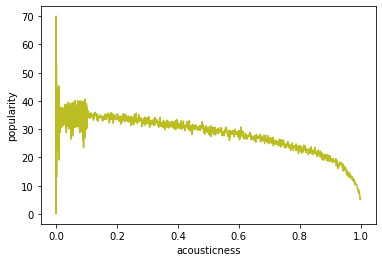

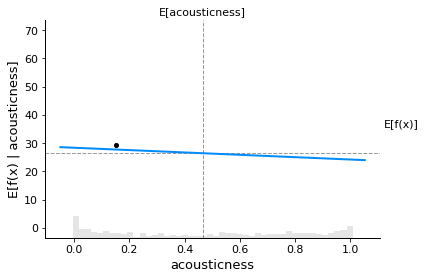

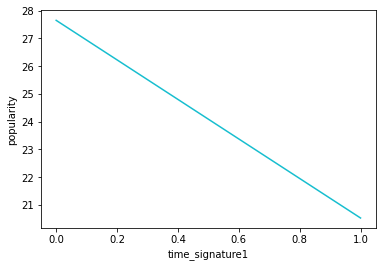

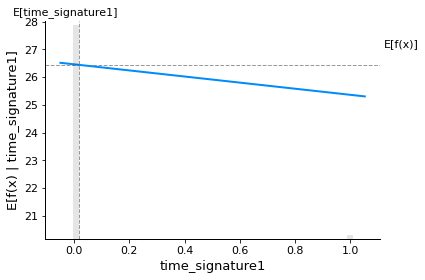

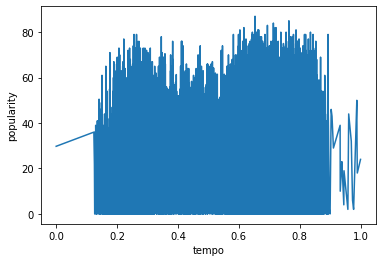

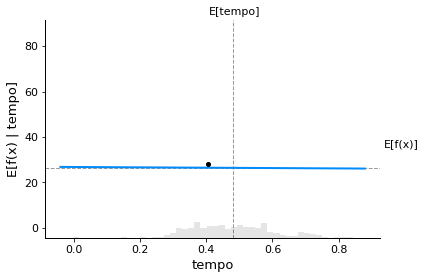

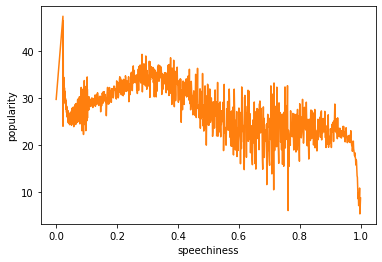

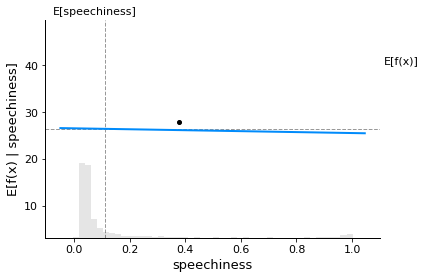

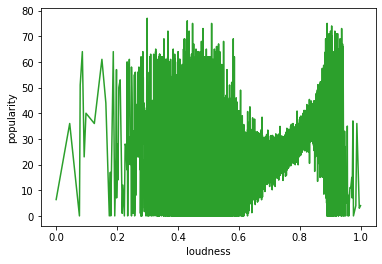

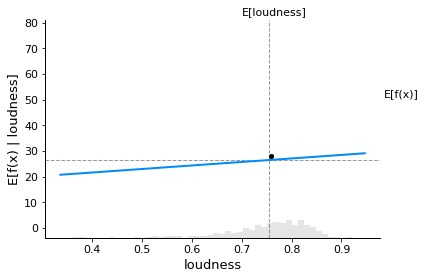

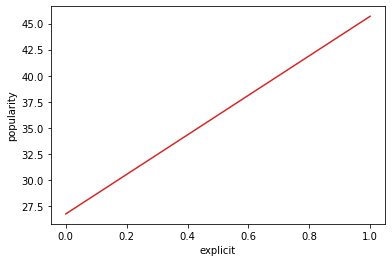

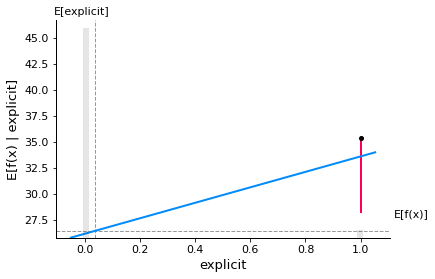

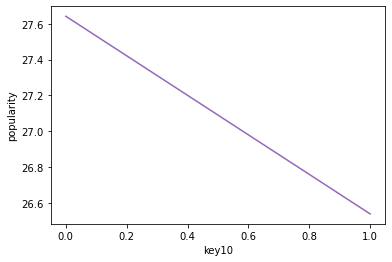

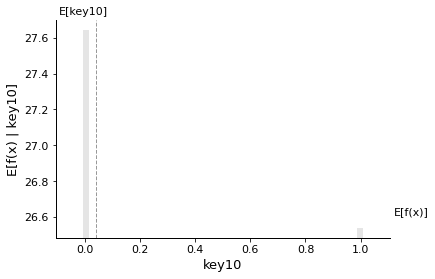

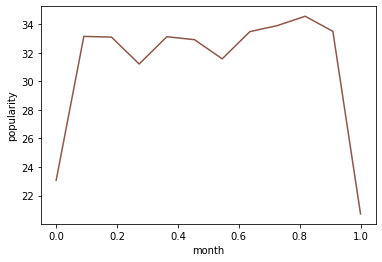

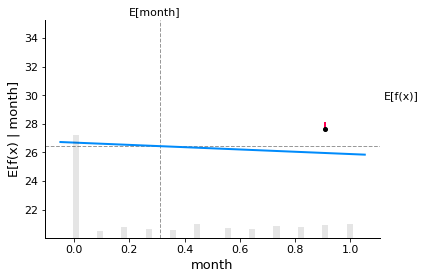

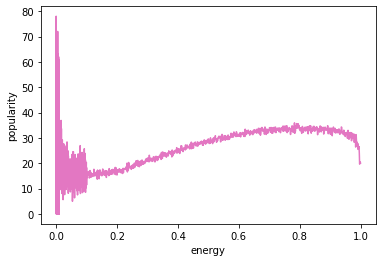

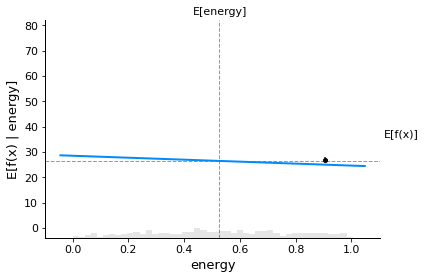

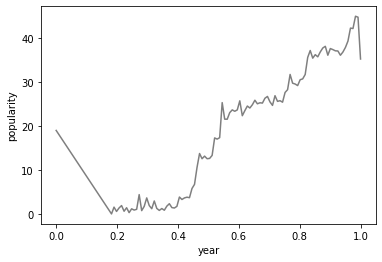

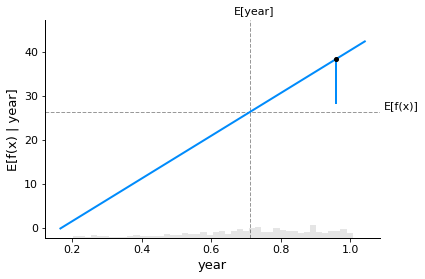

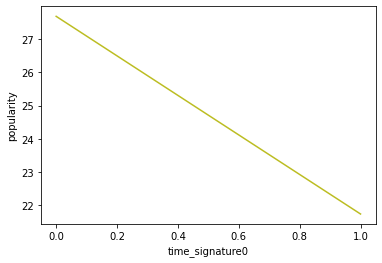

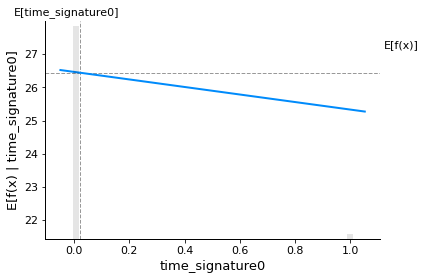

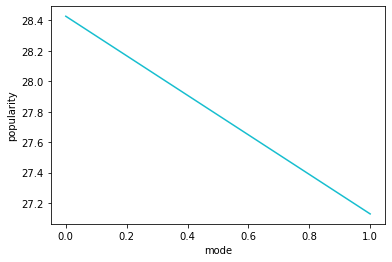

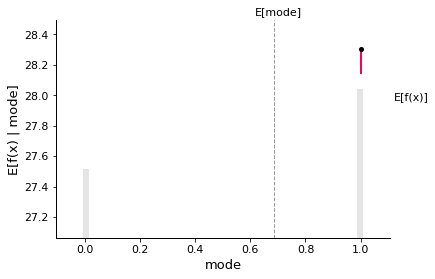

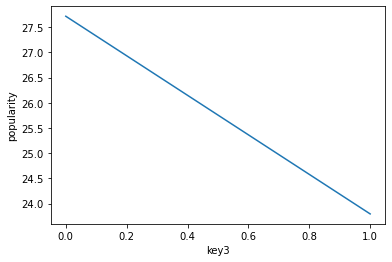

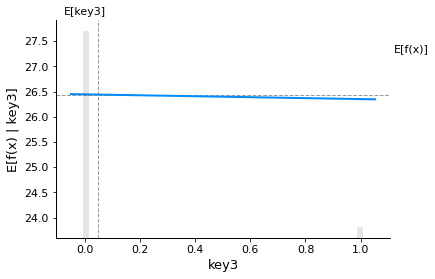

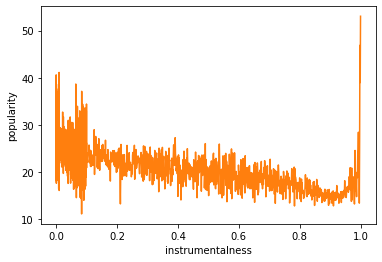

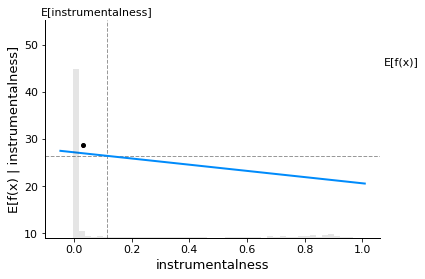

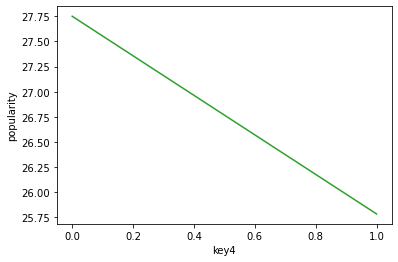

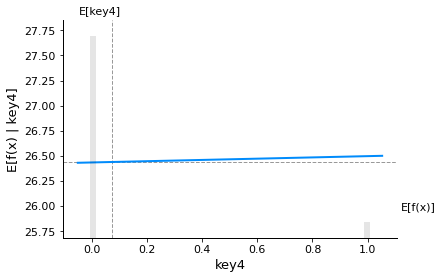

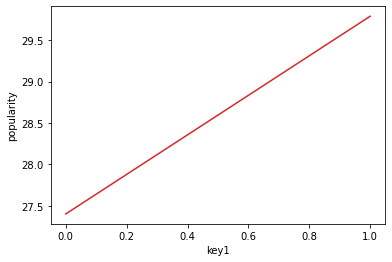

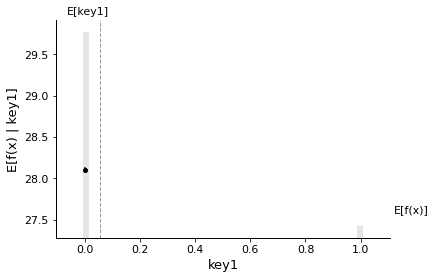

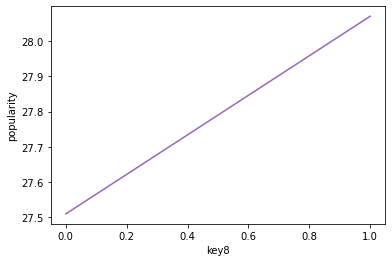

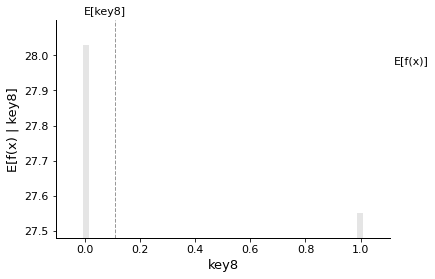

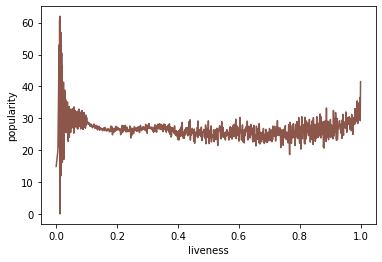

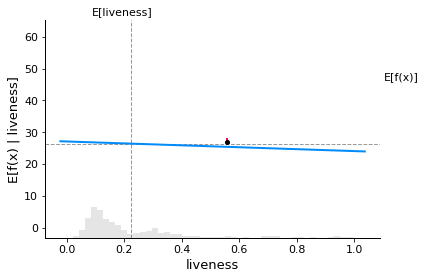

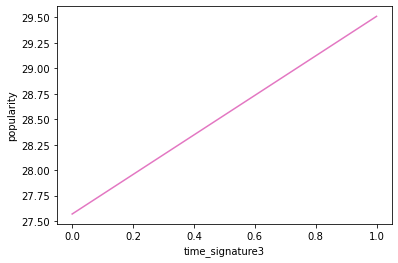

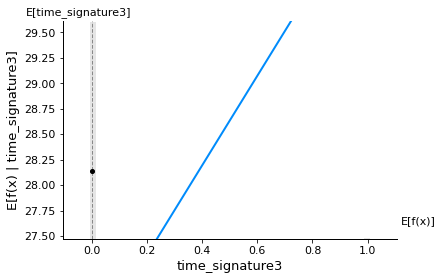

In [76]:
X_sample = X_train.sample(frac=0.001, random_state=42)
Y_sample = Y_train.loc[X_sample.index]
for var in X_sample.columns:
    ax1 = sns.lineplot(x=X_train[var], y=Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, lm.predict, X_sample, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False, shap_values=lm_shap_values[0:1, :]
    )
    ax2.set_ylim(ylim)
    plt.show()

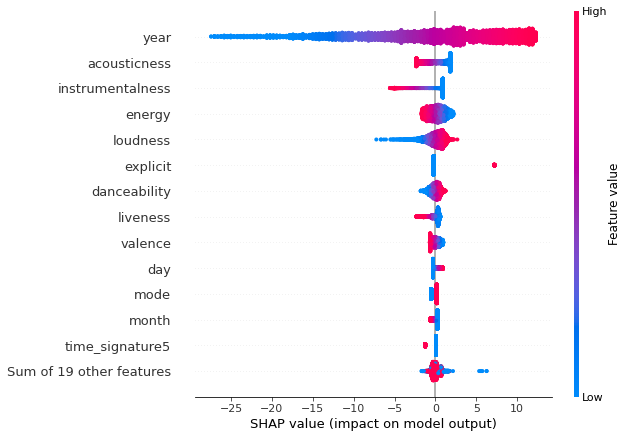

In [25]:
shap.plots.beeswarm(lm_shap_values, max_display=14)

#### Conclusion

* The model seems to confirm the hypothesis of `popularity` being a non-linear phenomenon, with only 36% of variance explained by a multivariate linear regression
* The model seems clearly linear as all the partial dependance plots show linear dependance
* It also support the hypothesis of feature importance, with `year` being the most important , and most of the variables in the top-10 hypothesis being in the one of the top-10 of the linear model (in a different order). Notably, `liveness` and `valence`
* The linear model is able the replicate some relation behavior (like `year`, `acousticness` or `danceability`) but others much less so (most of the categorical values) which is to be expected knowing the structure of non ordinal categorical values and linear model better treating ordinal values

#### Quadratic regression with ridge regularization

Linear regression on quadratized data with L2-regularization

In [26]:
# Data transformation in quadratic features
polynomizer_d2 = PolynomialFeatures(degree=2).fit(X_train)
X_train_d2 = pd.DataFrame(polynomizer_d2.transform(X_train), 
                          columns=polynomizer_d2.get_feature_names(X_train.columns))
X_test_d2 = pd.DataFrame(polynomizer_d2.transform(X_test), 
                         columns=polynomizer_d2.get_feature_names(X_test.columns))
X_train_d2.shape

(580805, 561)

In [27]:
# Train quadratic regression with ridge regularization
qm = RidgeCV(store_cv_values=True).fit(X_train_d2, Y_train)              # Fit a model according to train set

In [28]:
qm_Y_pred = qm.predict(X_train_d2)                                          # Generate predictions for train set
print("========|Train metrics|========")                                 # Calculate evaluation metrics
print("Variance explained:", explained_variance_score(Y_train, qm_Y_pred))
print("Mean squared error:", mean_squared_error(Y_train, qm_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_train, qm_Y_pred))

========|Train metrics|========
Variance explained: 0.4216291198838579
Mean squared error: 195.2404834956434
Mean absolute error: 10.79172782240093


In [29]:
# Evaluate model on test set
qm_Y_pred = qm.predict(X_test_d2)                                           # Fit a model according to test set
print("========|Test metrics|========")                                  # Generate predictions for test set
print("Variance explained:", explained_variance_score(Y_test, qm_Y_pred))   # Calculate evaluation metrics
print("Mean squared error:", mean_squared_error(Y_test, qm_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, qm_Y_pred))

========|Test metrics|========
Variance explained: 0.4026869335406339
Mean squared error: 199.36273415338522
Mean absolute error: 10.767723719554148


In [30]:
# Print coefficients
coef = dict(zip(X_train_d2.columns, qm.coef_))
coef = {k: v for k, v in sorted(coef.items(), reverse=True, key=lambda item: item[1])}
print("========|Regression coefficients|========") # Print regression coefficients
for c_name, c_val in coef.items():
    print(c_name + ":", c_val)                     # Print coefficients
print("=========|Regression intercept|========")    # Print regression intercept
print(target[0] + ":", qm.intercept_)              # Print intercept

========|Regression coefficients|========
duration_ms: 122.04756581321226
loudness year: 74.15836720299943
duration_ms valence: 65.60087442179488
loudness^2: 47.6102659476542
loudness explicit: 42.3176571505056
danceability loudness: 33.008327216770944
tempo^2: 31.78104347131087
acousticness year: 29.560281872696947
duration_ms time_signature5: 28.38180900728822
duration_ms time_signature1: 28.097613396556795
duration_ms time_signature3: 27.086065709569652
energy: 26.712579530488533
tempo loudness: 25.73774924494129
duration_ms energy: 22.860840838641295
instrumentalness: 22.767636818672415
duration_ms time_signature4: 20.650980547391722
year time_signature3: 20.64448161155091
duration_ms month: 20.332461683870708
valence danceability: 20.17858696157494
speechiness loudness: 19.247299065082807
key2 duration_ms: 18.075064766078015
duration_ms key8: 17.98472109036392
duration_ms time_signature0: 17.83109715242291
duration_ms key3: 15.152151139059029
loudness liveness: 13.940571681693205


In [31]:
def qm_predict(X):
    p2 = PolynomialFeatures(degree=2).fit(X)
    X_d2 = pd.DataFrame(p2.transform(X), 
                        columns=p2.get_feature_names(X.columns))
    return qm.predict(X_d2)

Permutation explainer:   8%|▊         | 493/5808 [06:05<1:07:40,  1.31it/s]


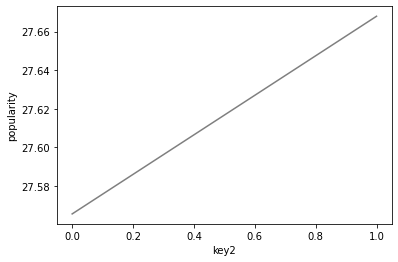

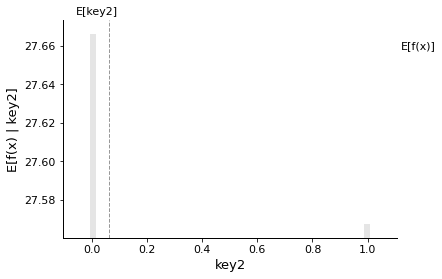

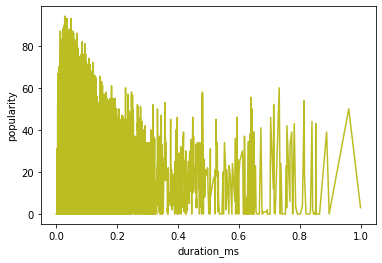

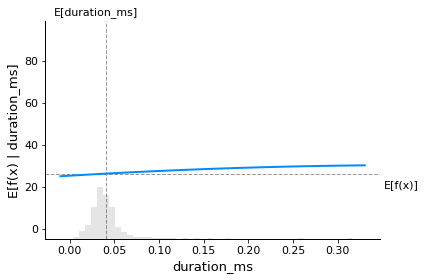

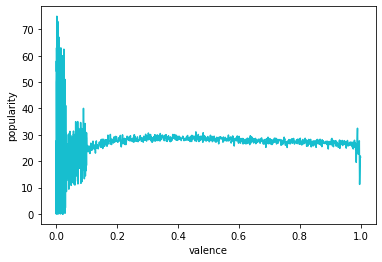

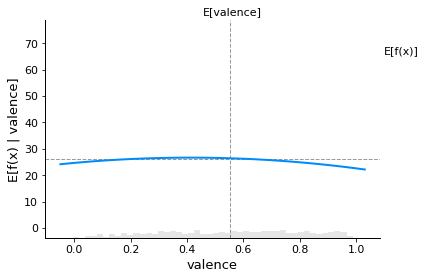

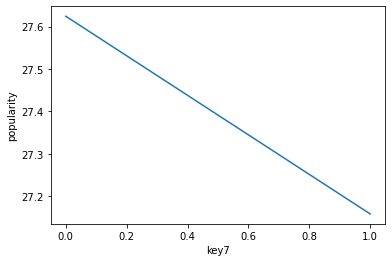

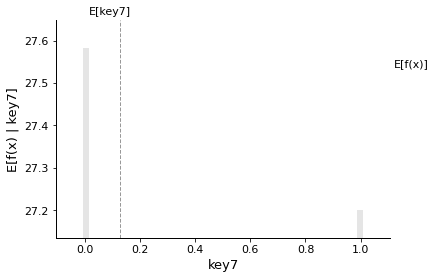

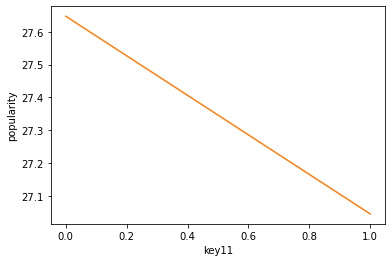

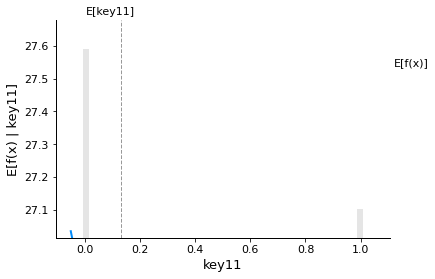

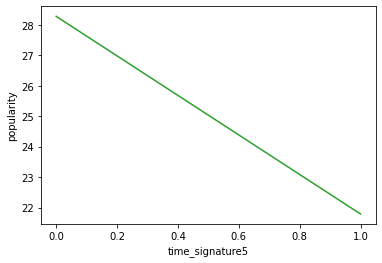

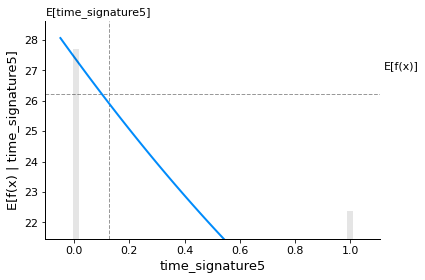

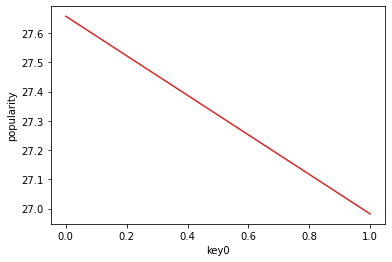

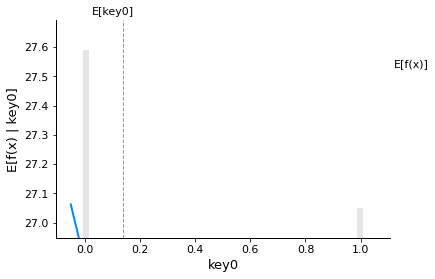

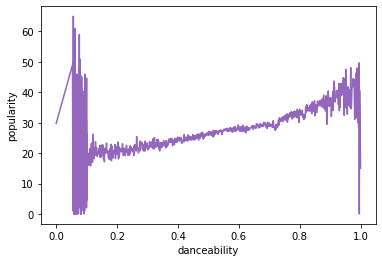

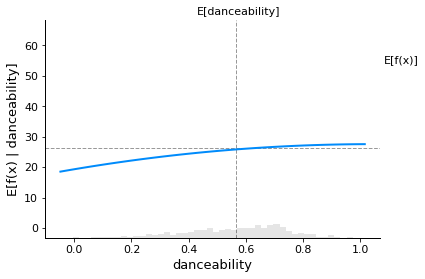

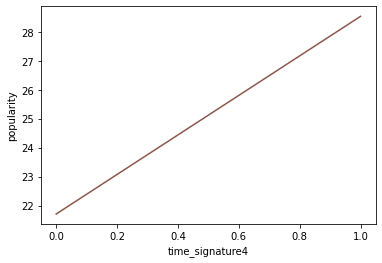

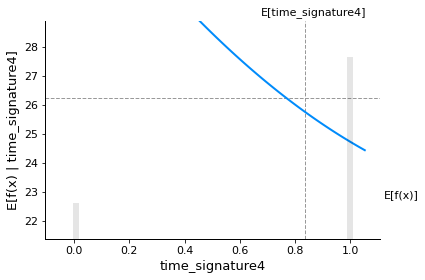

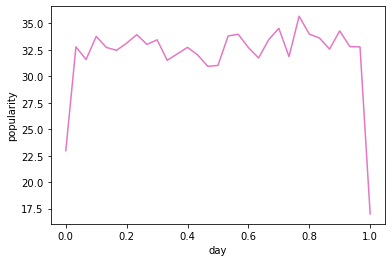

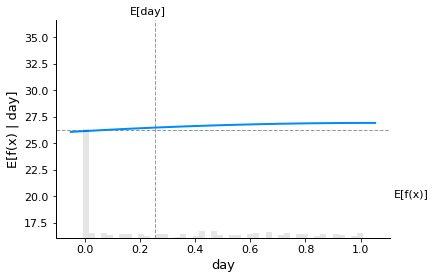

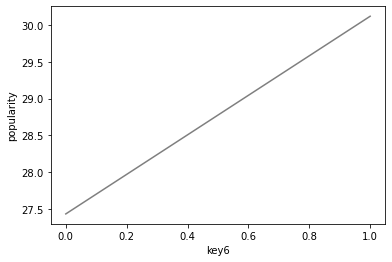

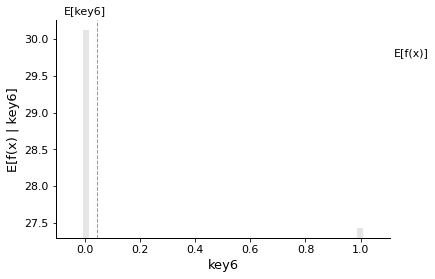

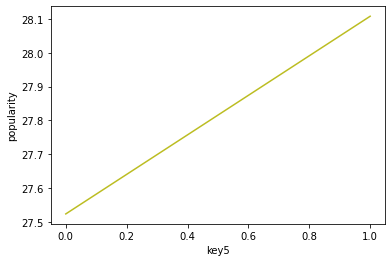

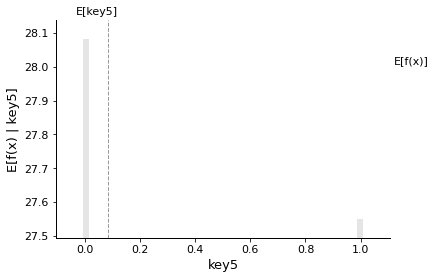

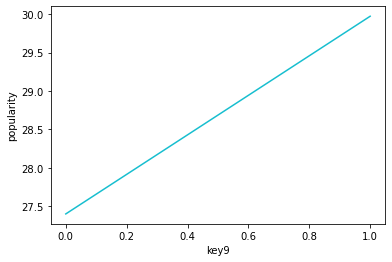

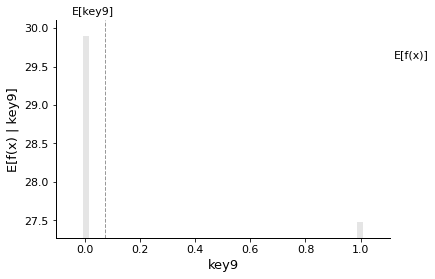

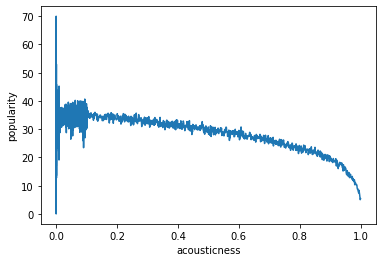

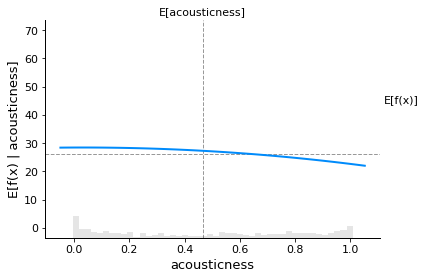

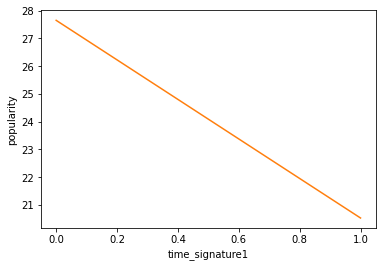

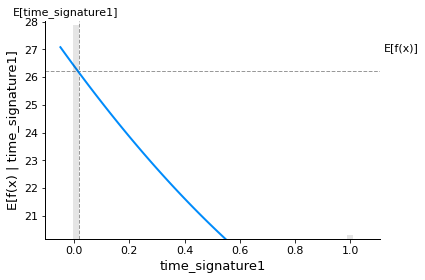

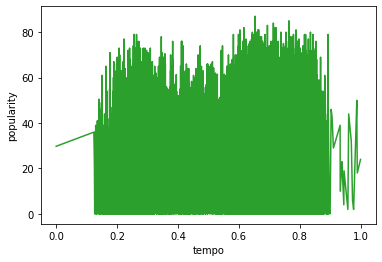

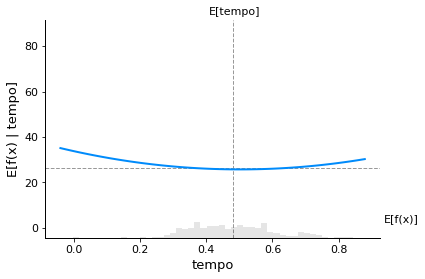

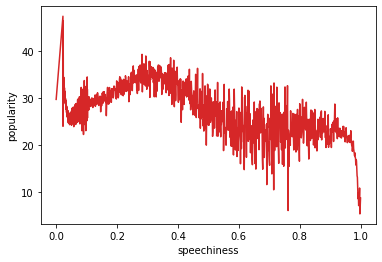

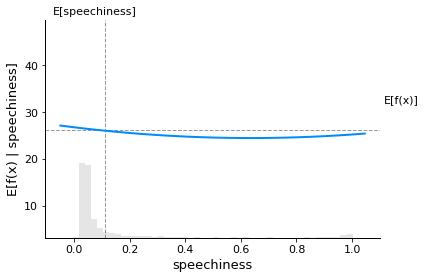

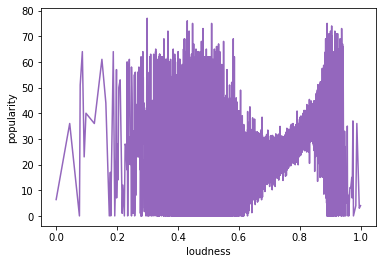

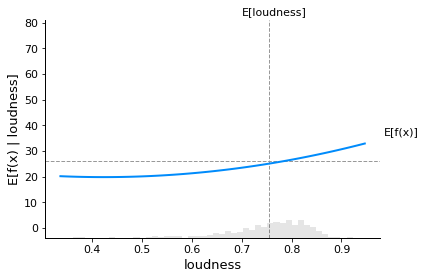

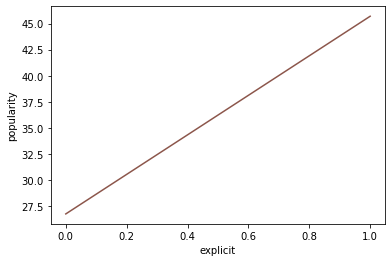

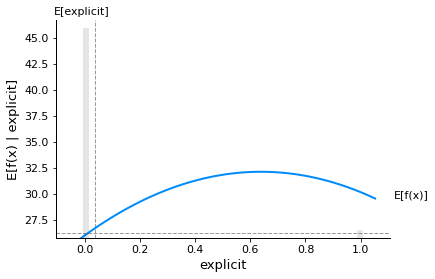

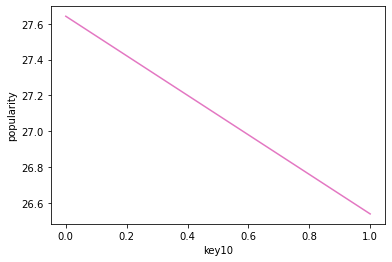

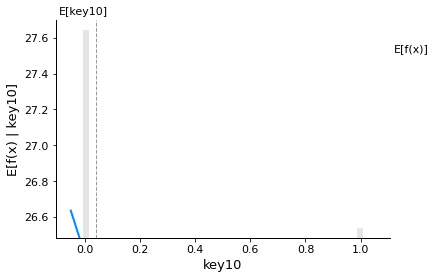

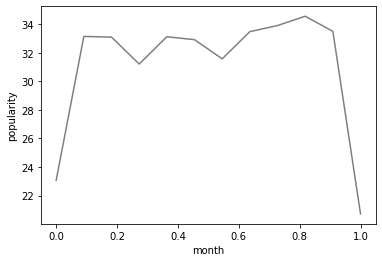

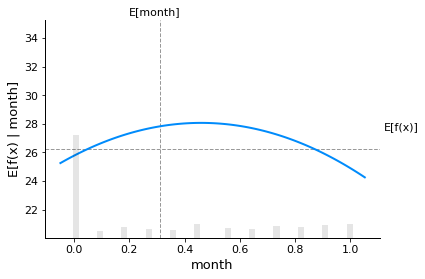

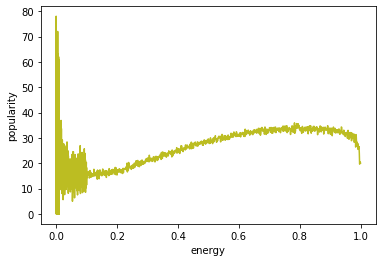

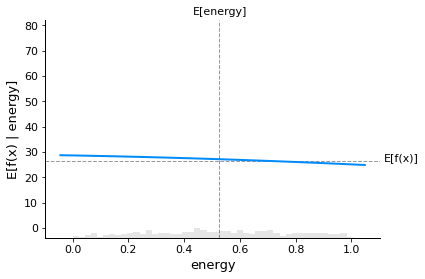

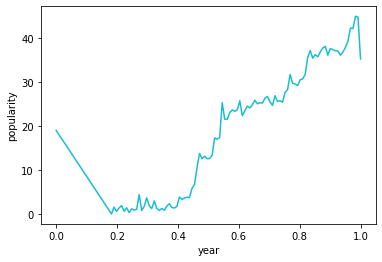

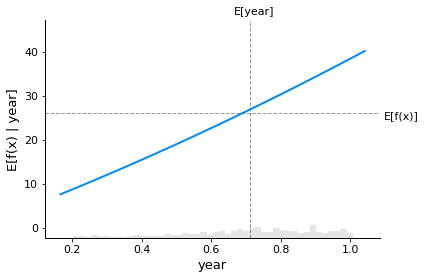

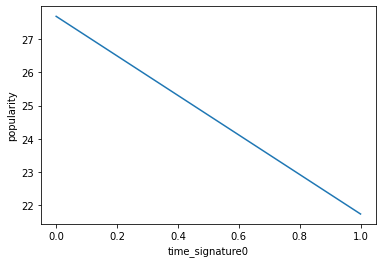

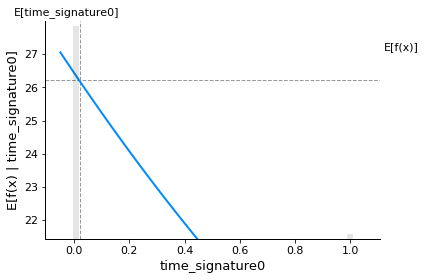

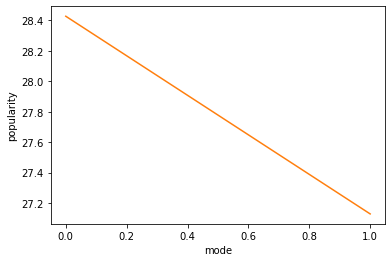

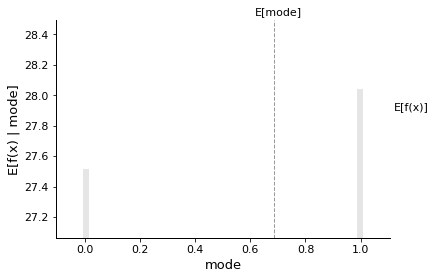

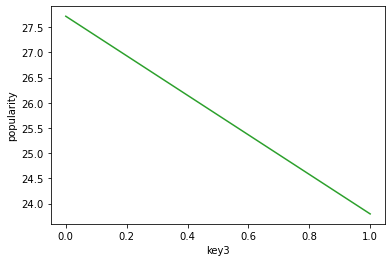

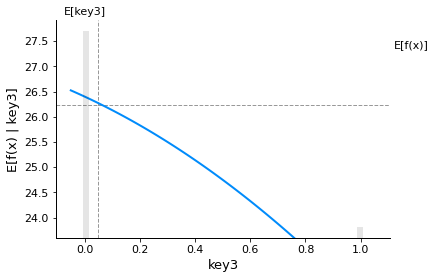

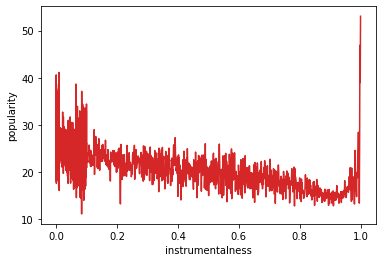

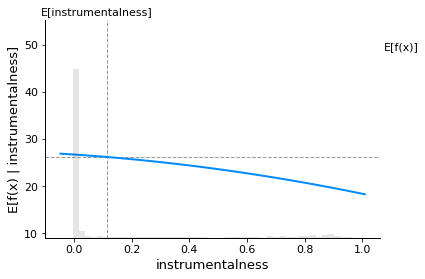

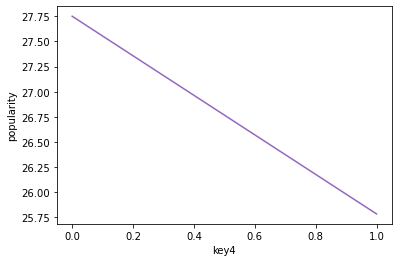

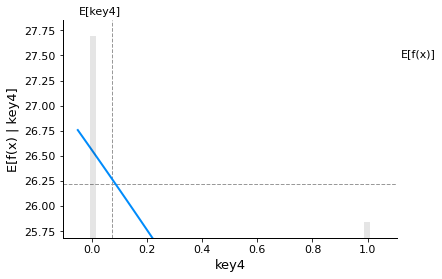

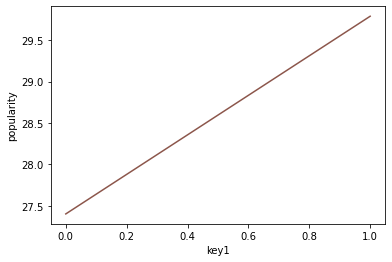

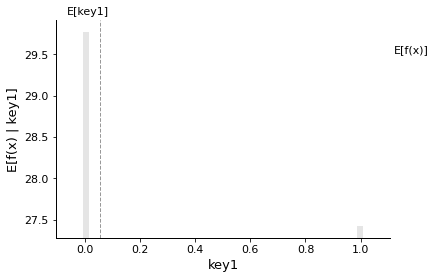

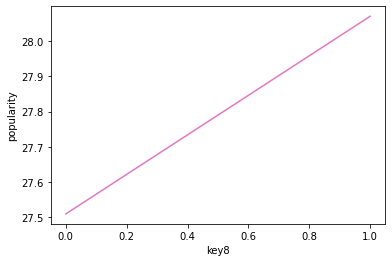

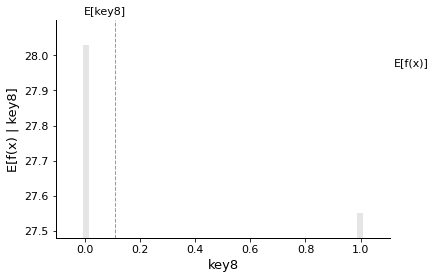

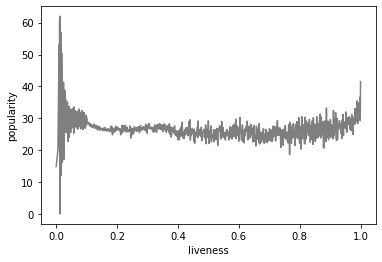

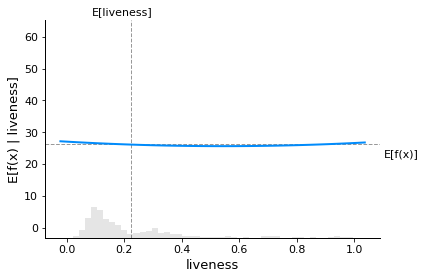

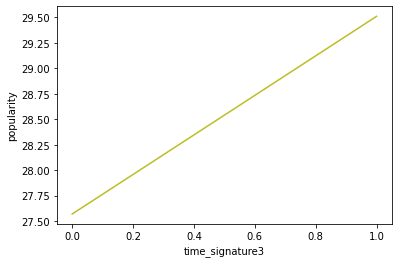

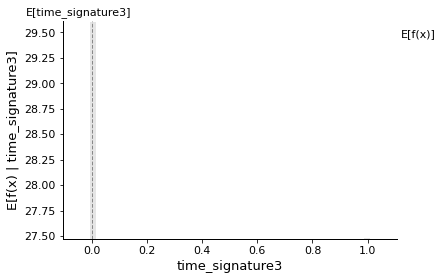

In [36]:
X_sample = X_train.sample(frac=0.001, random_state=42)
Y_sample = Y_train.loc[X_sample.index]
for var in X_sample.columns:
    ax1 = sns.lineplot(x=X_train[var], y=Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, qm_predict, X_sample, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False
    )
    ax2.set_ylim(ylim)
    plt.show()

In [37]:
qm_explainer = shap.Explainer(qm_predict, X_train)
qm_shap_values = qm_explainer(X_sample)

Permutation explainer: 582it [06:18,  1.50it/s]                         


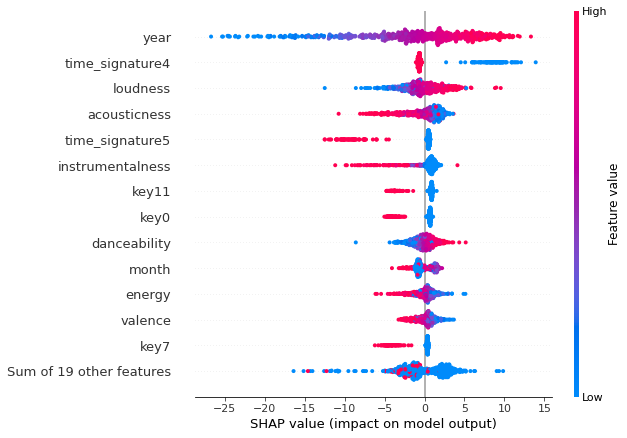

In [38]:
shap.plots.beeswarm(qm_shap_values, max_display=14)

##### Conclusion 

* The quadratic model seems to explain 41% of the target variance, making it more suitable than the linear model
* The tradeoff is a less interpreatable model at glance, as it emplies combined and amplified features, but with a certain trick into the predict function, we can bypass this and the see the influence of each features independently 
* As for the linear model, the partial dependance plot shows clearly quadratic dependance of features to target
* As for the linear model, `year` is the the most importante variable and most of our top-10 features still hold (with a few exception again). Notably, `day` and `month` seems to have more importance in this model.
* As for the lineal model, most of the qualitative variables relations are pretty well modelized, but the model fails for almost all the categorical values

#### Decision Tree

Model represented as a hierarchical binary tree, built by minimizing some criteria (here the mean squared error) at each data split occuring at tree's node.

In [39]:
# Train decision tree through
dtr = DecisionTreeRegressor(ccp_alpha=0.01, random_state=42).fit(X_train, Y_train)
print("Depth: " + str(dtr.get_depth()))
print("# leaves: " + str(dtr.get_n_leaves()))

Depth: 23
# leaves: 925


In [40]:
dtr_Y_pred = dtr.predict(X_train)                                          # Generate predictions for train set
print("========|Train metrics|========")                                 # Calculate evaluation metrics
print("Variance explained:", explained_variance_score(Y_train, dtr_Y_pred))
print("Mean squared error:", mean_squared_error(Y_train, dtr_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_train, dtr_Y_pred))

========|Train metrics|========
Variance explained: 0.5137406082488649
Mean squared error: 164.14643616000293
Mean absolute error: 9.631640754431292


In [79]:
dtr_Y_pred = dtr.predict(X_test)                                           # Fit a model according to test set
print("========|Test metrics|========")                                  # Generate predictions for test set
print("Variance explained:", explained_variance_score(Y_test, dtr_Y_pred))   # Calculate evaluation metrics
print("Mean squared error:", mean_squared_error(Y_test, dtr_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, dtr_Y_pred))

========|Test metrics|========
Variance explained: 0.4025338739018508
Mean squared error: 202.67987806136887
Mean absolute error: 10.550862828195665


In [42]:
feat_importance = dict(zip(X_train.columns, dtr.feature_importances_))
feat_importance = {k: v for k, v in sorted(feat_importance.items(), reverse=True, key=lambda item: item[1])}
print("========|Decision Tree features importance|========") # Print regression coefficients
for fi_name, fi_value in feat_importance.items():
    if(fi_value != 0):
        print(fi_name + ":", fi_value)  

========|Decision Tree features importance|========
year: 0.7426197816815712
instrumentalness: 0.06061538685309759
acousticness: 0.0386479321845771
month: 0.03296283185505256
duration_ms: 0.02849439382594236
day: 0.02006115709616036
loudness: 0.019905061264120037
explicit: 0.010244534192704763
danceability: 0.009862787362161224
energy: 0.009467795165488131
speechiness: 0.008273407231344725
valence: 0.0061480563180304456
liveness: 0.005937273561968919
tempo: 0.005618523075583111
mode: 0.0007783230321314621
key4: 7.955992400299933e-05
key8: 6.27294135104655e-05
time_signature5: 6.105143380585788e-05
key11: 5.818625940512436e-05
key7: 5.417013785771074e-05
time_signature4: 4.705813148398836e-05


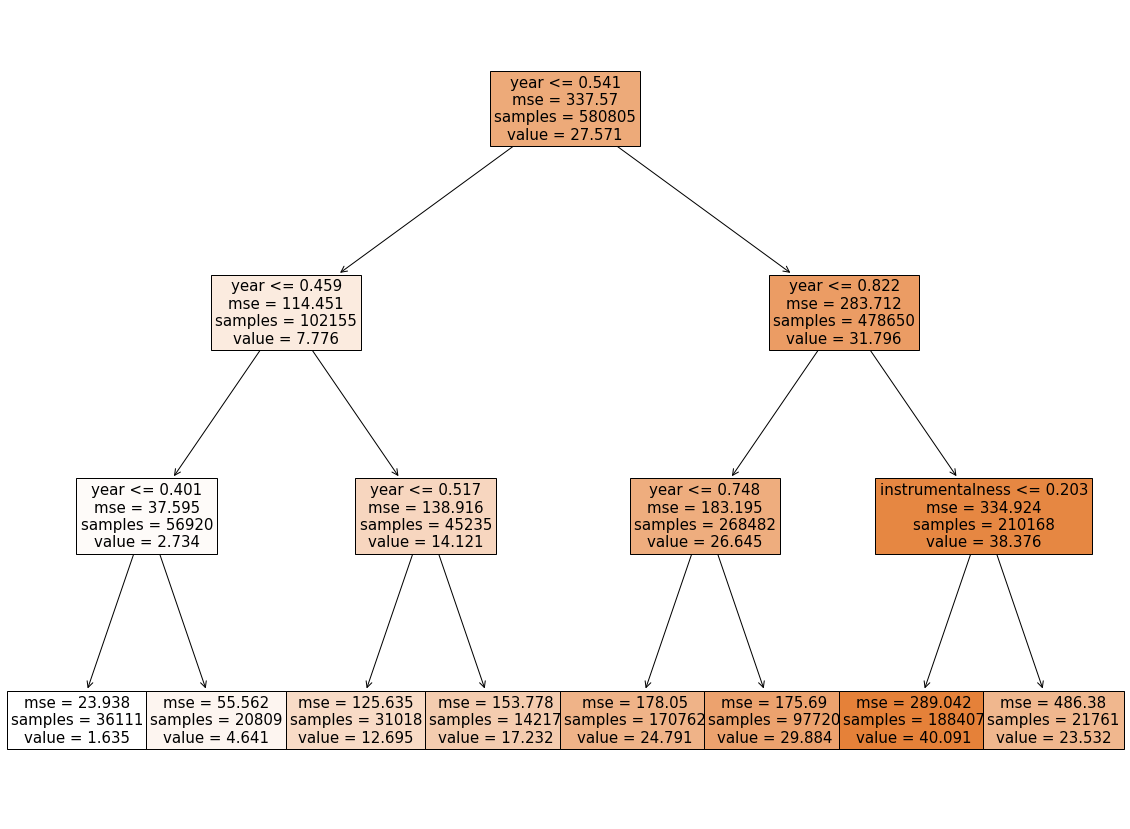

In [43]:
tree_ex = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train, Y_train)
fig = plt.figure(figsize=(20,15))
final_tree = plot_tree(tree_ex,
                       feature_names=X_train.columns,
                       filled=True,
                       fontsize=15)
plt.show()

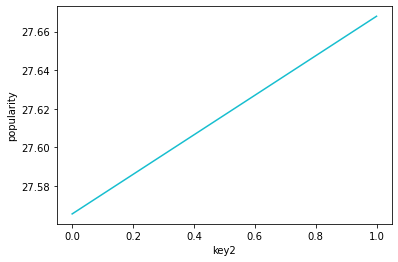

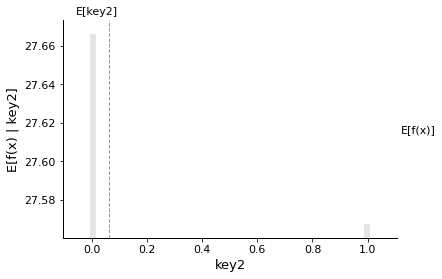

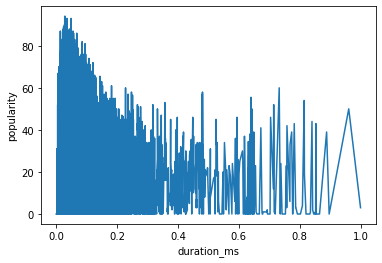

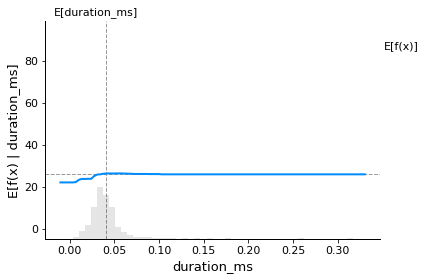

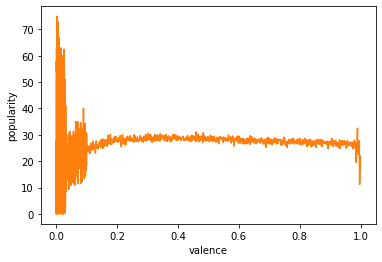

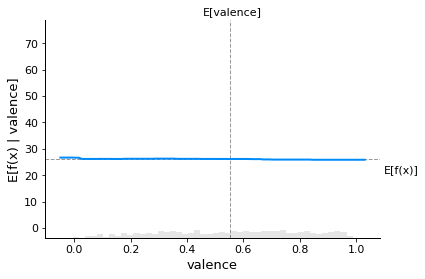

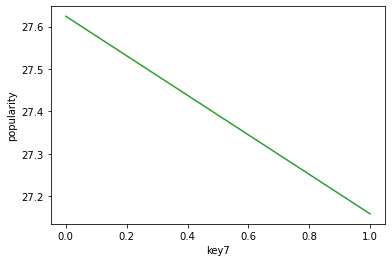

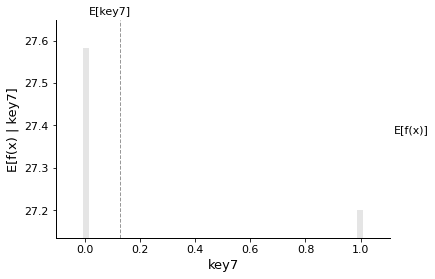

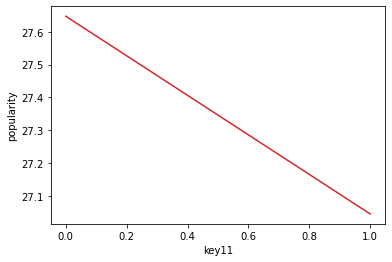

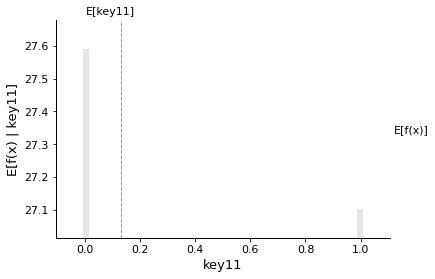

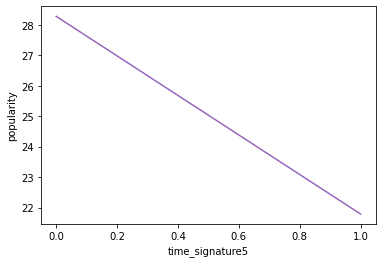

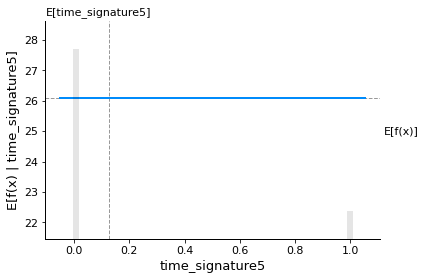

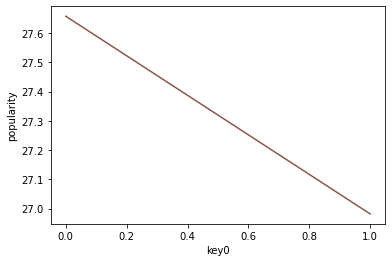

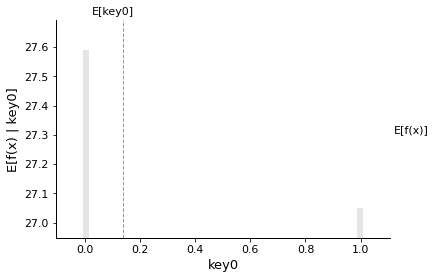

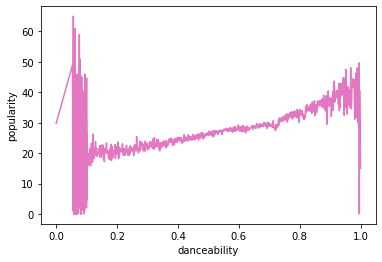

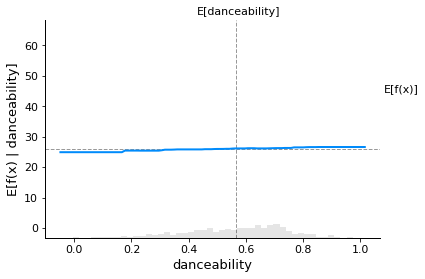

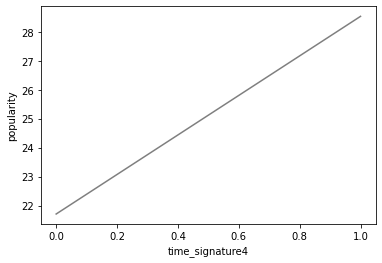

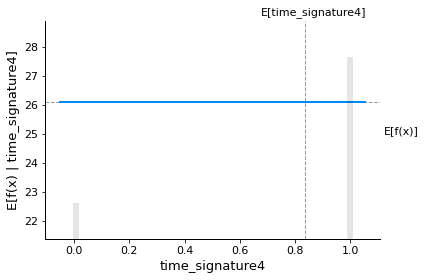

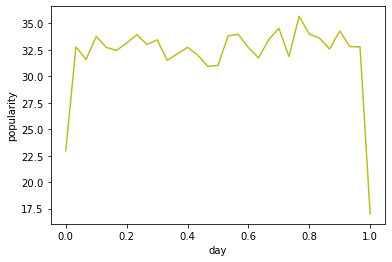

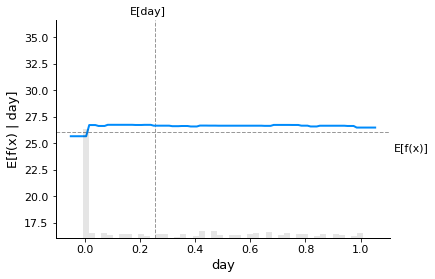

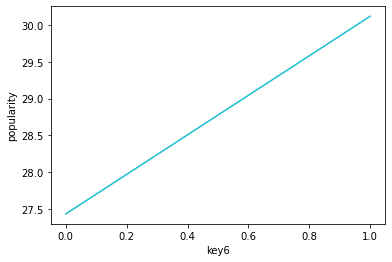

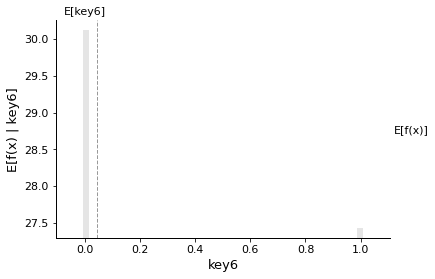

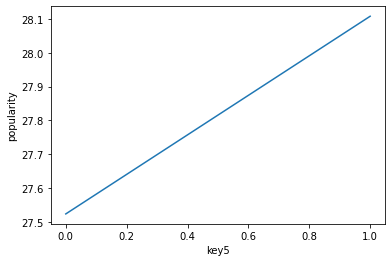

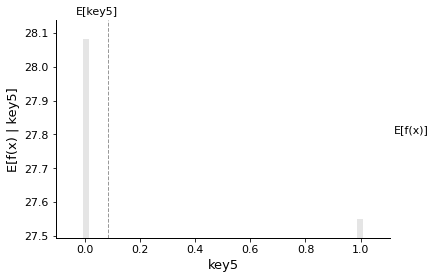

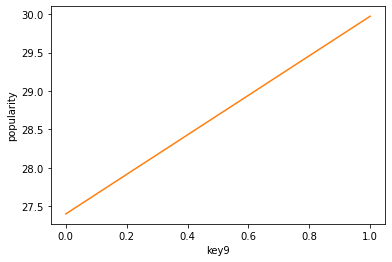

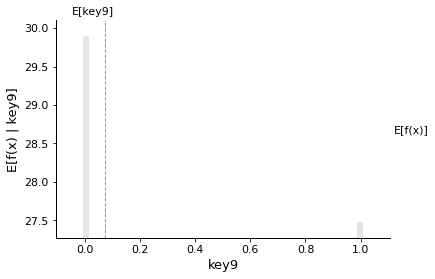

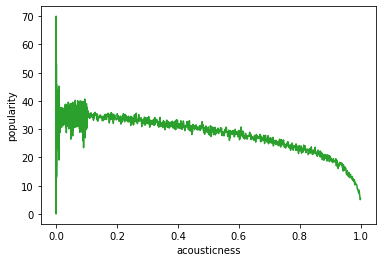

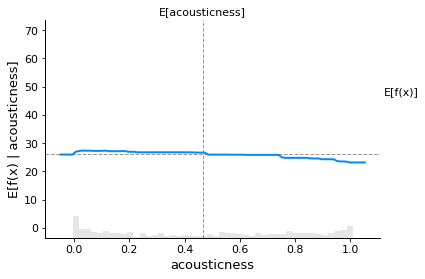

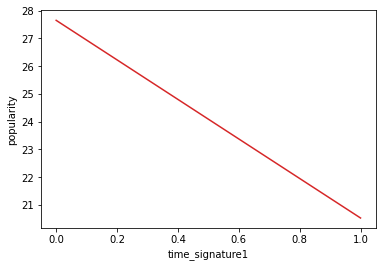

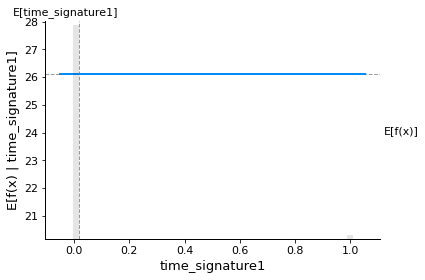

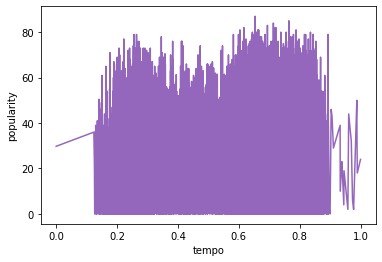

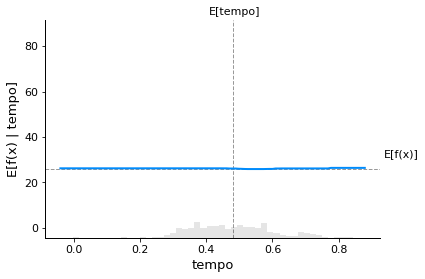

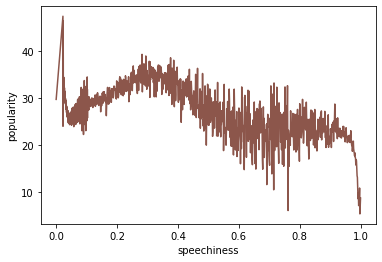

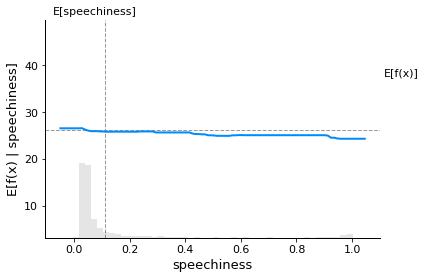

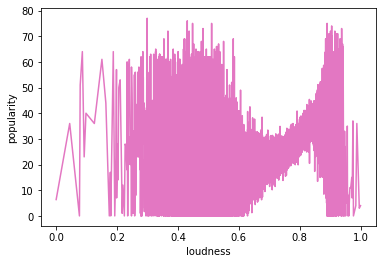

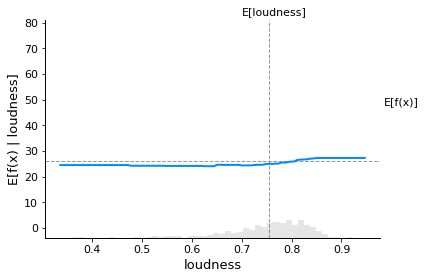

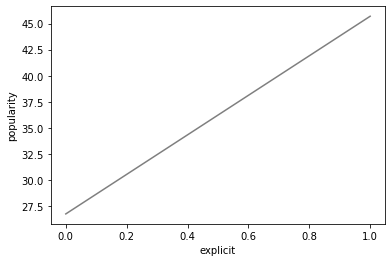

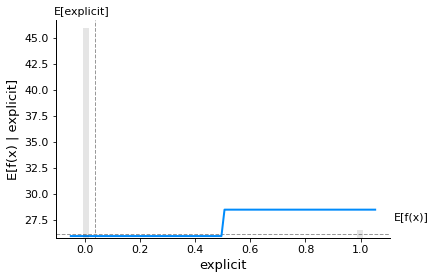

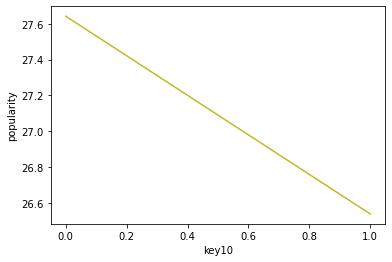

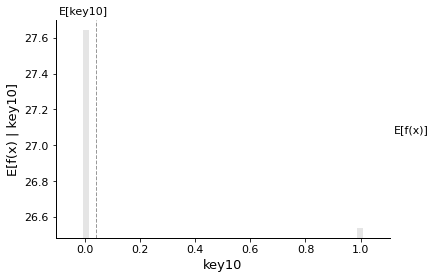

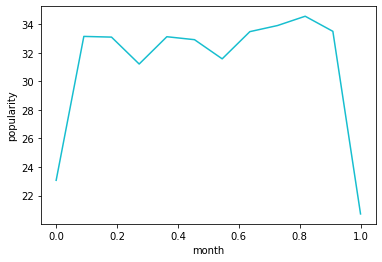

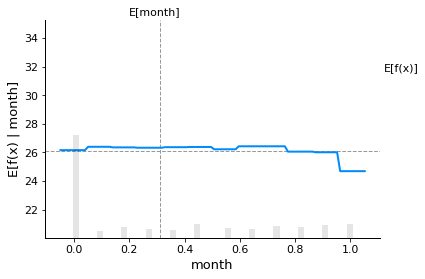

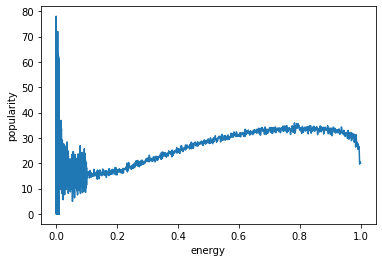

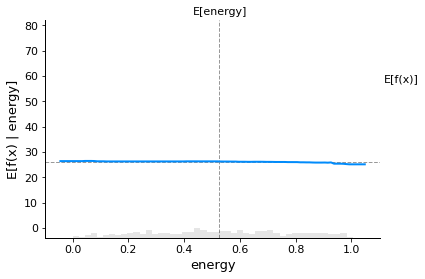

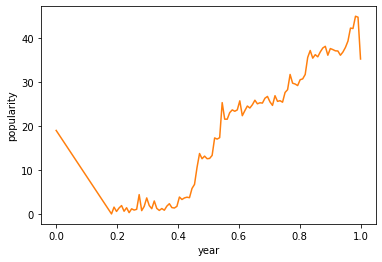

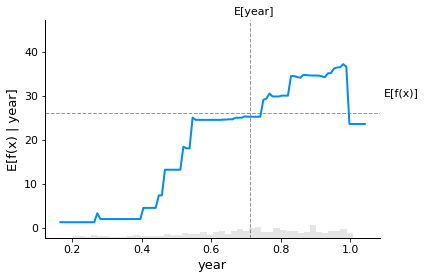

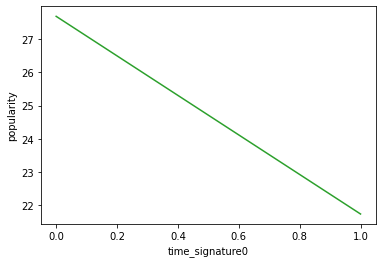

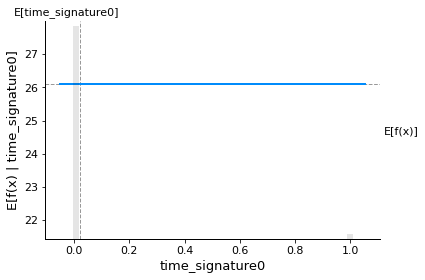

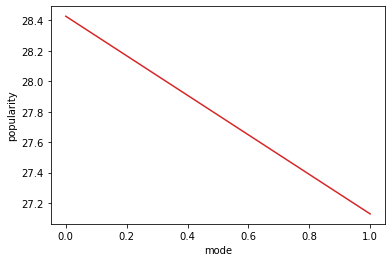

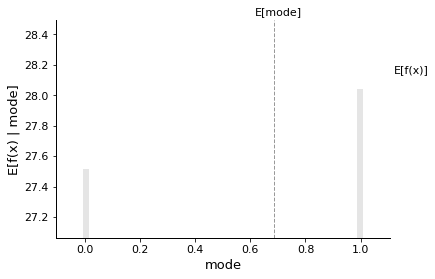

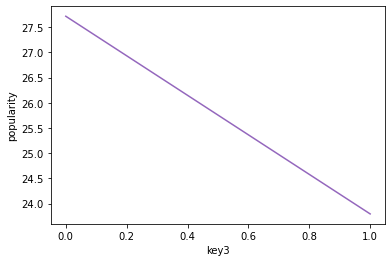

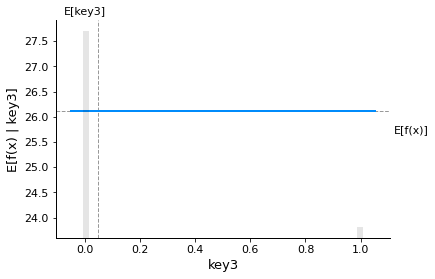

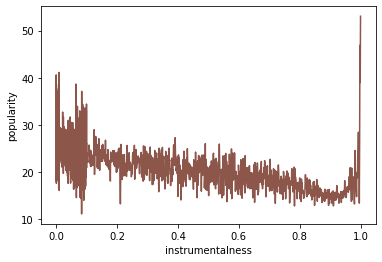

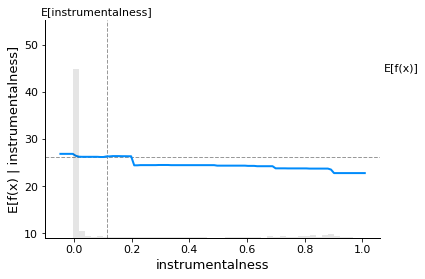

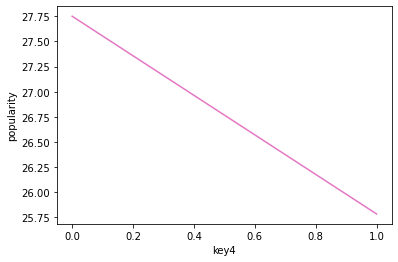

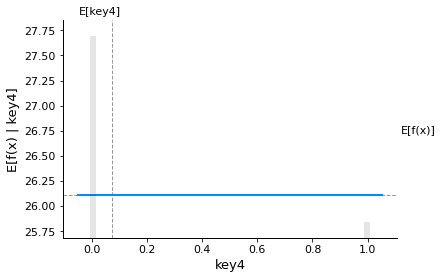

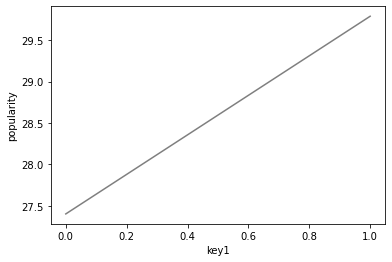

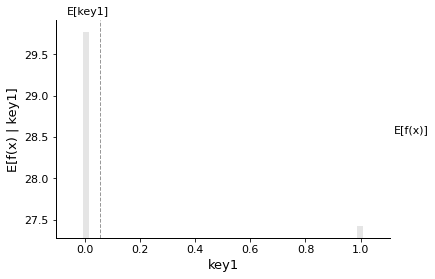

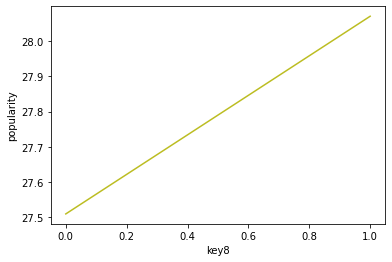

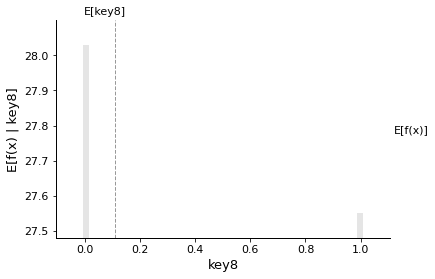

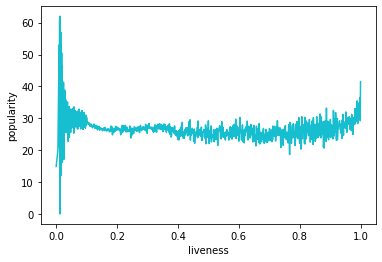

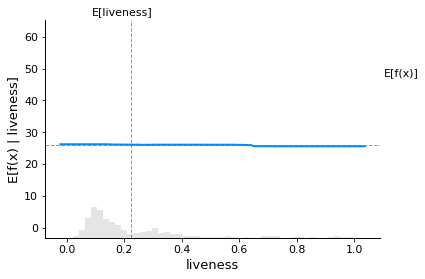

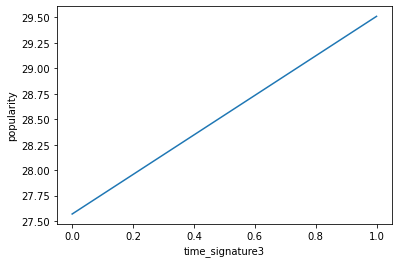

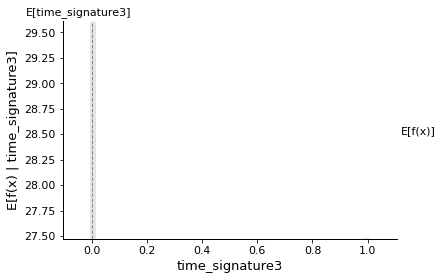

In [44]:
X_sample = X_train.sample(frac=0.001, random_state=42)
Y_sample = Y_train.loc[X_sample.index]
for var in X_sample.columns:
    ax1 = sns.lineplot(x=X_train[var], y=Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, dtr.predict, X_sample, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False
    )
    ax2.set_ylim(ylim)
    plt.show()

In [45]:
dtr_explainer = shap.TreeExplainer(dtr, X_train)
dtr_shap_values = dtr_explainer(X_sample)

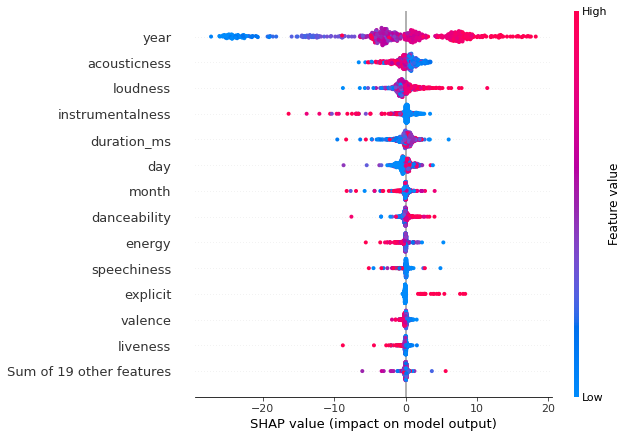

In [46]:
shap.plots.beeswarm(dtr_shap_values, max_display=14)

#### Conclusion
* The decision tree is doing marginally better (1% better) than the quadractif model, for a a longer training time, which isn't making it a good replacement at first.
* The decision tree is better modelizer though, as by it's nature (a hierarchical model) to modelize as much as simple linear relation than more complex, like the one with `year`. We can observe though that the partial dependance lines are sharper than the quadratic ones, again due to the decision tree nature
* Once again, one-hot encoded features are poorly modelize, as decision tree are also better at using ordinal values for prediction, specially split decision
* One advantage are they are easily interpretable, but this interpretability is quickly overcomed as the tree is bigger, which start being messy starting from a depth of 3. Howewer, on this small tree, we can see that all the split, except one, are based around `year`, showing once again how old songs are surely less popular
* There seems to be a variance problem, as there is a difference between train and test performance (i.e difference of 10% in explained variance), meaning the model is too complex and overfit the training data. The general tactic to adress this problem is through regularization, and it can be done in multiple ways. The one applied here was through the hyperparameter `ccp_alpha`, which permits regularization through cost-complexity pruning, finding the optimal minimal tree for the problem with the help of the hyperparameter, a higher value pruning more of the tree
* Once again, most of our hypothesis seems to hold, specially about `year`, `loudness`, `acousticness`, `duration_ms` and `instrumentalness`

#### Random Forest

Model using an ensemble of tree, each one of them trained on data sample (as well for the obervations than the features), by averaging the result returned by each tree

In [47]:
# Train decision tree through
rf = RandomForestRegressor(n_estimators=100, max_samples=0.01, ccp_alpha=0.01,
                           random_state=42, n_jobs=8).fit(X_train, Y_train)

In [48]:
rf_Y_pred = rf.predict(X_train)                                          # Generate predictions for train set
print("========|Train metrics|========")                                 # Calculate evaluation metrics
print("Variance explained:", explained_variance_score(Y_train, rf_Y_pred))
print("Mean squared error:", mean_squared_error(Y_train, rf_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_train, rf_Y_pred))

========|Train metrics|========
Variance explained: 0.49639450640728466
Mean squared error: 170.03160313960345
Mean absolute error: 9.910811051785606


In [49]:
rf_Y_pred = rf.predict(X_test)                                           # Fit a model according to test set
print("========|Test metrics|========")                                  # Generate predictions for test set
print("Variance explained:", explained_variance_score(Y_test, rf_Y_pred))   # Calculate evaluation metrics
print("Mean squared error:", mean_squared_error(Y_test, rf_Y_pred))
print("Mean absolute error:", mean_absolute_error(Y_test, rf_Y_pred))

========|Test metrics|========
Variance explained: 0.42854562664465135
Mean squared error: 191.24174453455964
Mean absolute error: 10.433213997261081


In [50]:
feat_importance = dict(zip(X_train.columns, rf.feature_importances_))
feat_importance = {k: v for k, v in sorted(feat_importance.items(), reverse=True, key=lambda item: item[1])}
print("========|Decision Tree features importance|========") # Print regression coefficients
for fi_name, fi_value in feat_importance.items():
    if(fi_value != 0):
        print(fi_name + ":", fi_value)  

========|Decision Tree features importance|========
year: 0.4159553919263816
acousticness: 0.061963366758596095
instrumentalness: 0.06152461571189651
duration_ms: 0.053890941051650494
loudness: 0.04868954453759621
liveness: 0.044632691396180466
tempo: 0.044426278739667584
speechiness: 0.043777286808382325
danceability: 0.04374813393137148
energy: 0.042452874677890676
valence: 0.04193860191837491
month: 0.025169722715133114
day: 0.02439007538004036
explicit: 0.005155226860077941
mode: 0.004639581990196897
key0: 0.00347310844320946
key8: 0.003469528094852903
key11: 0.003206333954107346
key7: 0.0031373629560197693
key5: 0.0030375824374653327
key4: 0.002947119108492782
key9: 0.002606665623170452
key2: 0.002534400961544127
key10: 0.002492873502330344
key1: 0.0024454800232239907
key6: 0.002377302273417636
time_signature4: 0.001678009358950609
key3: 0.0016522493302908387
time_signature5: 0.0014224422829166492
time_signature0: 0.0006059162424291425
time_signature1: 0.0005310598637794765
time_s

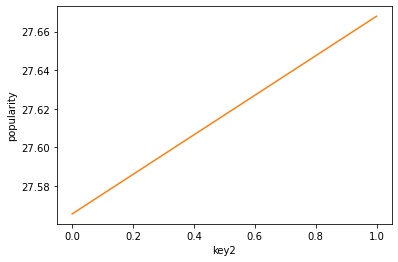

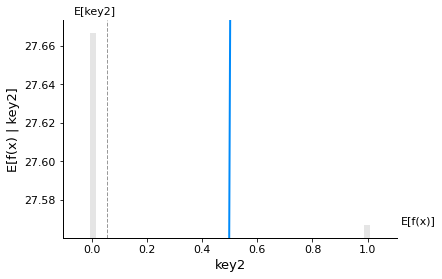

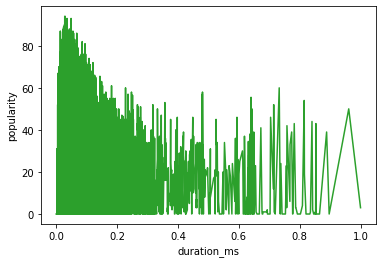

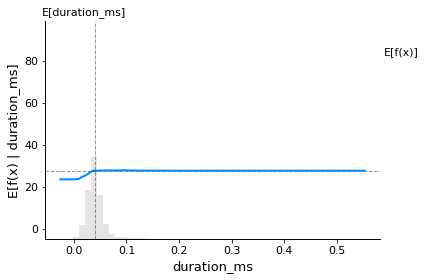

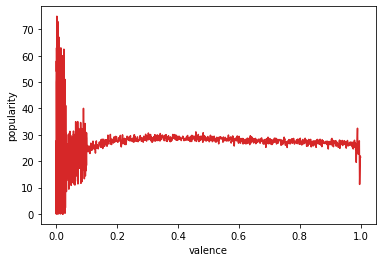

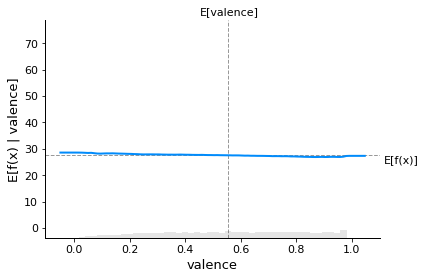

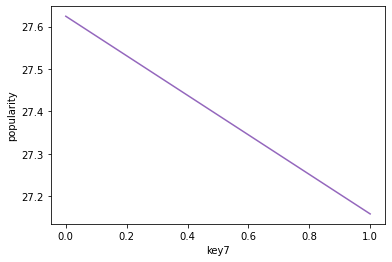

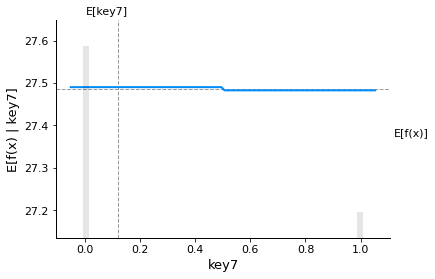

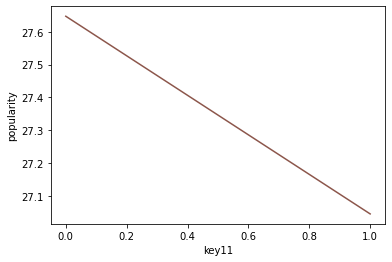

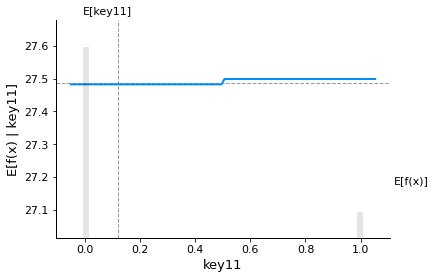

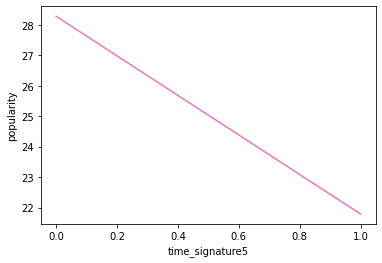

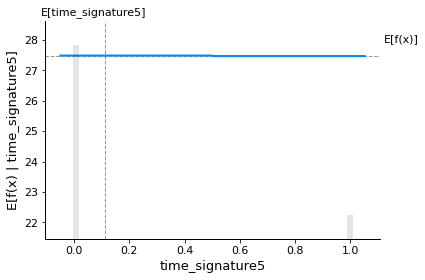

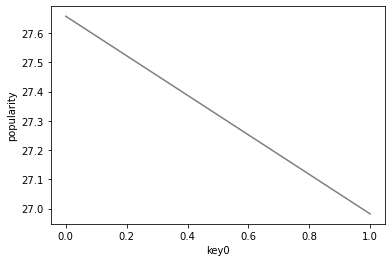

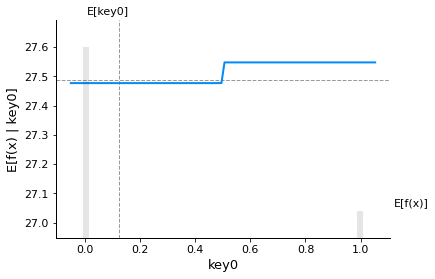

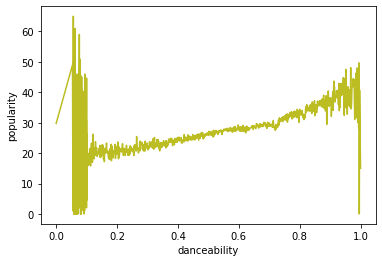

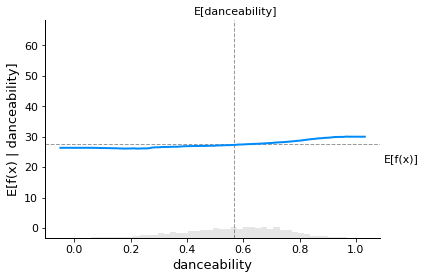

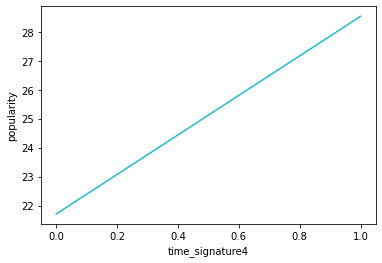

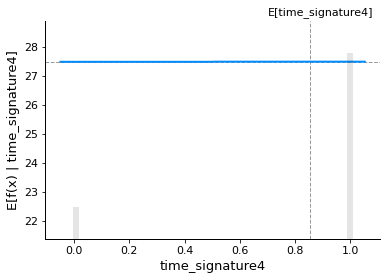

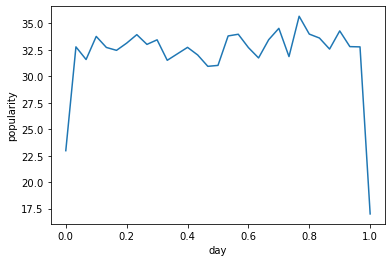

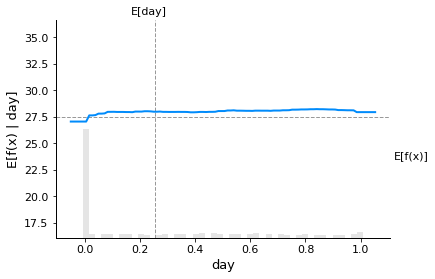

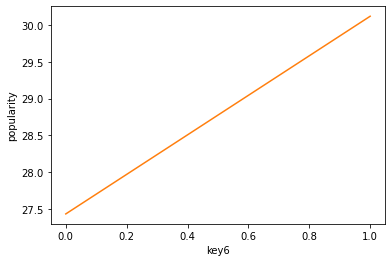

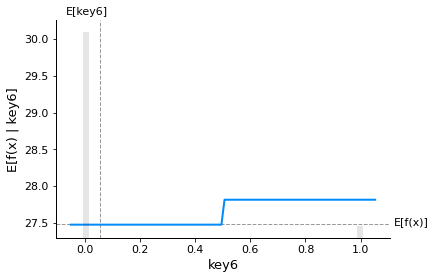

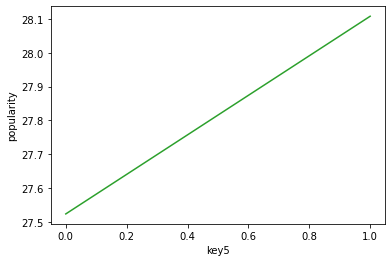

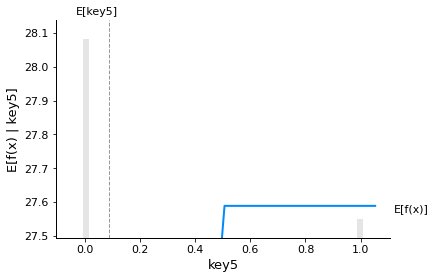

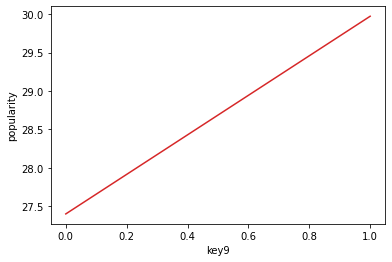

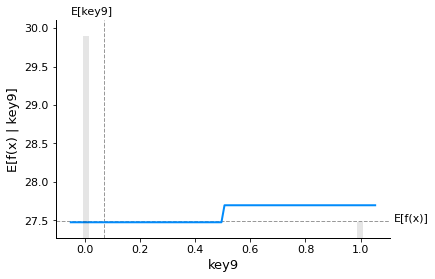

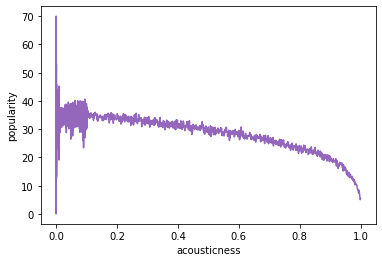

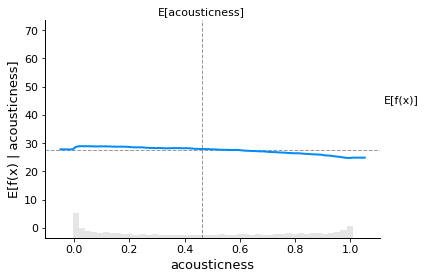

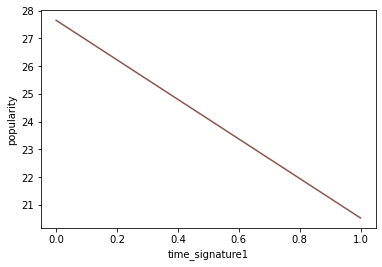

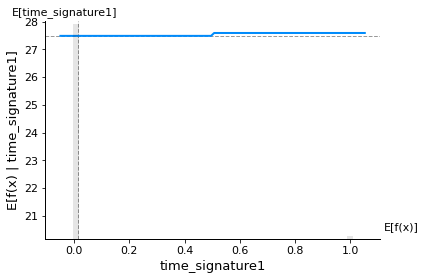

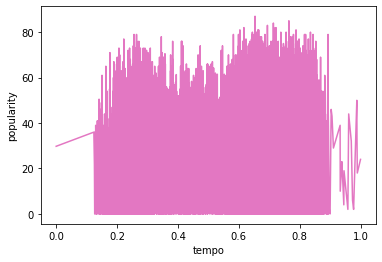

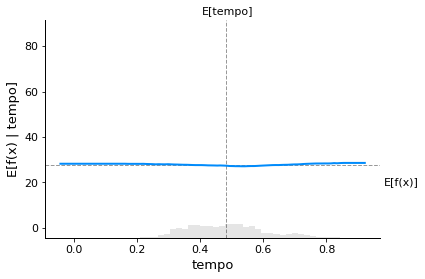

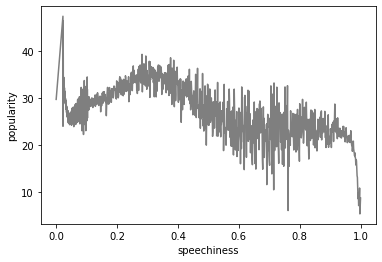

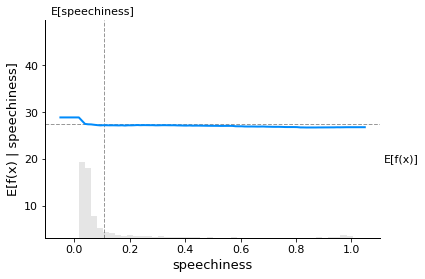

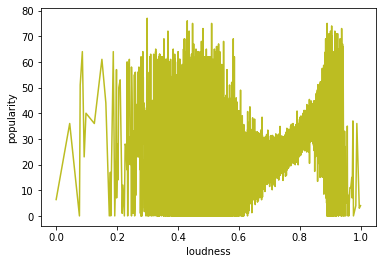

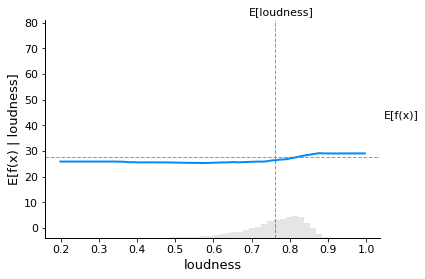

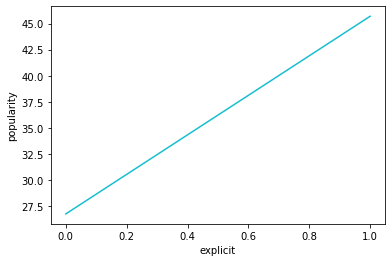

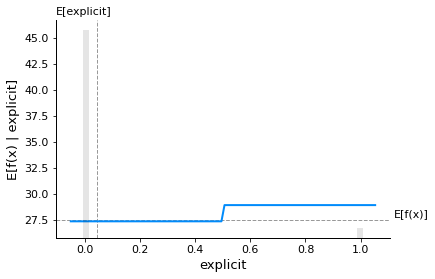

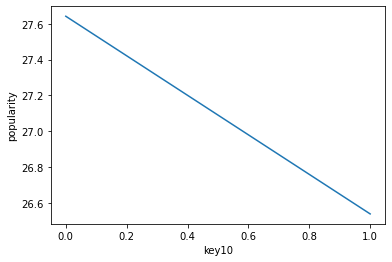

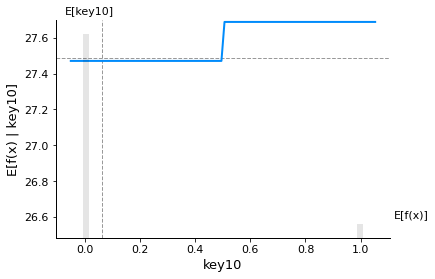

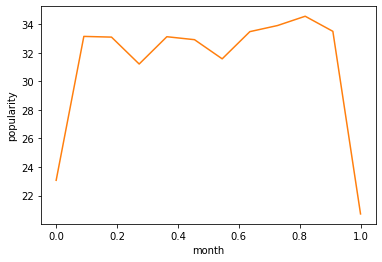

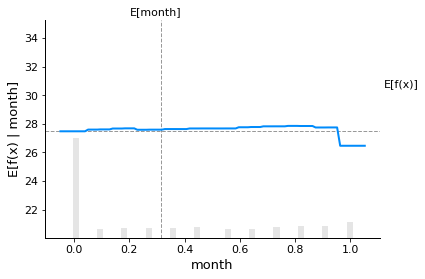

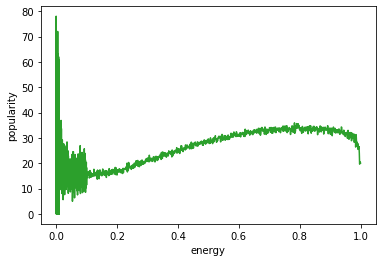

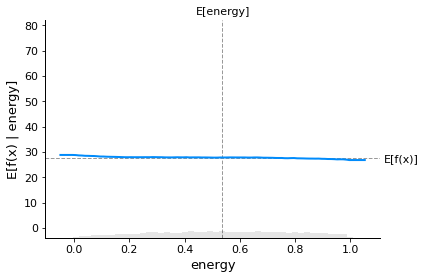

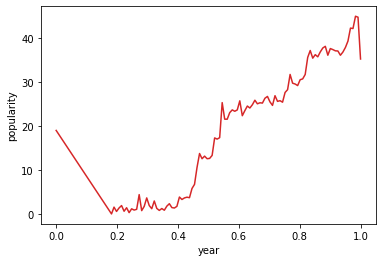

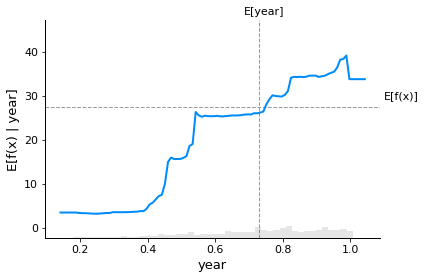

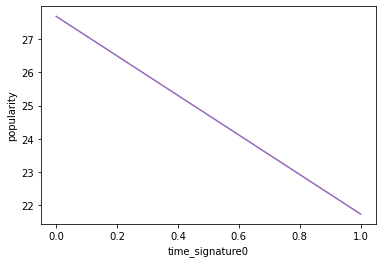

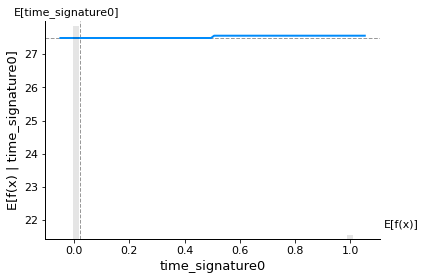

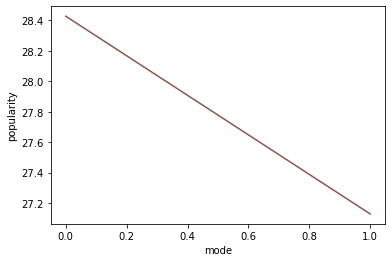

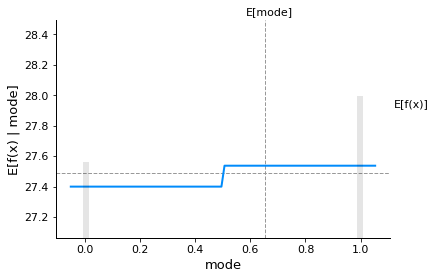

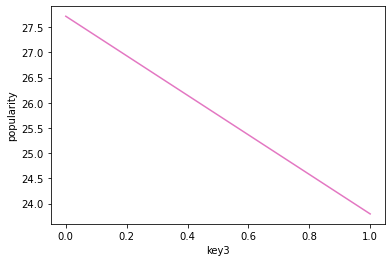

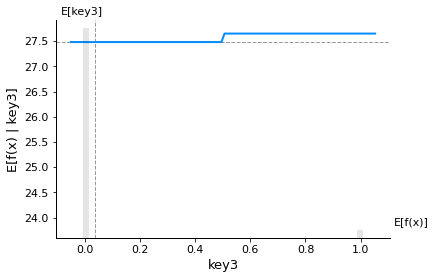

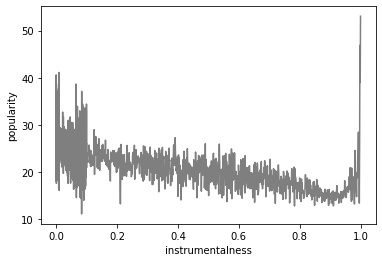

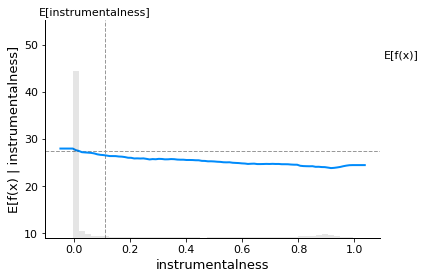

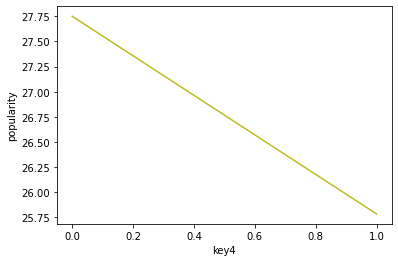

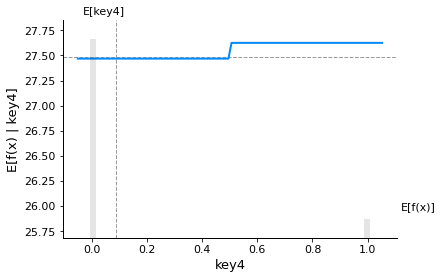

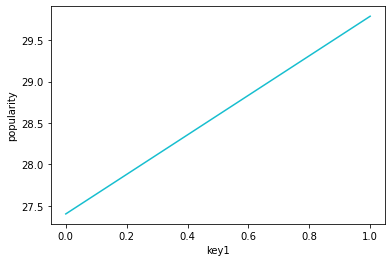

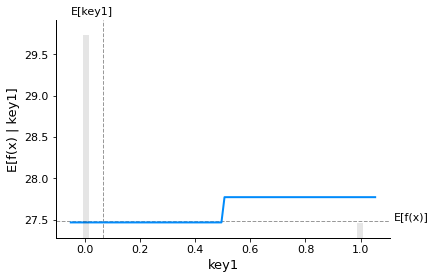

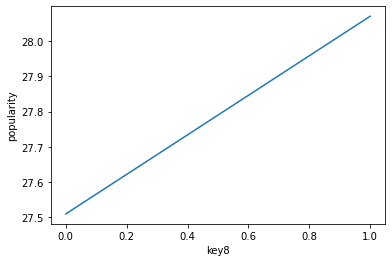

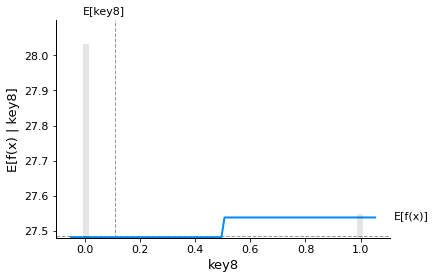

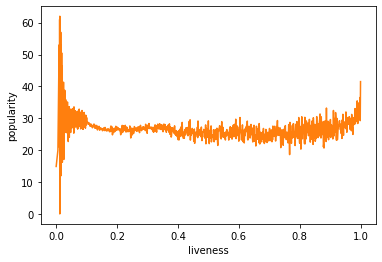

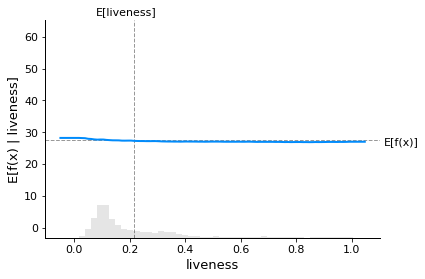

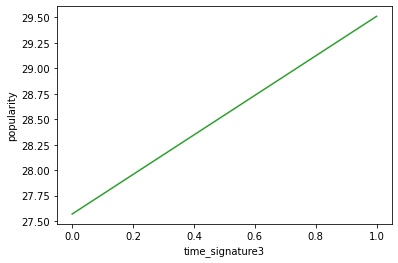

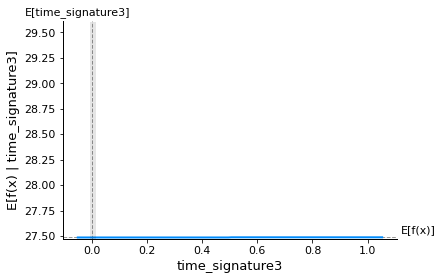

In [51]:
X_sample = X_train.sample(frac=0.01, random_state=42)
Y_sample = Y_train.loc[X_sample.index]
for var in X_sample.columns:
    ax1 = sns.lineplot(x=X_train[var], y=Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, rf.predict, X_sample, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False
    )
    ax2.set_ylim(ylim)
    plt.show()

In [52]:
rf_explainer = shap.TreeExplainer(rf, X_train)
rf_shap_values = rf_explainer(X_sample, check_additivity=False)

100%|===================| 5806/5808 [05:02<00:00]        

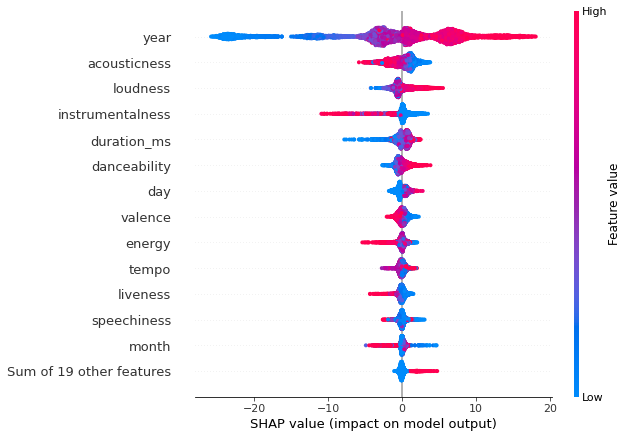

In [53]:
shap.plots.beeswarm(rf_shap_values, max_display=14)

#### Conclusion

* The random forest is also just a little bit better than the previous model by 2%, for an even longer training time. Additionally, the partial dependeance plot are almost the same as the decision tree, leading to having very few reasons of choosing this algorithm
* As the forest average the result of each tree, it explain why most of the partial dependance plot (expect for `year`) are just asymptot to the conditional mean of the target
* Once again, our hypothesis seems to be confirmed by the model
* There's again a variance problem, which is still balanced out through cost-complexity pruning

#### Neural Network

Mondel fonctionning through neurons layers, each neurons transforming in a non-linear way the previous layer's ouputs until last layer corresponding to the prediction is reached

In [54]:
# Get data for neural network
nn_X_train = X_train.values
nn_Y_train = Y_train.values
nn_X_test = X_test.values
nn_Y_test = Y_test.values
print(nn_X_train.shape)
print(nn_Y_train.shape)

(580805, 32)
(580805,)


In [55]:
# Define R2 score for keras environement
def r2(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Define generic method for building model
def get_dense_model(X_feat_shape, 
                    n_layers=0, units_per_layer=[]):
    inp = Input(shape=X_feat_shape, name="Input")
    tensor = inp
    for i in range(n_layers):
        tensor = Dense(units_per_layer[i], activation="relu")(tensor)
    out = Dense(1, activation=None)(tensor)
    model = Model(inputs=inp, outputs=out)
    model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae", r2])
    return model

In [56]:
# Build model
nn_model = get_dense_model(nn_X_train.shape[-1], 5, [32, 64, 128, 64, 32])
nn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 32)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33    

In [57]:
nn_model.fit(X_train, Y_train, epochs=32, batch_size=4096, validation_split=0.01)

Epoch 1/32
141/141 [==============================] - 23s 22ms/step - loss: 646.4306 - mse: 646.4306 - mae: 20.0946 - r2: -0.9106 - val_loss: 228.6445 - val_mse: 228.6445 - val_mae: 12.1560 - val_r2: 0.3211
Epoch 2/32
141/141 [==============================] - 2s 14ms/step - loss: 219.0317 - mse: 219.0317 - mae: 11.6750 - r2: 0.3494 - val_loss: 201.9688 - val_mse: 201.9688 - val_mae: 10.8889 - val_r2: 0.3984
Epoch 3/32
141/141 [==============================] - 2s 14ms/step - loss: 205.2315 - mse: 205.2315 - mae: 10.9582 - r2: 0.3927 - val_loss: 198.9865 - val_mse: 198.9865 - val_mae: 10.7417 - val_r2: 0.4070
Epoch 4/32
141/141 [==============================] - 2s 14ms/step - loss: 201.0985 - mse: 201.0985 - mae: 10.8265 - r2: 0.4030 - val_loss: 196.7354 - val_mse: 196.7354 - val_mae: 10.6712 - val_r2: 0.4141
Epoch 5/32
141/141 [==============================] - 2s 14ms/step - loss: 199.1564 - mse: 199.1564 - mae: 10.7438 - r2: 0.4091 - val_loss: 194.0022 - val_mse: 194.0022 - val_mae

In [58]:
nn_Y_pred = nn_model.predict(nn_X_test)
print("========|Test metrics|========")                                  # Generate predictions for test set
print("Variance explained:", explained_variance_score(nn_Y_test, nn_Y_pred))   # Calculate evaluation metrics
print("Mean squared error:", mean_squared_error(nn_Y_test, nn_Y_pred))
print("Mean absolute error:", mean_absolute_error(nn_Y_test, nn_Y_pred))

========|Test metrics|========
Variance explained: 0.4135635763802138
Mean squared error: 203.0502255922524
Mean absolute error: 10.697715368768248


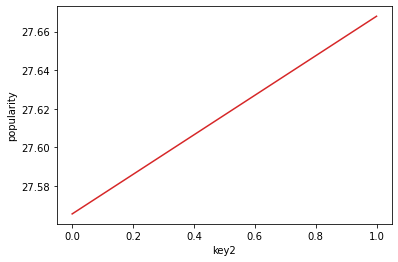

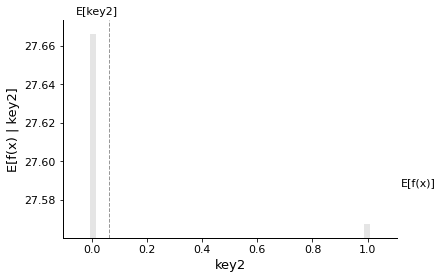

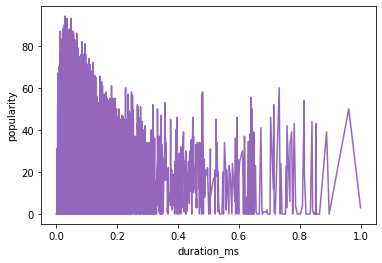

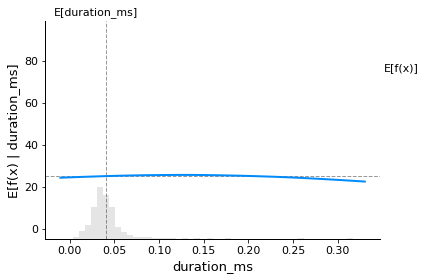

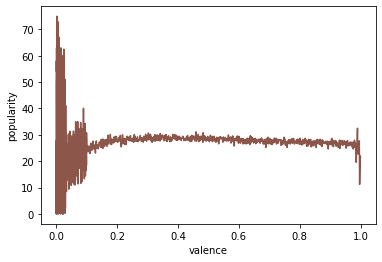

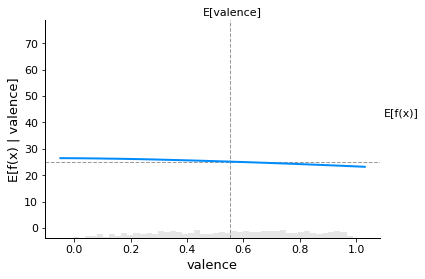

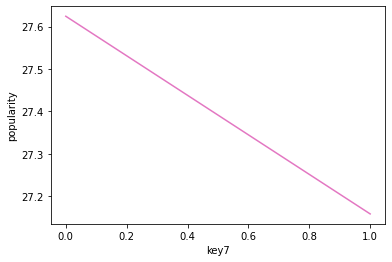

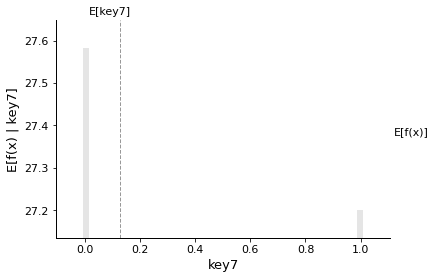

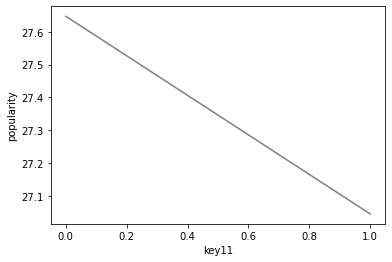

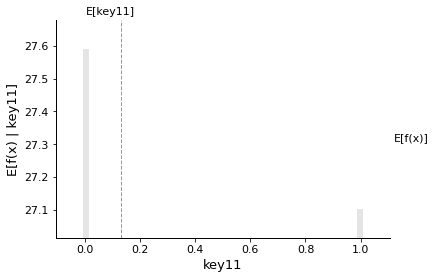

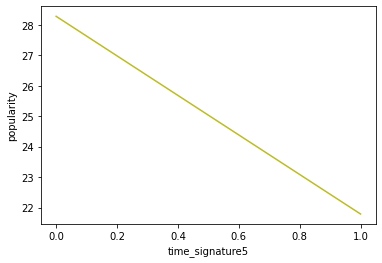

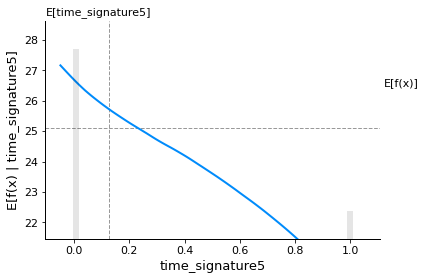

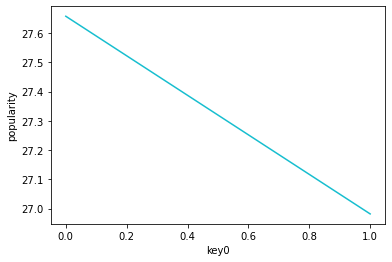

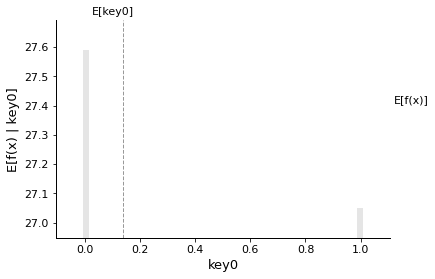

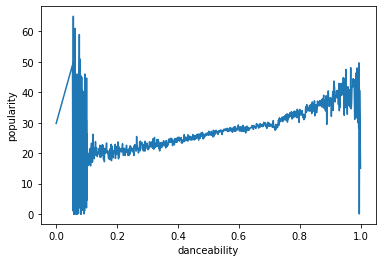

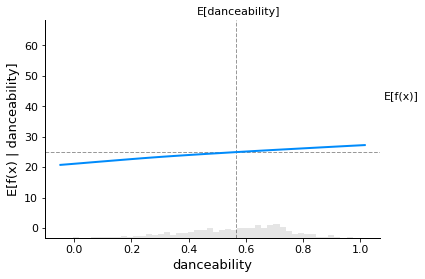

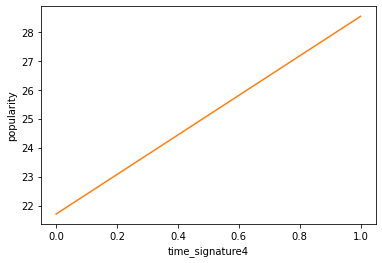

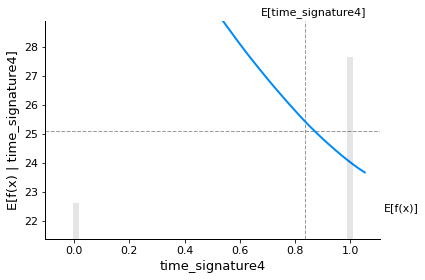

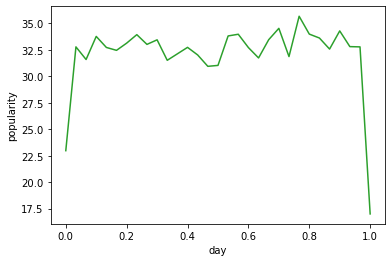

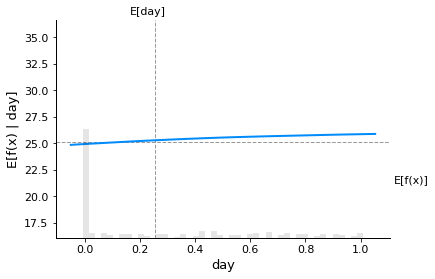

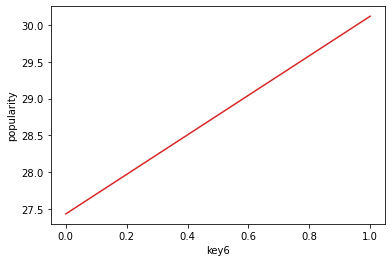

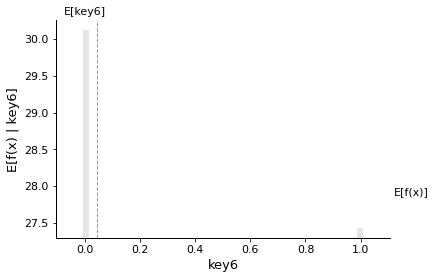

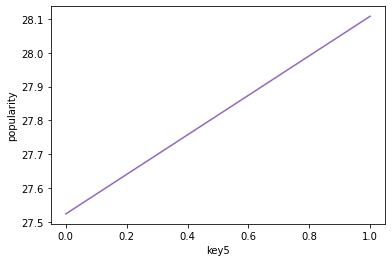

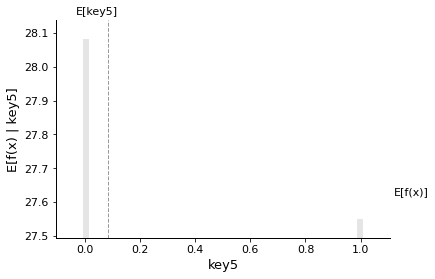

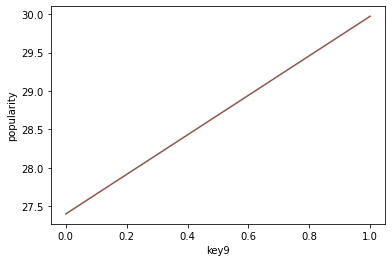

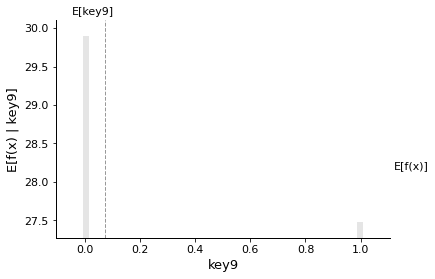

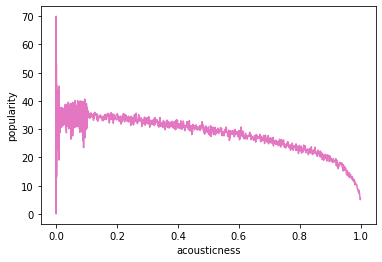

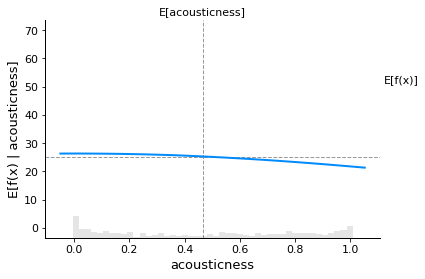

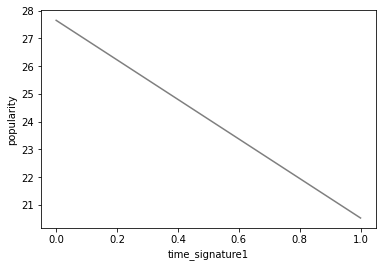

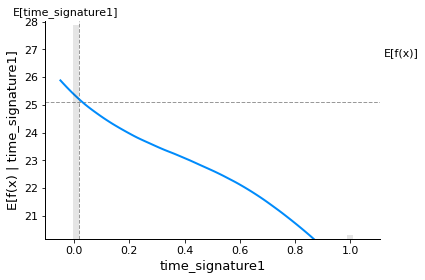

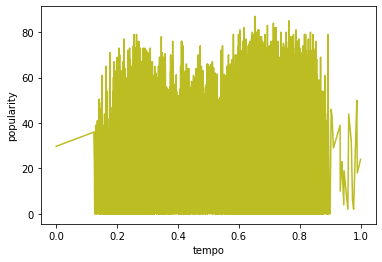

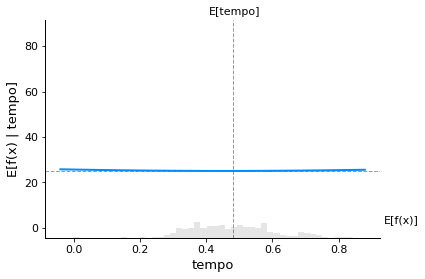

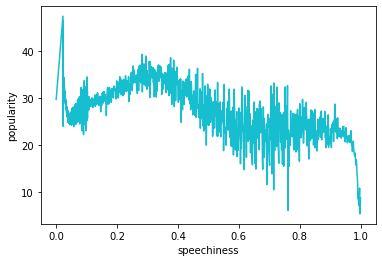

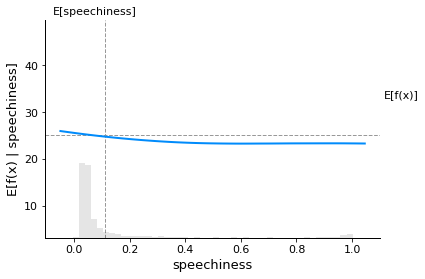

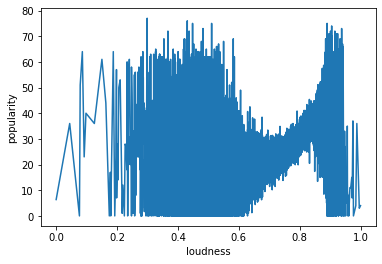

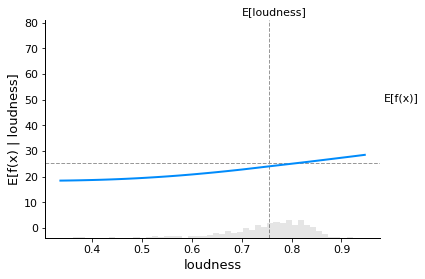

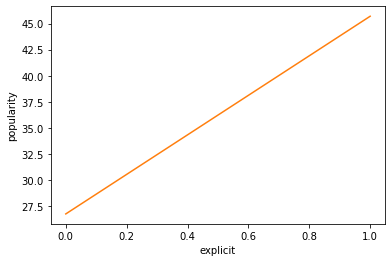

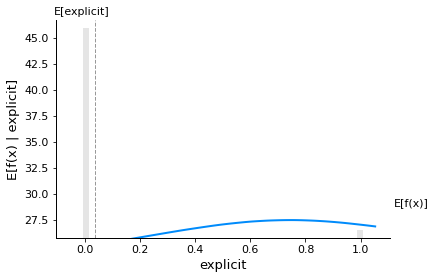

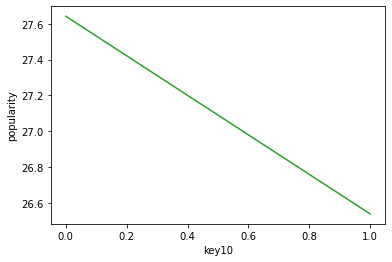

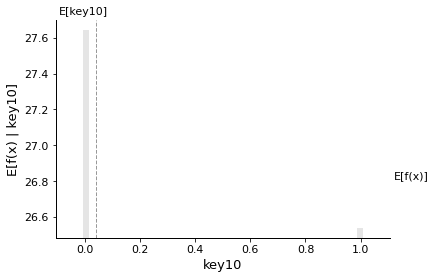

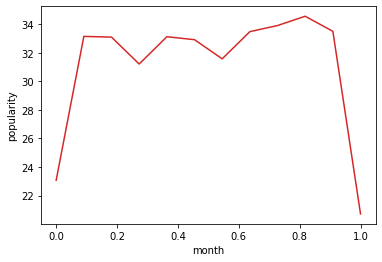

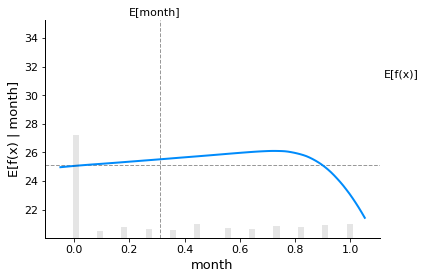

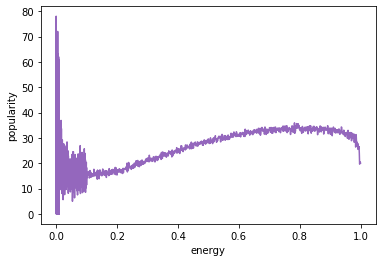

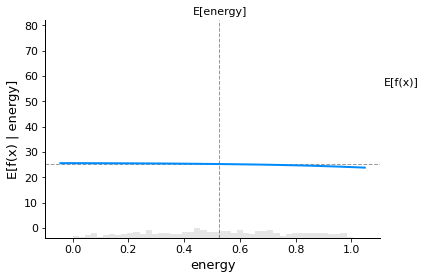

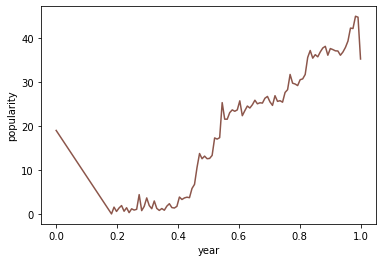

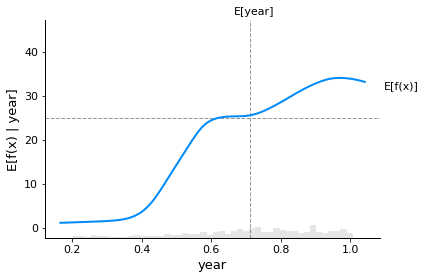

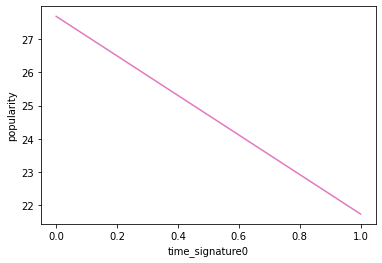

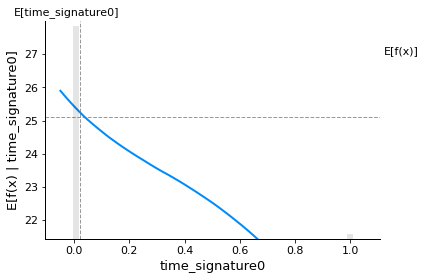

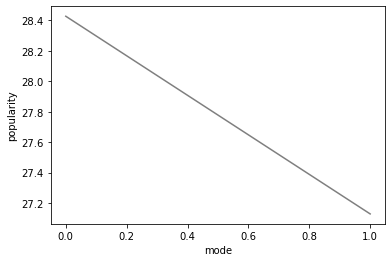

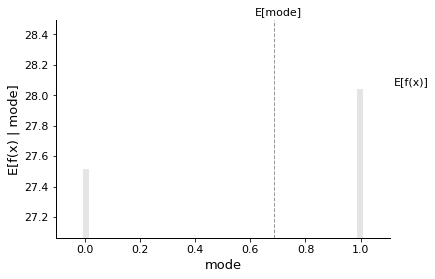

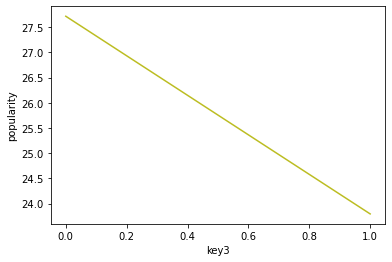

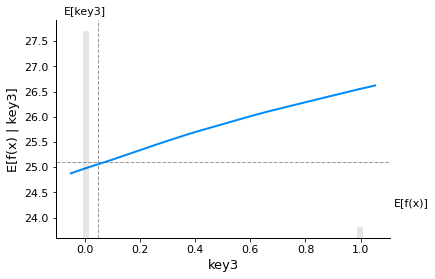

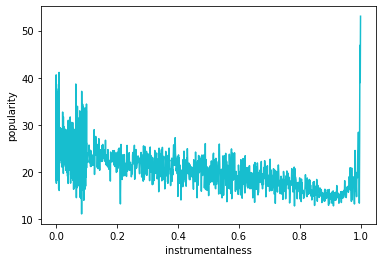

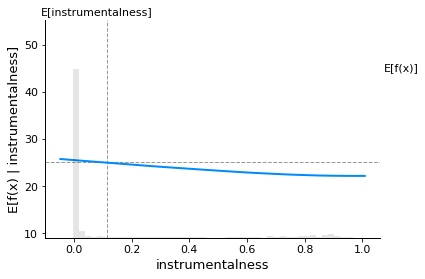

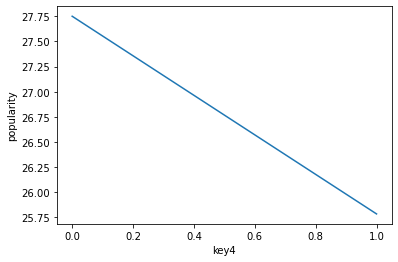

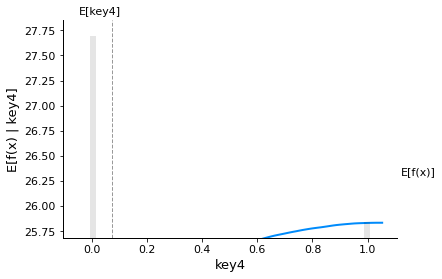

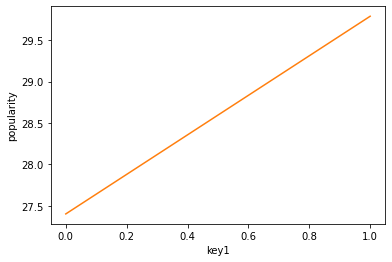

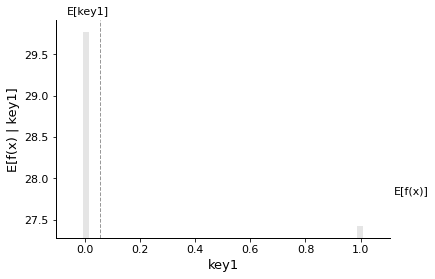

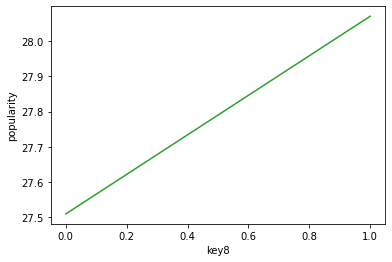

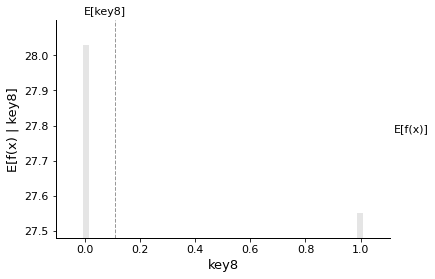

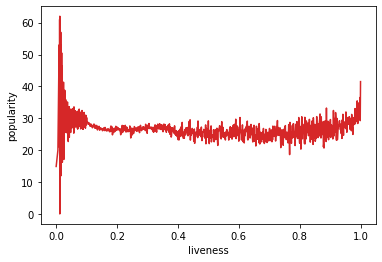

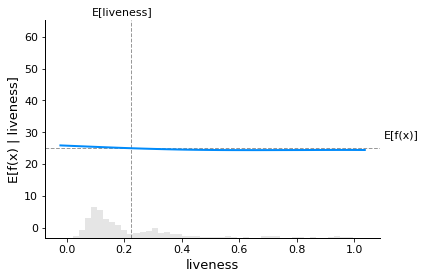

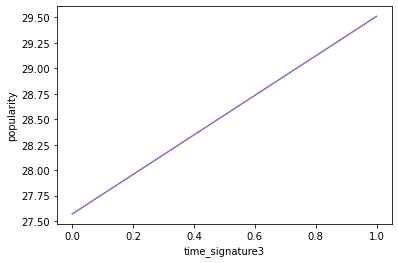

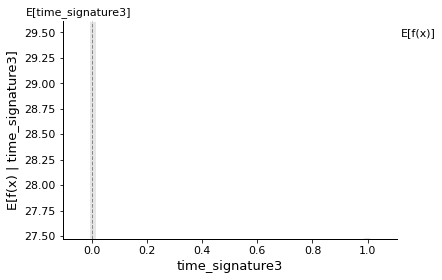

In [59]:
X_sample = X_train.sample(frac=0.001, random_state=42)
Y_sample = Y_train.loc[X_sample.index]
for var in X_sample.columns:
    ax1 = sns.lineplot(x=X_train[var], y=Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, nn_model.predict, X_sample, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False
    )
    ax2.set_ylim(ylim)
    plt.show()

In [60]:
nn_X_sample = X_train.sample(frac=0.001, random_state=42)
nn_explainer = shap.Explainer(nn_model.predict, X_train)
nn_shap_values = nn_explainer(nn_X_sample)

Permutation explainer: 582it [19:35,  2.04s/it]                         


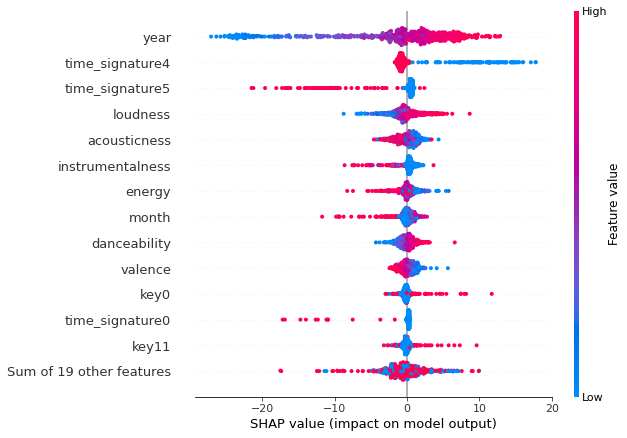

In [61]:
shap.plots.beeswarm(nn_shap_values, max_display=14)

#### Conclusion

* A small neural network seems to be almost as good as the Random Forest, though with less overfitting and much faster training time, which makes it a better algorithm overall
* The neural network can be optimized by modifing its architecture and other elements in its layers (like regulaziers, activation function or dropout settings) so better performance could be achieved through careful research
* Neural network are supposed to be very difficult to interpret due to their nature. However, using the same tools than for other classical algorithms (partial dependance plot, SHAP values), we can achieve good interpreation
* As for the others algorithms, it handles quantitative features quite well, if not better as it's able to the conditional expected predction deviate more from the mean than algorithms lile Random Forest, but not the categorical variables, where it sometimes understand the complete opposed relation
* Once again, the model supports most of our hypothesis on target prediction and features relation

#### Siamese neural network

This neural network will work in with a more complex architecture than the previous one, as so:
* There is 4 distinct inputs, one for the quantitative features, one for the first three artist in `artists`, one for `key` and one for `time_signature`
* The 3 last inputs are each passed through their respective embedding layers, which transforms categorical values into  embeddings for each of thoses values, which, if successfully trained, give those categorical features many mathemical properties, notably comparaison through distance in the embedding space. 
* Also, as the embedding layer consider the categorical values as index, there is no need to one-hot encode mulinomial categorical features, keeping the original categorical features count. This leads to the possibility of using the `artists` feature, considering how many unique category there is. 
* The first input and the embeddings are concatenated together to be fed to the rest of the neural network, and therefore to make predictions

As this model requires different input, data preparation has to be done again

##### Data Preperation (Siamese neural network)

In [62]:
# Data preparation for siamese neural network
nn_data = tracks.copy()

target = ["popularity"]                                            
to_drop = ["id", "name", "id_artists"]  
to_bool = ["key", "time_signature"]                               
categorical = ["explicit", "mode"] + to_bool                       
quantitative = ["duration_ms", "danceability", "energy",           
                "loudness", "speechiness", "acousticness", 
                "instrumentalness", "liveness",
                "valence", "tempo", "year", "month", "day"]
date = ["release_date"]

nn_data = tracks.drop(to_drop, axis=1)
nn_data["release_date"] = pd.to_datetime(nn_data["release_date"])
nn_data["year"] = nn_data["release_date"].dt.year
nn_data["month"] = nn_data["release_date"].dt.month
nn_data["day"] = nn_data["release_date"].dt.day
nn_data = nn_data.drop("release_date", axis=1)
                
nn_data["artists"] = nn_data["artists"].apply(lambda x: ast.literal_eval(x))
max_artist_cols = int(nn_data["artists"].apply(lambda x: len(x)).describe(percentiles=[.25, .50, .75, .95])["95%"])
am_data = (pd.DataFrame(nn_data["artists"].values.tolist())
                  .iloc[:, 0:max_artist_cols]
                  .rename(columns=lambda x: "artist_{}".format(x+1))
                 )
am_cols = am_data.columns
artists_encoder = LabelEncoder()
artists_bin = artists_encoder.fit_transform(nn_data["artists"].explode())
artists_map = dict(zip(artists_encoder.classes_.tolist(), range(1, len(artists_encoder.classes_) + 1)))
am_data = pd.DataFrame([am_data[am_col].map(artists_map) for am_col in am_cols]).transpose().fillna(0)
nn_data = nn_data.drop("artists", axis=1)

key_data = (pd.DataFrame(nn_data["key"].values.tolist())
                  .rename(columns=lambda x: "key{}".format(x))
                 )
key_cols = key_data.columns
key_encoder = LabelEncoder()
key_bin = key_encoder.fit_transform(nn_data["key"].explode())
key_map = dict(zip(key_encoder.classes_.tolist(), range(len(key_encoder.classes_))))
key_data = pd.DataFrame([key_data[key_col].map(key_map) for key_col in key_cols]).transpose().fillna(0)
nn_data = nn_data.drop("key", axis=1)

ts_data = (pd.DataFrame(nn_data["time_signature"].values.tolist())
                  .rename(columns=lambda x: "time_signature{}".format(x))
                 )
ts_cols = ts_data.columns
ts_encoder = LabelEncoder()
ts_bin = ts_encoder.fit_transform(nn_data["time_signature"].explode())
ts_map = dict(zip(ts_encoder.classes_.tolist(), range(len(ts_encoder.classes_))))
ts_data = pd.DataFrame([ts_data[ts_col].map(ts_map) for ts_col in ts_cols]).transpose().fillna(0)
nn_data = nn_data.drop("time_signature", axis=1)

In [63]:
nn_data.shape

(586672, 16)

In [64]:
nn_train, nn_test, am_train, am_test, key_train, key_test, ts_train, ts_test = train_test_split(nn_data, am_data, key_data, ts_data, 
                                                                                                test_size=0.01, random_state=42)

# Qualitiative variables standardizing
nn_s_train = nn_train.copy()
train_scaler = MinMaxScaler()
nn_s_train[quantitative] = train_scaler.fit_transform(nn_train[quantitative])

nn_s_test = nn_test.copy()
test_scaler = MinMaxScaler()
nn_s_test[quantitative] = test_scaler.fit_transform(nn_s_test[quantitative])

In [65]:
nn_X_train = nn_s_train.drop("popularity", axis=1)
nn_Y_train = nn_s_train["popularity"]
nn_X_test = nn_s_test.drop("popularity", axis=1)
nn_Y_test = nn_s_test["popularity"]

In [66]:
def get_dense_model(nn_X_shape, 
                    am_size,
                    key_size,
                    ts_size,
                    n_layers=0, units_per_layer=[],
                    am_embed_units=1,
                    key_embed_units=1,
                    ts_embed_units=1):
    
    inp = Input(shape=nn_X_shape)
    inp_var = Lambda(lambda x: x[:,0:15])(inp)
    inp_am = Lambda(lambda x: x[:,15:18])(inp)
    inp_key = Lambda(lambda x: x[:,18])(inp)
    inp_ts = Lambda(lambda x: x[:,19])(inp)
    emb_am = Embedding(am_size, am_embed_units)(inp_am)
    emb_key = Embedding(key_size, key_embed_units)(inp_key)
    emb_ts = Embedding(ts_size, ts_embed_units)(inp_ts)
    flat_am = Flatten()(emb_am)
    flat_key = Flatten()(emb_key)
    flat_ts = Flatten()(emb_ts)
    tensor = Concatenate()([inp_var, flat_am, flat_ts, flat_key])
    for i in range(n_layers):
        tensor = Dense(units_per_layer[i], activation="relu")(tensor)
    out = Dense(1, activation=None)(tensor)
    model = Model(inputs=inp, outputs=out)
    model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae", r2])
    return model

In [67]:
nn_X_train_all = pd.concat([nn_X_train, am_train, key_train, ts_train], axis=1)
sinn_model = get_dense_model(nn_X_train_all.shape[-1], 
                             len(artists_encoder.classes_) + 2,
                             len(key_encoder.classes_),
                             len(ts_encoder.classes_),
                             7, [32, 64, 128, 256, 128, 64, 32],
                             256,
                             8,
                             4)
sinn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 3)            0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None,)              0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None,)              0           input_1[0][0]                    
____________________________________________________________________________________________

In [68]:
sinn_model.fit(nn_X_train_all, nn_Y_train, 
               epochs=16, batch_size=4096, validation_split=0.01)

Epoch 1/16
141/141 [==============================] - 111s 742ms/step - loss: 553.3165 - mse: 553.3165 - mae: 17.8937 - r2: -0.6416 - val_loss: 118.2318 - val_mse: 118.2318 - val_mae: 7.9593 - val_r2: 0.6500
Epoch 2/16
141/141 [==============================] - 107s 758ms/step - loss: 98.1026 - mse: 98.1026 - mae: 7.2196 - r2: 0.7093 - val_loss: 102.0943 - val_mse: 102.0943 - val_mae: 7.3394 - val_r2: 0.6973
Epoch 3/16
141/141 [==============================] - 106s 754ms/step - loss: 81.7329 - mse: 81.7329 - mae: 6.4423 - r2: 0.7583 - val_loss: 99.3583 - val_mse: 99.3583 - val_mae: 7.1997 - val_r2: 0.7063
Epoch 4/16
141/141 [==============================] - 106s 754ms/step - loss: 74.7848 - mse: 74.7848 - mae: 6.0628 - r2: 0.7786 - val_loss: 96.3387 - val_mse: 96.3387 - val_mae: 6.8522 - val_r2: 0.7138
Epoch 5/16
141/141 [==============================] - 107s 757ms/step - loss: 71.2791 - mse: 71.2791 - mae: 5.8559 - r2: 0.7885 - val_loss: 94.4691 - val_mse: 94.4691 - val_mae: 6.9369

In [69]:
nn_X_test_all = pd.concat([nn_X_test, am_test, key_test, ts_test], axis=1)
nn_Y_pred = sinn_model.predict(nn_X_test_all)
print("========|Test metrics|========")                                  # Generate predictions for test set
print("Variance explained:", explained_variance_score(nn_Y_test, nn_Y_pred))   # Calculate evaluation metrics
print("Mean squared error:", mean_squared_error(nn_Y_test, nn_Y_pred))
print("Mean absolute error:", mean_absolute_error(nn_Y_test, nn_Y_pred))

========|Test metrics|========
Variance explained: 0.7057850633632434
Mean squared error: 104.1227424579179
Mean absolute error: 6.910759977798243


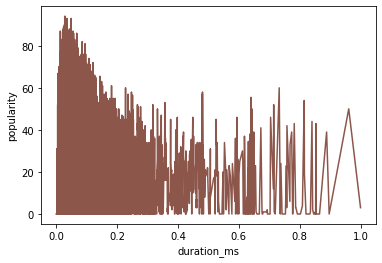

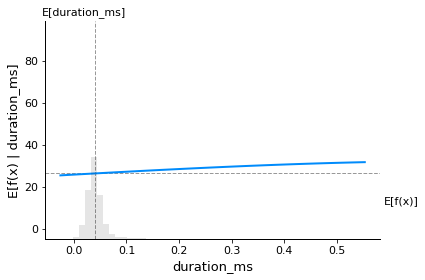

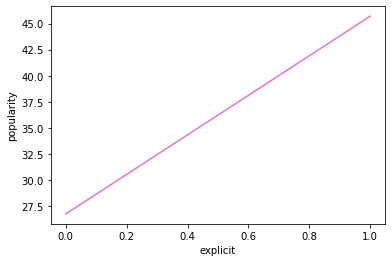

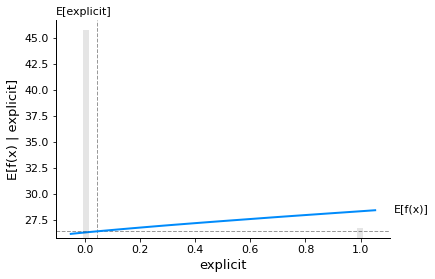

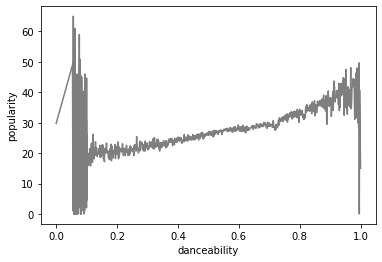

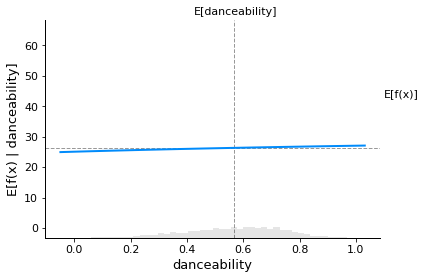

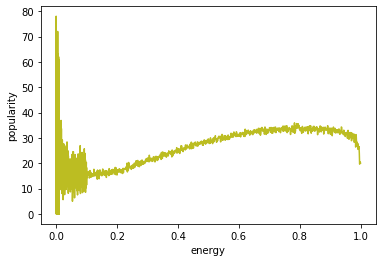

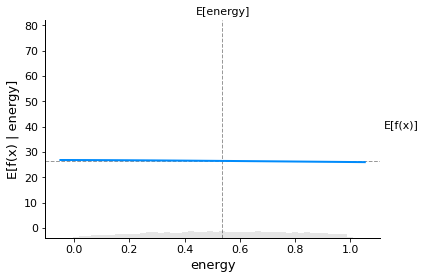

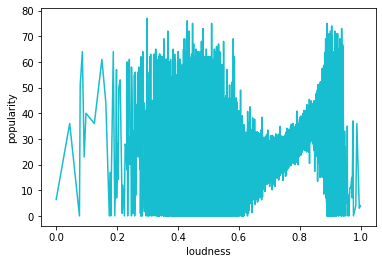

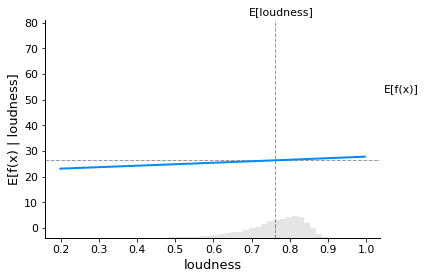

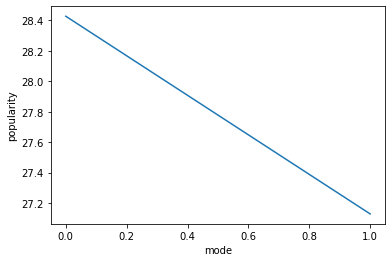

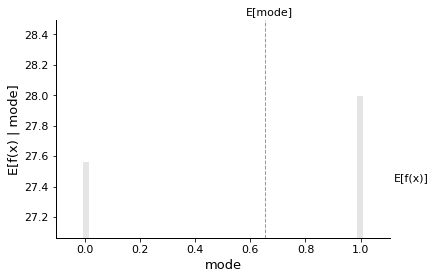

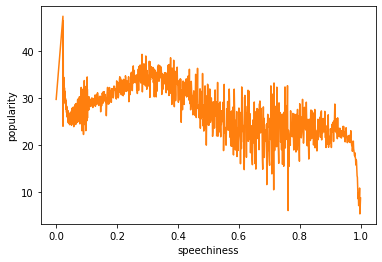

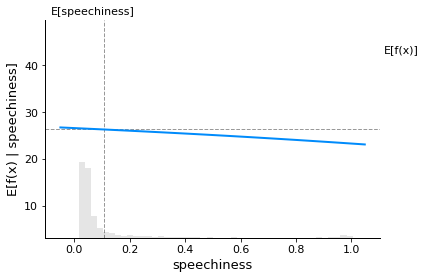

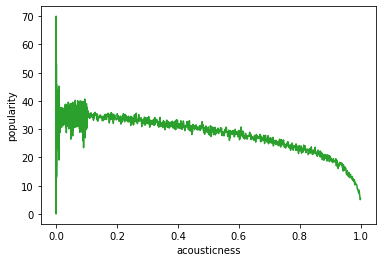

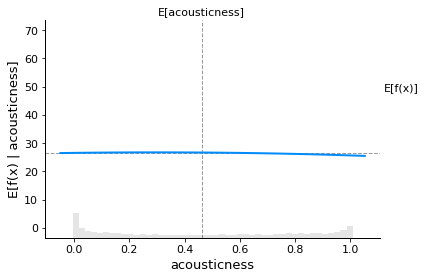

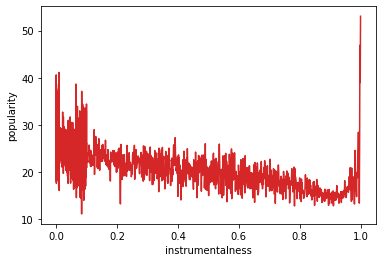

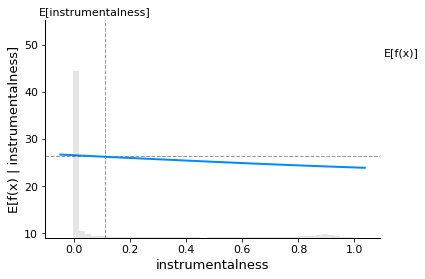

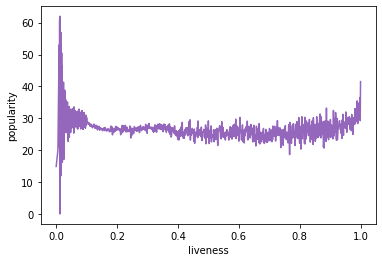

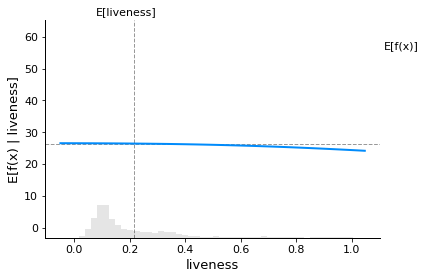

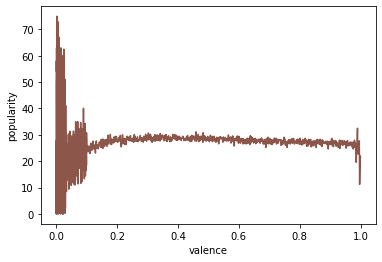

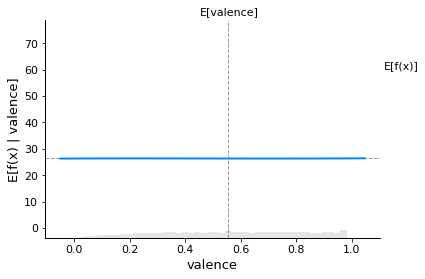

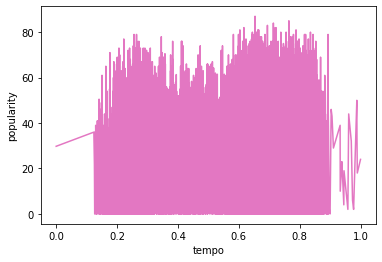

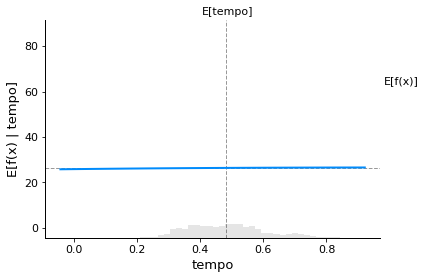

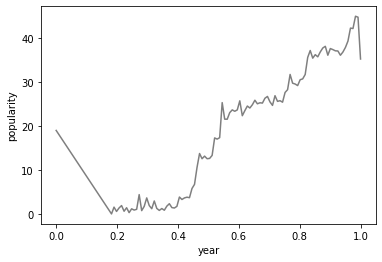

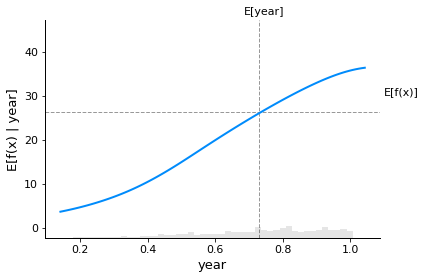

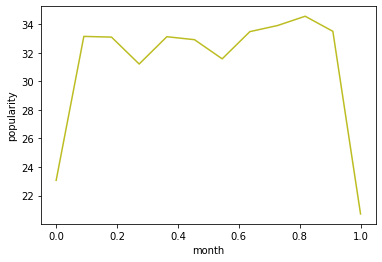

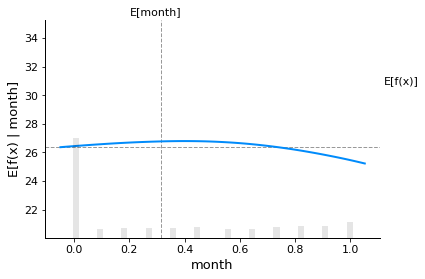

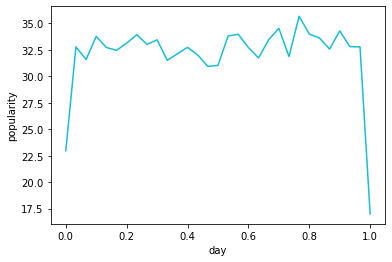

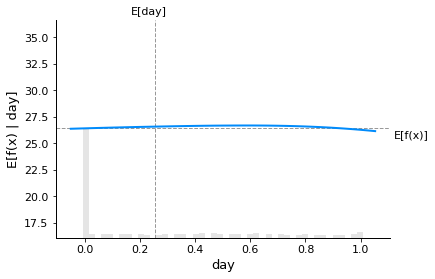

In [70]:
nn_X_sample_all = nn_X_train_all.sample(frac=0.01, random_state=42)
for var in nn_X_sample_all.columns[0:15]:
    ax1 = sns.lineplot(x=nn_X_train_all[var], y=nn_Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, sinn_model.predict, nn_X_sample_all, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False
    )
    ax2.set_ylim(ylim)
    plt.show()

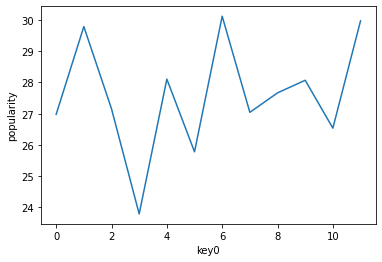

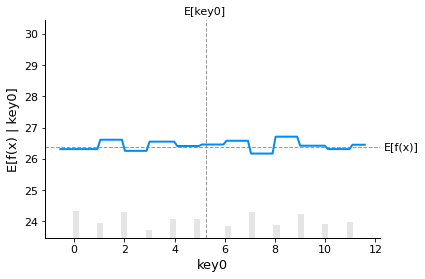

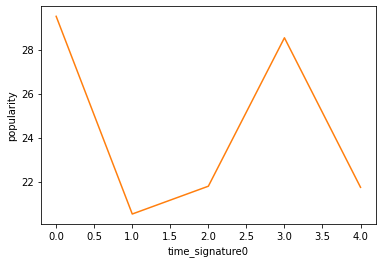

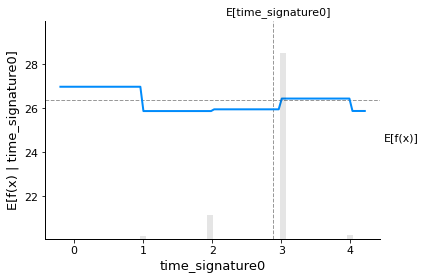

In [71]:
for var in nn_X_sample_all.columns[18:]:
    ax1 = sns.lineplot(x=nn_X_train_all[var], y=nn_Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, sinn_model.predict, nn_X_sample_all, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False, xmin=0, xmax=nn_X_train_all[var].max()
    )
    ax2.set_ylim(ylim)
    plt.show()

artist_1


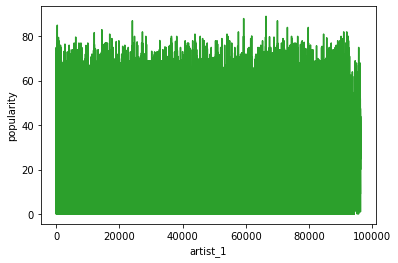

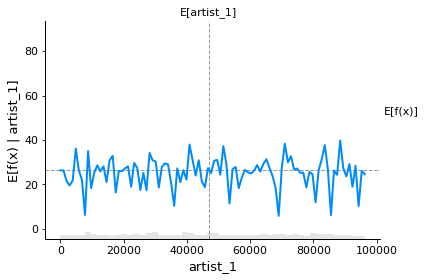

artist_2


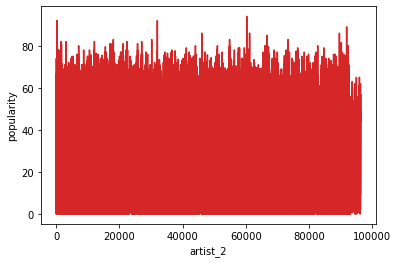

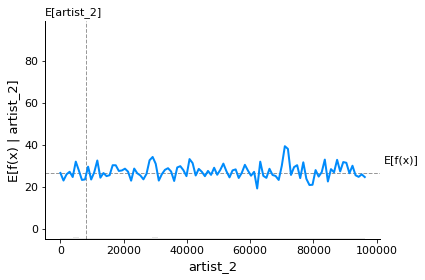

artist_3


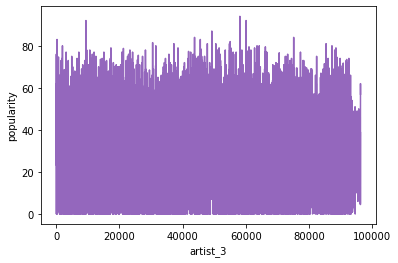

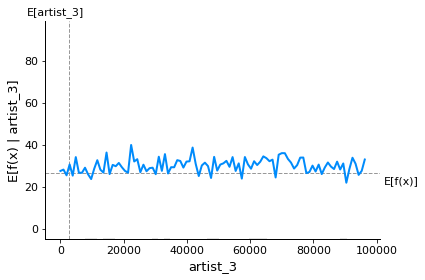

In [72]:
for var in nn_X_sample_all.columns[15:18]:
    print(var)
    ax1 = sns.lineplot(x=nn_X_train_all[var], y=nn_Y_train, ci=None, color=next(palette))
    ylim = ax1.get_ylim()
    _, ax2 = shap.partial_dependence_plot(
                    var, sinn_model.predict, nn_X_sample_all, ice=False,
                    model_expected_value=True, feature_expected_value=True,
                    show=False, xmin=10, xmax=nn_X_train_all[var].max()
    )
    ax2.set_ylim(ylim)
    plt.show()

In [77]:
nn_X_sample_all = nn_X_train_all.sample(frac=0.001, random_state=42)
sinn_explainer = shap.Explainer(sinn_model.predict, nn_X_train_all)
sinn_shap_values = sinn_explainer(nn_X_sample_all)

Permutation explainer: 582it [21:07,  2.20s/it]                         


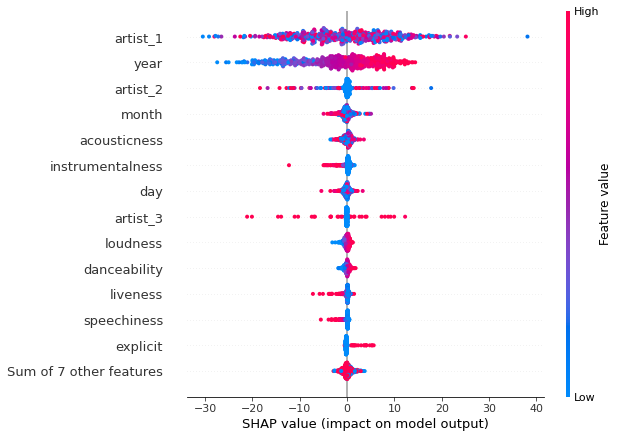

In [78]:
shap.plots.beeswarm(sinn_shap_values, max_display=14)

#### Conclusion

* The siamese network is doing a lot better than other algorithms, reaching 70%, which represent almost 30% gain of explained variance. This shows how important `artists` were in the final prediction and how representing categorical variables through embedding helps it too.
* Overfitting can be observed in this network too, which could be balanced through multiple way (weights regularization, dropout, smaller network etc...)
* Again, most of our hypothesis are supported by the model in terms of quantitative features relation, and some categorical features relation are still hard to capture for the model.
* Embeddings can be shown through t-SNE dimension reduction, which artist closer to each other theoritically meaning they make the same type of tracks

### Conclusion

* `popularity` is a non-linear phenomenon, mainly influenced by `artists` and `year`, and moderately influenced by XXX. This shows that modern musics and/or music from specific artist are much more likely to be popular, and that very few elements in the music itself have any kind of meaningful impact on the popularity
* Most of the models seemed to have understood the quantitive relations quite well, with the neural networks being the best at that job. Categorical features continues to be hard to interpret for those models though, with only the siamese neural network holding moderate results on that regard
* Most of the hypothesis we made during the data analysis part seems to hold according to the multiple models, with only the relation amplitude that were overestimated for certain features. Though we can confirm them, and consider this case study a success !
* There is lots of room for improvement, specifically by 
* The siamese network will be further used for a track popularity prediction API where, given the name of a song and an artist, output the popularity predition, as well as an explanation for those results